<a href="https://colab.research.google.com/github/nguyenkimcuc/ransomware-detection-ml/blob/main/Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Khai ph√° d·ªØ li·ªáu






In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/GraduateDissertation/BitcoinHeistData.csv"
df = pd.read_csv(file_path)


In [ ]:
print(df.shape)

(2916697, 10)


In [ ]:
df.head()

address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44  0.000244      1   
2  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0  1.000000      1   
3  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72  0.003906      1   
4  1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144  0.072848    456   

   looped  neighbors       income            label  
0       0          2  100050000.0  princetonCerber  
1       0          1  100000000.0   princetonLocky  
2       0          2  200000000.0  princetonCerber  
3       0          2   71200000.0  princetonCerber  
4       0          1  200000000.0   princetonLocky

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [ ]:
df.describe()

year           day        length        weight         count  \
count  2.916697e+06  2.916697e+06  2.916697e+06  2.916697e+06  2.916697e+06   
mean   2.014475e+03  1.814572e+02  4.500859e+01  5.455192e-01  7.216446e+02   
std    2.257398e+00  1.040118e+02  5.898236e+01  3.674255e+00  1.689676e+03   
min    2.011000e+03  1.000000e+00  0.000000e+00  3.606469e-94  1.000000e+00   
25%    2.013000e+03  9.200000e+01  2.000000e+00  2.148438e-02  1.000000e+00   
50%    2.014000e+03  1.810000e+02  8.000000e+00  2.500000e-01  1.000000e+00   
75%    2.016000e+03  2.710000e+02  1.080000e+02  8.819482e-01  5.600000e+01   
max    2.018000e+03  3.650000e+02  1.440000e+02  1.943749e+03  1.449700e+04   

             looped     neighbors        income  
count  2.916697e+06  2.916697e+06  2.916697e+06  
mean   2.385067e+02  2.206516e+00  4.464889e+09  
std    9.663217e+02  1.791877e+01  1.626860e+11  
min    0.000000e+00  1.000000e+00  3.000000e+07  
25%    0.000000e+00  1.000000e+00  7.428559e+07  
50%    0.000000e+00  2.000000e+00  1.999985e+08  
75%    0.000000e+00  2.000000e+00  9.940000e+08  
max    1.449600e+04  1.292000e+04  4.996440e+13

In [ ]:
print(df.isnull().sum())

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64


In [ ]:
# Th√™m c·ªôt binary_label
df['binary_label'] = df['label'].apply(lambda x: 0 if x == 'white' else 1)

binary_label
0    2875284
1      41413
Name: count, dtype: int64


<ipython-input-15-5d03d1f9799b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=label_df, palette='pastel')


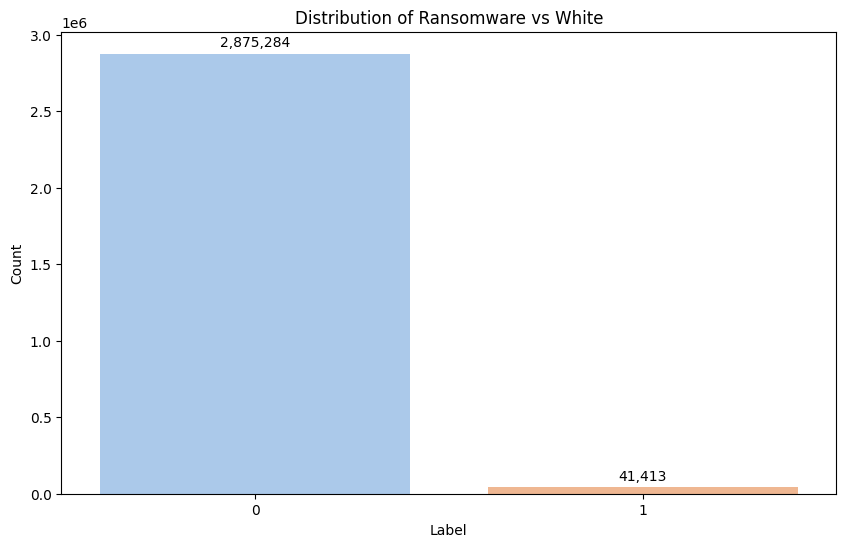

In [ ]:
label_count = df['binary_label'].value_counts()
print(label_count)

# Chuy·ªÉn v·ªÅ DataFrame ƒë·ªÉ ti·ªán v·∫Ω
label_df = label_count.reset_index()
label_df.columns = ['label', 'count']

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='count', data=label_df, palette='pastel')

# Th√™m nh√£n v√† ti√™u ƒë·ªÅ
plt.title('Distribution of Ransomware vs White')
plt.xlabel('Label')
plt.ylabel('Count')

# Hi·ªÉn th·ªã s·ªë l∆∞·ª£ng tr√™n t·ª´ng c·ªôt
for i, row in label_df.iterrows():
    plt.text(i, row['count'] + max(label_df['count']) * 0.01, f"{row['count']:,}",
             ha='center', va='bottom', fontsize=10)

# L∆∞u bi·ªÉu ƒë·ªì
plt.savefig('/content/drive/MyDrive/Graduation4/label-distribution.png')

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

In [ ]:
df.drop(columns = ['label'], inplace = True)

In [ ]:
df.to_csv('/content/drive/MyDrive/Graduation4/df_binary.csv', index=False)

## Chia t·∫≠p d·ªØ li·ªáu

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Graduation4/df_binary.csv')

In [ ]:
df.head()

address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44  0.000244      1   
2  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0  1.000000      1   
3  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72  0.003906      1   
4  1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144  0.072848    456   

   looped  neighbors       income  binary_label  
0       0          2  100050000.0             1  
1       0          1  100000000.0             1  
2       0          2  200000000.0             1  
3       0          2   71200000.0             1  
4       0          1  200000000.0             1

In [ ]:
X = df[['year','day','address','length','weight','count','looped','neighbors','income']]
y = df['binary_label']

In [ ]:
from sklearn.model_selection import train_test_split

# Chia 20% d·ªØ li·ªáu l√†m t·∫≠p ki·ªÉm tra (test) v√† 80% c√≤n l·∫°i l√†m t·∫≠p hu·∫•n luy·ªán - ki·ªÉm ƒë·ªãnh (train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ki·ªÉm tra k√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi chia
print(f"Train set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Train set size: 2333357 samples
Test set size: 583340 samples


In [ ]:
X_train.to_csv('/content/drive/MyDrive/Graduation4/X_train.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Graduation4/X_test.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/Graduation4/y_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/Graduation4/y_test.csv', index=False)


In [ ]:
X_train.describe()

year           day        length        weight         count  \
count  2.333357e+06  2.333357e+06  2.333357e+06  2.333357e+06  2.333357e+06   
mean   2.014475e+03  1.814789e+02  4.502953e+01  5.468785e-01  7.224087e+02   
std    2.257354e+00  1.040159e+02  5.899327e+01  3.757735e+00  1.691009e+03   
min    2.011000e+03  1.000000e+00  0.000000e+00  3.606469e-94  1.000000e+00   
25%    2.013000e+03  9.200000e+01  2.000000e+00  2.151475e-02  1.000000e+00   
50%    2.014000e+03  1.810000e+02  8.000000e+00  2.500000e-01  1.000000e+00   
75%    2.016000e+03  2.710000e+02  1.080000e+02  8.834770e-01  5.600000e+01   
max    2.018000e+03  3.650000e+02  1.440000e+02  1.943749e+03  1.449700e+04   

             looped     neighbors        income  
count  2.333357e+06  2.333357e+06  2.333357e+06  
mean   2.385177e+02  2.204869e+00  4.438750e+09  
std    9.665936e+02  1.785847e+01  1.580960e+11  
min    0.000000e+00  1.000000e+00  3.000000e+07  
25%    0.000000e+00  1.000000e+00  7.428363e+07  
50%    0.000000e+00  2.000000e+00  1.999900e+08  
75%    0.000000e+00  2.000000e+00  9.938000e+08  
max    1.449600e+04  1.292000e+04  4.996440e+13

In [ ]:
import warnings
import matplotlib

warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning) # Use MatplotlibDeprecationWarning instead of mplDeprecation
_ = np.seterr(over='ignore')

In [ ]:
from scipy.stats import boxcox

# 1. ƒê·∫øm t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa m·ªói ƒë·ªãa ch·ªâ trong t·∫≠p train
address_counts = X_train['address'].value_counts()

# 2. Bi·∫øn ƒë·ªïi Box-Cox
boxcox_values, _ = boxcox(address_counts.values)
dict_n_address = dict(zip(address_counts.index, boxcox_values))

# 3. T·∫°o feature cho train
n_address_feature_train = X_train['address'].map(dict_n_address).fillna(0).values

# 4. X·ª≠ l√Ω cold start cho test (d√πng gi√° tr·ªã min trong dict)
min_value = min(dict_n_address.values())
n_address_feature_test = X_test['address'].map(dict_n_address).fillna(min_value).values

In [ ]:
X_train['n_address'] = n_address_feature_train

In [ ]:
X_test['n_address'] = n_address_feature_test

In [ ]:
X_train.to_csv('/content/drive/MyDrive/Graduation2/X_train_n_address.csv')
X_test.to_csv('/content/drive/MyDrive/Graduation2/X_test_n_address.csv')

In [ ]:
X_train.describe()

year           day        length        weight         count  \
count  2.333357e+06  2.333357e+06  2.333357e+06  2.333357e+06  2.333357e+06   
mean   2.014475e+03  1.814789e+02  4.502953e+01  5.468785e-01  7.224087e+02   
std    2.257354e+00  1.040159e+02  5.899327e+01  3.757735e+00  1.691009e+03   
min    2.011000e+03  1.000000e+00  0.000000e+00  3.606469e-94  1.000000e+00   
25%    2.013000e+03  9.200000e+01  2.000000e+00  2.151475e-02  1.000000e+00   
50%    2.014000e+03  1.810000e+02  8.000000e+00  2.500000e-01  1.000000e+00   
75%    2.016000e+03  2.710000e+02  1.080000e+02  8.834770e-01  5.600000e+01   
max    2.018000e+03  3.650000e+02  1.440000e+02  1.943749e+03  1.449700e+04   

             looped     neighbors        income     n_address  
count  2.333357e+06  2.333357e+06  2.333357e+06  2.333357e+06  
mean   2.385177e+02  2.204869e+00  4.438750e+09  4.686081e-03  
std    9.665936e+02  1.785847e+01  1.580960e+11  1.251770e-02  
min    0.000000e+00  1.000000e+00  3.000000e+07  0.000000e+00  
25%    0.000000e+00  1.000000e+00  7.428363e+07  0.000000e+00  
50%    0.000000e+00  2.000000e+00  1.999900e+08  0.000000e+00  
75%    0.000000e+00  2.000000e+00  9.938000e+08  0.000000e+00  
max    1.449600e+04  1.292000e+04  4.996440e+13  3.812398e-02

In [ ]:
X_train.head()

year  day                             address  length    weight  \
2264511  2017   43  366ZrW8BbPeK21L7bwTJkzKqEfKJceJpKm       0  0.500000   
1289376  2014  163  1Nyy3jRxjmt9dCWPe5LvnSZhArnSfjAykR       4  0.040000   
1046802  2013  286  1B9zENZjbkFxwdjHSmAyqXrPq5FLb9vDmZ       2  0.500000   
2335966  2017  115  35hfQ92WkncKrupG9NVtSmScvKXXkBfnPD      92  1.016858   
1214724  2014   89  1Bmm4KkZuzdzEjKtVmtTVyQoVKEE1J4wmz     144  0.028767   

         count  looped  neighbors       income  n_address  
2264511      1       0          2   31515644.0        0.0  
1289376      1       0          2  100000000.0        0.0  
1046802      1       0          1   81050000.0        0.0  
2335966     72       0          2  100030000.0        0.0  
1214724   1189    1187          4  184953990.0        0.0

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
# --- 5. Week v√† Month (suy t·ª´ year + day) ---
def get_month(df):
    # Chuy·ªÉn year + day (day-of-year) v·ªÅ datetime
    dates = pd.to_datetime(df['year'].astype(str) + '-' + df['day'].astype(str), format='%Y-%j', errors='coerce')
    df = df.copy()
    df['Month'] = dates.dt.month.astype('Int64')
    return df

# √Åp d·ª•ng l√™n c·∫£ 2 t·∫≠p
X_train = get_month(X_train)
X_test = get_month(X_test)

In [ ]:
X_train.head()

year  day                             address  length    weight  \
2264511  2017   43  366ZrW8BbPeK21L7bwTJkzKqEfKJceJpKm       0  0.500000   
1289376  2014  163  1Nyy3jRxjmt9dCWPe5LvnSZhArnSfjAykR       4  0.040000   
1046802  2013  286  1B9zENZjbkFxwdjHSmAyqXrPq5FLb9vDmZ       2  0.500000   
2335966  2017  115  35hfQ92WkncKrupG9NVtSmScvKXXkBfnPD      92  1.016858   
1214724  2014   89  1Bmm4KkZuzdzEjKtVmtTVyQoVKEE1J4wmz     144  0.028767   

         count  looped  neighbors       income  n_address  Month  
2264511      1       0          2   31515644.0        0.0      2  
1289376      1       0          2  100000000.0        0.0      6  
1046802      1       0          1   81050000.0        0.0     10  
2335966     72       0          2  100030000.0        0.0      4  
1214724   1189    1187          4  184953990.0        0.0      3

In [ ]:
X_train.rename(columns={'Month': 'month'}, inplace=True)
X_test.rename(columns={'Month': 'month'}, inplace=True)

In [ ]:
X_train.drop(columns = ['address','day'], inplace = True)
X_test.drop(columns = ['address','day'], inplace = True)

In [ ]:
X_train.to_csv('/content/drive/MyDrive/Graduation2/X_train_fe.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Graduation2/X_test_fe.csv', index=False)

binary_label
0    2300227
1      33130
Name: count, dtype: int64


<ipython-input-24-cd55d28804c5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=label_df, palette='pastel')


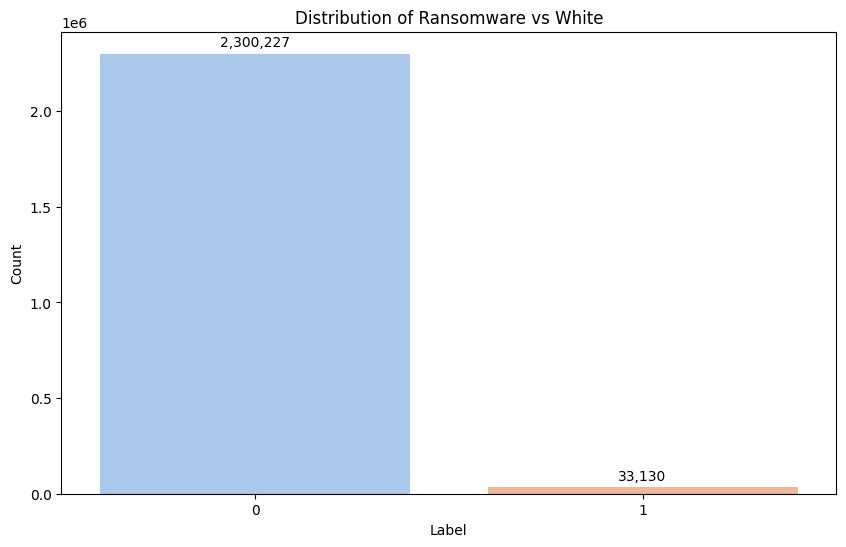

In [ ]:
label_count = y_train.value_counts()
print(label_count)

# Chuy·ªÉn v·ªÅ DataFrame ƒë·ªÉ ti·ªán v·∫Ω
label_df = label_count.reset_index()
label_df.columns = ['label', 'count']

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='count', data=label_df, palette='pastel')

# Th√™m nh√£n v√† ti√™u ƒë·ªÅ
plt.title('Distribution of Ransomware vs White')
plt.xlabel('Label')
plt.ylabel('Count')

# Hi·ªÉn th·ªã s·ªë l∆∞·ª£ng tr√™n t·ª´ng c·ªôt
for i, row in label_df.iterrows():
    plt.text(i, row['count'] + max(label_df['count']) * 0.01, f"{row['count']:,}",
             ha='center', va='bottom', fontsize=10)

# L∆∞u bi·ªÉu ƒë·ªì
plt.savefig('/content/drive/MyDrive/Graduation4/label-distribution_xtrain.png')

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

In [ ]:
y_train = pd.read_csv('/content/drive/MyDrive/Graduation4/y_train.csv')

In [ ]:
y_train.head()

binary_label
0             0
1             0
2             0
3             0
4             0

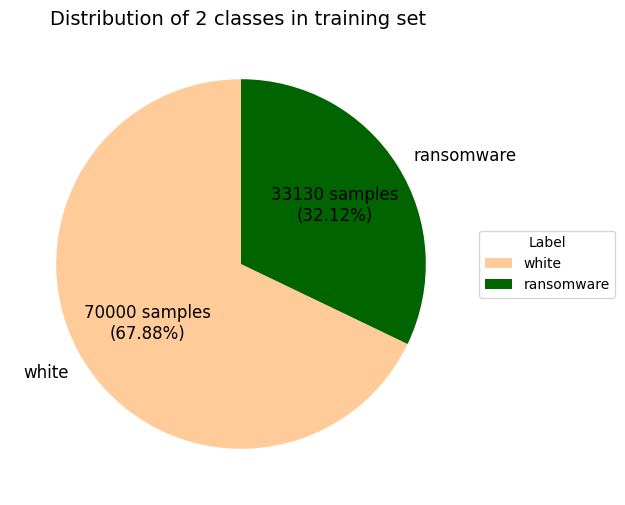

In [ ]:
import matplotlib.pyplot as plt

# Gi·∫£ s·ª≠ y_train l√† DataFrame c√≥ c·ªôt 'family_encoded'
label_counts = y_resampled['binary_label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

# G√°n m√†u cho c√°c nh√£n (c√≥ th·ªÉ t·ª± ch·ªçn m√†u t√πy th√≠ch)
colors = ['#ffcc99','#006400']  # Th√™m m√†u cho c√°c nh√£n 2 v√† 3
# S·ª≠a label_names ƒë·ªÉ bao g·ªìm t·∫•t c·∫£ c√°c nh√£n
label_names = {0: 'white', 1: 'ransomware'}  # G√°n t√™n nh√£n cho ch√∫ th√≠ch

# T·∫°o nh√£n hi·ªÉn th·ªã s·ªë l∆∞·ª£ng m·∫´u v√† t·ªâ l·ªá ph·∫ßn trƒÉm
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count} samples\n({pct:.2f}%)'
    return my_autopct

# V·∫Ω bi·ªÉu ƒë·ªì tr√≤n
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=[label_names[label] for label in labels],
    autopct=make_autopct(sizes),
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)

# Th√™m ch√∫ th√≠ch (legend)
ax.legend(wedges, [label_names[label] for label in labels],
          title='Label', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Distribution of 2 classes in test set ', fontsize=14)
plt.show()

In [ ]:
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')

In [ ]:
y_train.head()

2264511    0
1289376    0
1046802    0
2335966    0
1214724    0
Name: binary_label, dtype: int64

In [ ]:
y_train.value_counts()

binary_label
0    2300227
1      33130
Name: count, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# undersample nh√£n 0 xu·ªëng c√≤n 70000 m·∫´u

rus = RandomUnderSampler(sampling_strategy={0: 70000, 1: 33130}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Ki·ªÉm tra l·∫°i ph√¢n b·ªë sau undersample
print(pd.Series(y_resampled).value_counts())


binary_label
0    70000
1    33130
Name: count, dtype: int64


In [ ]:
X_resampled.to_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv', index=False)
y_resampled.to_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv', index=False)

# 2. M√¥ h√¨nh Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import numpy as np


In [ ]:
# Kh·ªüi t·∫°o m√¥ h√¨nh Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Kh·ªüi t·∫°o chi·∫øn l∆∞·ª£c cross-validation (5-fold, gi·ªØ nguy√™n t·ª∑ l·ªá nh√£n)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# T·∫°o scorer d√πng F1-score (macro ho·∫∑c weighted t√πy b·∫°n)
f1_scorer = make_scorer(f1_score, average='binary')

# Th·ª±c hi·ªán cross-validation
f1_scores = cross_val_score(dt_model, X_resampled, y_resampled,
                            cv=cv, scoring=f1_scorer, n_jobs=-1)

# In k·∫øt qu·∫£ trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n
print("F1-scores cho t·ª´ng fold:", f1_scores)
print("Trung b√¨nh F1-score: %.4f" % np.mean(f1_scores))
print("ƒê·ªô l·ªách chu·∫©n: %.4f" % np.std(f1_scores))


F1-scores cho t·ª´ng fold: [0.87084926 0.87732454 0.87357708 0.87723516 0.87520698]
Trung b√¨nh F1-score: 0.8748
ƒê·ªô l·ªách chu·∫©n: 0.0024


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=cv, scoring=f1_scorer, n_jobs=-1)

# Hu·∫•n luy·ªán grid search
grid_search.fit(X_resampled, y_resampled)

# K·∫øt qu·∫£ t·ªët nh·∫•t
print("Best params:", grid_search.best_params_)
print("Best F1-score: %.4f" % grid_search.best_score_)


Best params: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best F1-score: 0.8871


In [ ]:
import joblib

# L∆∞u model t·ªët nh·∫•t sau grid search
best_dt_model = grid_search.best_estimator_
joblib.dump(best_dt_model, '/content/drive/MyDrive/Graduation4/best_decision_tree_model.pkl')


['/content/drive/MyDrive/Graduation4/best_decision_tree_model.pkl']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Load model n·∫øu c·∫ßn (ho·∫∑c d√πng lu√¥n bi·∫øn best_dt_model)
# best_dt_model = joblib.load('best_decision_tree_model.pkl')

# D·ª± ƒëo√°n tr√™n t·∫≠p test
y_pred = best_dt_model.predict(X_test)

# ƒê√°nh gi√° k·∫øt qu·∫£
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# T√≠nh ri√™ng F1-score n·∫øu mu·ªën
f1 = f1_score(y_test, y_pred, average='binary')
print("F1-score tr√™n t·∫≠p test: %.4f" % f1)


Confusion Matrix:
 [[550167  24890]
 [   902   7381]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    575057
           1       0.23      0.89      0.36      8283

    accuracy                           0.96    583340
   macro avg       0.61      0.92      0.67    583340
weighted avg       0.99      0.96      0.97    583340

F1-score tr√™n t·∫≠p test: 0.3640


# 3. M√¥ h√¨nh RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import joblib

# 1. ƒê·ªãnh nghƒ©a m√¥ h√¨nh v√† c√°c si√™u tham s·ªë c·∫ßn t√¨m ki·∫øm
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 2. Scorer s·ª≠ d·ª•ng F1 macro
f1_scorer = make_scorer(f1_score, average='macro')

# 3. S·ª≠ d·ª•ng StratifiedKFold ƒë·ªÉ gi·ªØ t·ª∑ l·ªá l·ªõp
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring=f1_scorer, cv=cv, n_jobs=-1, verbose=2)

# 5. Hu·∫•n luy·ªán
grid_search.fit(X_resampled, y_resampled)

# 6. In k·∫øt qu·∫£
print("Best F1-score (macro): {:.4f}".format(grid_search.best_score_))
print("Best params:", grid_search.best_params_)

# 7. L∆∞u m√¥ h√¨nh t·ªët nh·∫•t
joblib.dump(grid_search.best_estimator_, 'best_random_forest_model.pkl')
print("M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o 'best_random_forest_model.pkl'")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best F1-score (macro): 0.9266
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o 'best_random_forest_model.pkl'


In [ ]:
joblib.dump(grid_search.best_estimator_, '/content/drive/MyDrive/Graduation4/best_random_forest_model.pkl')

['/content/drive/MyDrive/Graduation4/best_random_forest_model.pkl']

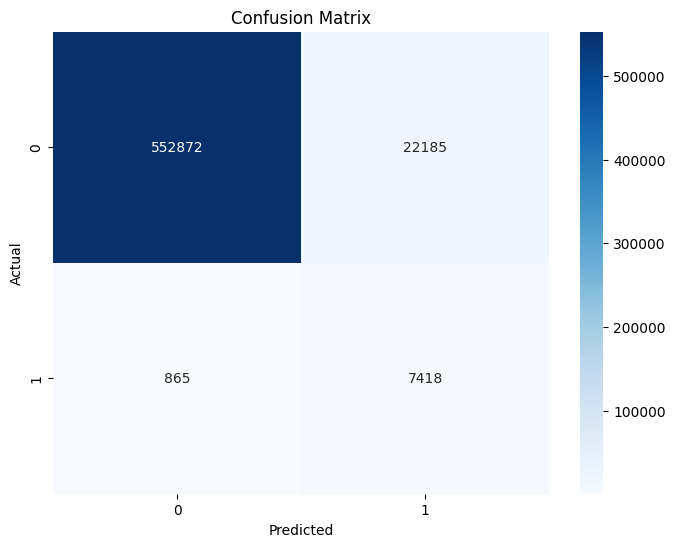

Classification Report:
              precision    recall  f1-score   support

           0     0.9984    0.9614    0.9796    575057
           1     0.2506    0.8956    0.3916      8283

    accuracy                         0.9605    583340
   macro avg     0.6245    0.9285    0.6856    583340
weighted avg     0.9878    0.9605    0.9712    583340



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# 1. T·∫£i m√¥ h√¨nh ƒë√£ l∆∞u
model = joblib.load('best_random_forest_model.pkl')

# 2. D·ª± ƒëo√°n tr√™n t·∫≠p test
y_pred = model.predict(X_test)

# 3. In Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 4. In Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


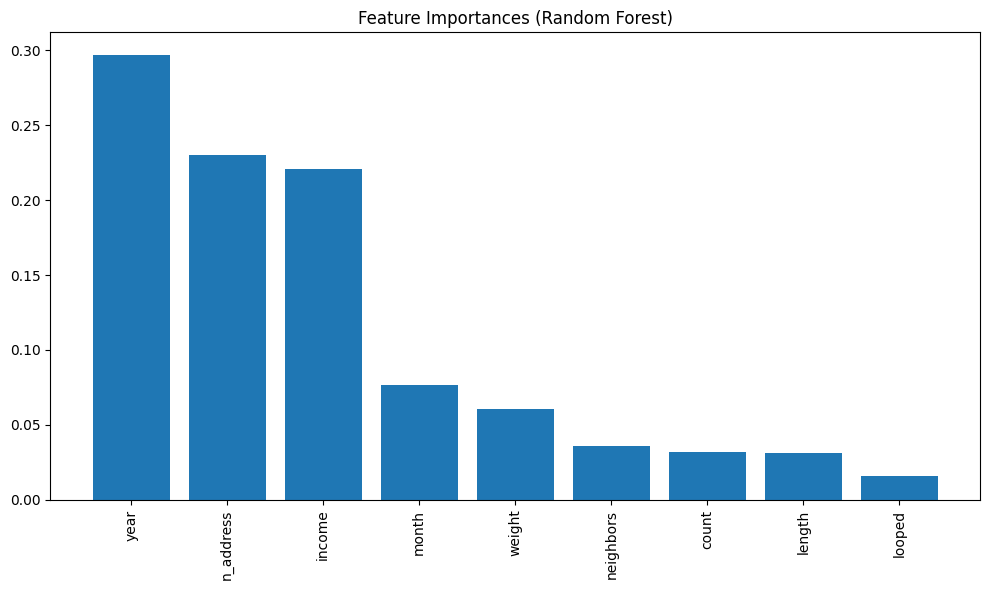

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gi·∫£ s·ª≠ b·∫°n c√≥ t√™n c√°c feature d∆∞·ªõi d·∫°ng list
# N·∫øu X_resampled l√† DataFrame, ta c√≥ th·ªÉ l·∫•y t√™n c·ªôt t·ª´ n√≥
feature_names = X_resampled.columns if hasattr(X_resampled, 'columns') else [f'feature_{i}' for i in range(X_resampled.shape[1])]

# L·∫•y importance v√† s·∫Øp x·∫øp
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # S·∫Øp gi·∫£m d·∫ßn

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


D√πng BalancedRandomForestClassifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import joblib

# 1. Kh·ªüi t·∫°o m√¥ h√¨nh
brf = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)

# 2. Grid c√°c si√™u tham s·ªë c∆° b·∫£n
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 3. F1-score (macro ho·∫∑c 'binary' n·∫øu ch·ªâ t·∫≠p trung l·ªõp ransomware)
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)

# 4. K-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. GridSearchCV
grid_search = GridSearchCV(estimator=brf, param_grid=param_grid,
                           scoring=f1_scorer, cv=cv, n_jobs=-1, verbose=2)

# 6. Hu·∫•n luy·ªán
grid_search.fit(X_resampled, y_resampled)

# 7. In k·∫øt qu·∫£
print("Best F1-score (binary, ransomware): {:.4f}".format(grid_search.best_score_))
print("Best params:", grid_search.best_params_)

# 8. L∆∞u m√¥ h√¨nh
joblib.dump(grid_search.best_estimator_, '/content/drive/MyDrive/Graduation4/balanced_random_forest_model.pkl')
print("M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o '/content/drive/MyDrive/Graduation4/balanced_random_forest_model.pkl'")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best F1-score (binary, ransomware): 0.8960
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o '/content/drive/MyDrive/Graduation4/balanced_random_forest_model.pkl'


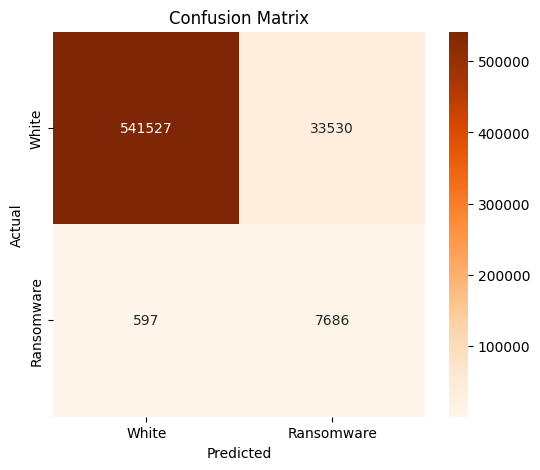

Classification Report:
              precision    recall  f1-score   support

       White     0.9989    0.9417    0.9695    575057
  Ransomware     0.1865    0.9279    0.3106      8283

    accuracy                         0.9415    583340
   macro avg     0.5927    0.9348    0.6400    583340
weighted avg     0.9874    0.9415    0.9601    583340



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. T·∫£i m√¥ h√¨nh
model = joblib.load('/content/drive/MyDrive/Graduation4/balanced_random_forest_model.pkl')

# 2. D·ª± ƒëo√°n
y_pred = model.predict(X_test)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["White", "Ransomware"], digits=4))


# 4. M√¥ h√¨nh XGBoost

XG Boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import joblib

# 1. Kh·ªüi t·∫°o m√¥ h√¨nh XGBoost c∆° b·∫£n
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42)

# 2. Grid tham s·ªë (c√≥ th·ªÉ ƒëi·ªÅu ch·ªânh m·ªü r·ªông th√™m)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 10, 30]  # C√¢n b·∫±ng class 1 n·∫øu c·∫ßn
}

# 3. F1-score binary, t·∫≠p trung v√†o l·ªõp Ransomware (label = 1)
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)

# 4. K-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. GridSearch
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring=f1_scorer, cv=cv, verbose=2, n_jobs=-1)

# 6. Hu·∫•n luy·ªán
grid_search.fit(X_resampled, y_resampled)

# 7. K·∫øt qu·∫£
print("Best F1-score (binary, ransomware): {:.4f}".format(grid_search.best_score_))
print("Best params:", grid_search.best_params_)

# 8. L∆∞u m√¥ h√¨nh
joblib.dump(grid_search.best_estimator_, '/content/drive/MyDrive/Graduation4/best_xgboost_model.pkl')
print("‚úÖ ƒê√£ l∆∞u m√¥ h√¨nh t·∫°i '/content/drive/MyDrive/Graduation4/best_xgboost_model.pkl'")


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:46:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best F1-score (binary, ransomware): 0.9085
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}
‚úÖ ƒê√£ l∆∞u m√¥ h√¨nh t·∫°i '/content/drive/MyDrive/Graduation4/best_xgboost_model.pkl'


Fine-tuning Xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import joblib

# 1. Kh·ªüi t·∫°o m√¥ h√¨nh XGBoost c∆° b·∫£n
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42)

# 2. Grid tham s·ªë m·ªü r·ªông
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 10, 30]  # Th·ª≠ c√¢n b·∫±ng c√°c l·ªõp n·∫øu c·∫ßn
}

# 3. F1-score binary cho l·ªõp ransomware
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)

# 4. K-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring=f1_scorer, cv=cv, verbose=2, n_jobs=-1)

# 6. Hu·∫•n luy·ªán
grid_search.fit(X_resampled, y_resampled)

# 7. K·∫øt qu·∫£
print("Best F1-score (binary, ransomware): {:.4f}".format(grid_search.best_score_))
print("Best params:", grid_search.best_params_)

# 8. L∆∞u m√¥ h√¨nh ƒë√£ t·ªëi ∆∞u
joblib.dump(grid_search.best_estimator_, '/content/drive/MyDrive/Graduation4/tuned_xgboost_model.pkl')
print("‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u t·∫°i '/content/drive/MyDrive/Graduation4/tuned_xgboost_model.pkl'")


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:32:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best F1-score (binary, ransomware): 0.9089
Best params: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.9}
‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u t·∫°i '/content/drive/MyDrive/Graduation4/tuned_xgboost_model.pkl'


In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Graduation4/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Graduation4/y_test.csv')


# 5. M√¥ h√¨nh LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
import numpy as np
import time


In [ ]:
# Scorer d√πng F1-score cho l·ªõp 1 (Ransomware)
f1_ransomware = make_scorer(f1_score, pos_label=1)

# T·∫°o LightGBM base model
lgbm = LGBMClassifier(random_state=42, n_jobs=-1)

# Grid tham s·ªë ƒë·ªÉ RandomizedSearch th·ª≠ nghi·ªám
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 9, -1],  # -1 nghƒ©a l√† kh√¥ng gi·ªõi h·∫°n
    'num_leaves': [31, 50, 64, 128],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}


In [ ]:
import lightgbm as lgb
import joblib
import time

# B·∫Øt ƒë·∫ßu ƒë·∫øm th·ªùi gian
start_time = time.time()

# 1. Kh·ªüi t·∫°o m√¥ h√¨nh LightGBM ƒë∆°n gi·∫£n
model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_estimators=5000,            # Nhi·ªÅu v√≤ng l·∫∑p ƒë·ªÉ early stopping t·ª± c·∫Øt
    learning_rate=0.05,           # Learning rate nh·ªè ƒë·ªÉ h·ªçc m∆∞·ª£t
    max_depth=7,                  # Gi·ªõi h·∫°n ƒë·ªô s√¢u
    num_leaves=31,                # S·ªë l∆∞·ª£ng l√°
    subsample=0.8,                # Random sample 80% m·ªói c√¢y
    colsample_bytree=0.8,         # Random feature 80% m·ªói c√¢y
    random_state=42,
    n_jobs=-1
)

# 2. Hu·∫•n luy·ªán v·ªõi Early Stopping
model.fit(
    X_resampled, y_resampled,
    eval_set=[(X_resampled, y_resampled)],
    eval_metric='f1',
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

# 3. ƒê·∫øm th·ªùi gian k·∫øt th√∫c
end_time = time.time()
print(f"Training completed in {(end_time - start_time)/60:.2f} minutes.")

# 4. L∆∞u m√¥ h√¨nh v√†o m√°y
joblib.dump(model, '/content/drive/MyDrive/Graduation4/lightgbm_model.pkl')
print("Model saved as '/content/drive/MyDrive/Graduation4/lightgbm_model.pkl'")


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/lightgbm/callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")


[LightGBM] [Info] Number of positive: 33130, number of negative: 70000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 103130, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056
[100]	training's binary_logloss: 0.186671
[200]	training's binary_logloss: 0.150935
[300]	training's binary_logloss: 0.137902
[400]	training's binary_logloss: 0.129285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	training's binary_logloss: 0.122507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[600]	t

# 6. M√¥ h√¨nh Catboost

In [ ]:
pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 21.3 MB/s eta 0:00:00


In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_recall_curve
import numpy as np
import joblib

# Kh·ªüi t·∫°o m√¥ h√¨nh CatBoost
cat_model = CatBoostClassifier(random_seed=42, verbose=0)

# Kh·ªüi t·∫°o chi·∫øn l∆∞·ª£c Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Bi·∫øn l∆∞u f1 v√† threshold cho t·ª´ng fold
thresholds = []
f1_scores = []

# Th·ª±c hi·ªán Cross-Validation
for train_idx, val_idx in cv.split(X_resampled, y_resampled):
    X_train_cv, X_val_cv = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    y_train_cv, y_val_cv = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]

    # Fit model
    cat_model.fit(X_train_cv, y_train_cv)

    # Predict x√°c su·∫•t tr√™n t·∫≠p validation
    y_val_prob = cat_model.predict_proba(X_val_cv)[:, 1]

    # T√¨m threshold t·ªëi ∆∞u theo F1-score
    precisions, recalls, thresholds_cv = precision_recall_curve(y_val_cv, y_val_prob)
    f1_scores_cv = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

    best_idx = np.argmax(f1_scores_cv)
    best_threshold = thresholds_cv[best_idx]
    best_f1 = f1_scores_cv[best_idx]

    thresholds.append(best_threshold)
    f1_scores.append(best_f1)

# T√≠nh threshold trung b√¨nh t·ª´ c√°c fold
optimal_threshold = np.mean(thresholds)
print("Threshold t·ªëi ∆∞u trung b√¨nh:", optimal_threshold)
print("F1-score trung b√¨nh tr√™n CV:", np.mean(f1_scores))

# Hu·∫•n luy·ªán model final tr√™n to√†n b·ªô t·∫≠p X_resampled
cat_model.fit(X_resampled, y_resampled)

# L∆∞u m√¥ h√¨nh v√† threshold
cat_model.save_model("/content/drive/MyDrive/Graduation4/Catboost/catboost_model.cbm")
joblib.dump(optimal_threshold, "/content/drive/MyDrive/Graduation4/Catboost/optimal_threshold.pkl")



Threshold t·ªëi ∆∞u trung b√¨nh: 0.4787133367560964
F1-score trung b√¨nh tr√™n CV: 0.907290328010526


['/content/drive/MyDrive/Graduation4/Catboost/optimal_threshold.pkl']

In [ ]:
# C√†i b·∫£n CatBoost c√≥ h·ªó tr·ª£ GPU
!pip install --upgrade catboost


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 24.6 MB/s eta 0:00:00


In [ ]:
# --- 0. Import th∆∞ vi·ªán c·∫ßn thi·∫øt ---
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import f1_score, make_scorer, precision_recall_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import joblib

# --- 1. T√°ch t·∫≠p Training v√† Validation t·ª´ X_resampled ---
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled,
    test_size=0.1,           # 10% validation
    stratify=y_resampled,
    random_state=42
)

# --- 2. C·∫•u h√¨nh Cross-validation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='binary')

# --- 3. Kh·ªüi t·∫°o CatBoost base model ---
cb_model = CatBoostClassifier(
    task_type="GPU",            # <-- N·∫øu d√πng CPU th√¨ b·ªè d√≤ng n√†y ƒëi!
    devices='0',                # <-- N·∫øu d√πng GPU
    random_state=42,
    verbose=0,
    iterations=300,
)

# --- 4. Thi·∫øt l·∫≠p param grid cho GridSearchCV ---
param_grid = {
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3, 5],
    'class_weights': [[1, 10], [1, 20]]
}

# --- 5. Kh·ªüi t·∫°o GridSearchCV ---
grid_search = GridSearchCV(
    estimator=cb_model,
    param_grid=param_grid,
    cv=cv,
    scoring=f1_scorer,
    n_jobs=1
)

# --- 6. T√¨m ki·∫øm model t·ªët nh·∫•t tr√™n t·∫≠p train ---
grid_search.fit(X_train, y_train)

# --- 7. L·∫•y best model sau grid search ---
best_model = grid_search.best_estimator_

# --- 8. Train l·∫°i Best Model v·ªõi Early Stopping tr√™n Validation ---
best_model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=30,
    verbose=50
)

# --- 9. L∆∞u l·∫°i model ---
best_model.save_model("/content/drive/MyDrive/Graduation4/best_catboost_model.cbm")



0:	learn: 0.5518740	test: 0.5533406	best: 0.5533406 (0)	total: 7.74ms	remaining: 2.31s
50:	learn: 0.1317491	test: 0.1347638	best: 0.1347638 (50)	total: 356ms	remaining: 1.74s
100:	learn: 0.1167746	test: 0.1220219	best: 0.1220219 (100)	total: 707ms	remaining: 1.39s
150:	learn: 0.1074000	test: 0.1155533	best: 0.1155533 (150)	total: 1.05s	remaining: 1.04s
200:	learn: 0.1006259	test: 0.1114356	best: 0.1114356 (200)	total: 1.41s	remaining: 694ms
250:	learn: 0.0957373	test: 0.1095142	best: 0.1095025 (249)	total: 1.76s	remaining: 344ms
299:	learn: 0.0913762	test: 0.1078436	best: 0.1078436 (299)	total: 2.11s	remaining: 0us
bestTest = 0.1078436244
bestIteration = 299


In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/Graduation4/X_test_fe.csv")

Optimal threshold from Validation: 0.8599


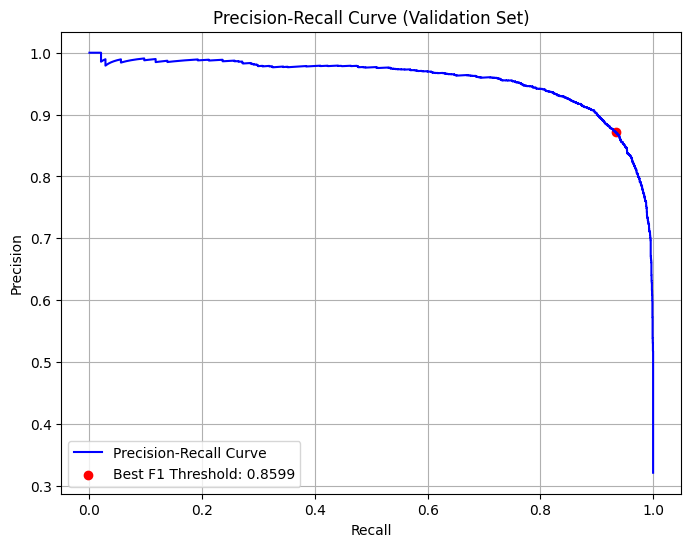


Confusion Matrix:
[[543866  31191]
 [   675   7608]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    575057
           1       0.20      0.92      0.32      8283

    accuracy                           0.95    583340
   macro avg       0.60      0.93      0.65    583340
weighted avg       0.99      0.95      0.96    583340



In [ ]:
# --- 10. Predict x√°c su·∫•t tr√™n Validation Set ---
y_val_probs = best_model.predict_proba(X_val)[:, 1]

# --- 11. Tuning Threshold tr√™n Validation ---
precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal threshold from Validation: {best_threshold:.4f}")

# --- 12. V·∫º BI·ªÇU ƒê·ªí PRECISION-RECALL CURVE ---
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='b')
plt.scatter(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)],
            marker='o', color='red', label=f'Best F1 Threshold: {best_threshold:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Validation Set)')
plt.legend()
plt.grid(True)
plt.show()

# --- 13. Predict x√°c su·∫•t tr√™n Test Set (X_test gi·ªØ ho√†n to√†n unseen) ---
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# --- 14. Predict label tr√™n Test Set v·ªõi threshold ƒë√£ t√¨m ---
y_test_pred = (y_test_probs >= best_threshold).astype(int)

# --- 15. Evaluation k·∫øt qu·∫£ tr√™n Test Set ---
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# --- 16. Load l·∫°i model khi c·∫ßn ---
# loaded_model = CatBoostClassifier()
# loaded_model.load_model("/content/drive/MyDrive/Graduation4/best_catboost_model.cbm")


In [ ]:
!pip install optuna


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 386.6/386.6 kB 24.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.9/231.9 kB 23.1 MB/s eta 0:00:00


In [ ]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, confusion_matrix, classification_report
from catboost import CatBoostClassifier, Pool

# --- 1. Chia t·∫≠p ---
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    stratify=y_resampled,
    random_state=42
)

# --- 2. ƒê·ªãnh nghƒ©a Objective ---
def objective(trial):
    params = {
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "iterations": 300,
        "class_weights": trial.suggest_categorical("class_weights", [[1, 10], [1, 20], [1, 30]]),
        "random_state": 42,
        "verbose": 0,
        "early_stopping_rounds": 30,
        "thread_count": 4,
        "task_type": "GPU",          # --- Th√™m ch·∫°y GPU ---
        "devices": "0"               # --- Ch·∫°y tr√™n GPU s·ªë 0 ---
    }
    model = CatBoostClassifier(**params)

    model.fit(
        X_train, y_train,
        eval_set=Pool(X_val, y_val),
        use_best_model=True
    )

    y_val_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred, average='binary')

    return f1

# --- 3. Check c√≥ checkpoint kh√¥ng ---
checkpoint_path = "/content/drive/MyDrive/Graduation4/optuna_study.pkl"

if os.path.exists(checkpoint_path):
    print("üîÑ Loading existing Optuna study...")
    study = joblib.load(checkpoint_path)
else:
    print("‚ú® Creating new Optuna study...")
    study = optuna.create_study(direction="maximize")

# --- 4. Define Callback ƒë·ªÉ l∆∞u checkpoint m·ªói trial ---
def save_study_callback(study, trial):
    joblib.dump(study, checkpoint_path)

# --- 5. Optuna Optimize ---
study.optimize(objective, n_trials=30, callbacks=[save_study_callback])

# --- 6. K·∫øt qu·∫£ sau t·ªëi ∆∞u ---
print("\nüèÜ Best Hyperparameters:")
print(study.best_params)

# --- 7. Train l·∫°i model t·ªët nh·∫•t ---
best_params = study.best_params
best_params.update({
    "iterations": 300,
    "random_state": 42,
    "verbose": 0,
    "early_stopping_rounds": 20,
    "thread_count": 4,
    "task_type": "GPU",
    "devices": "0"
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(
    X_train, y_train,
    eval_set=Pool(X_val, y_val),
    use_best_model=True
)

# --- 8. T·ªëi ∆∞u threshold ---
y_val_probs = best_model.predict_proba(X_val)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"\nüîç Optimal threshold (on val set): {best_threshold:.4f}")



üîÑ Loading existing Optuna study...


/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 10] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 20] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 30] which is of type list.
  warnings.warn(message)
[I 2025-04-26 16:34:55,430] Trial 30 finished with value: 0.8126505651985917 and parameters: {'depth': 10, 'learning_rate': 0.01033999902217851, 'l2_leaf_reg': 5.760823972214135, 'class_weights': [1, 10]}.


üèÜ Best Hyperparameters:
{'depth': 9, 'learning_rate': 0.1625586595768694, 'l2_leaf_reg': 9.937420808399505, 'class_weights': [1, 10]}

üîç Optimal threshold (on val set): 0.8744



üìä Confusion Matrix on Test:
[[549783  25274]
 [   782   7501]]

üìÑ Classification Report on Test:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    575057
           1       0.23      0.91      0.37      8283

    accuracy                           0.96    583340
   macro avg       0.61      0.93      0.67    583340
weighted avg       0.99      0.96      0.97    583340


‚úÖ Best model saved at: /content/drive/MyDrive/Graduation4/best_catboost_optuna_gpu.cbm


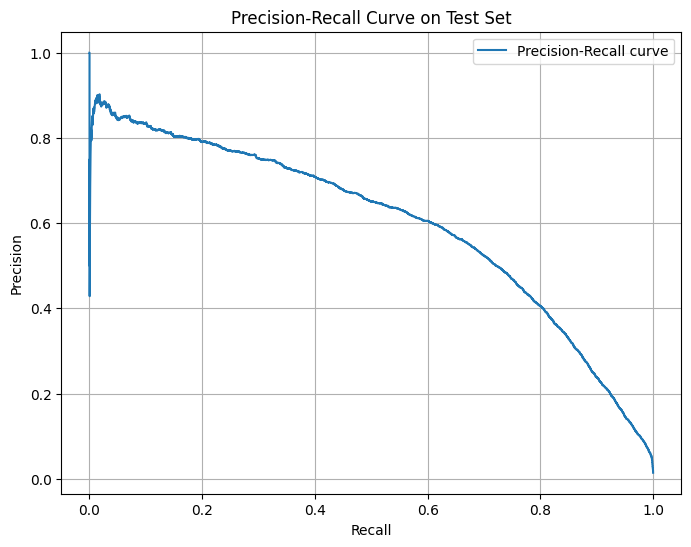

In [ ]:
# --- 9. Predict tr√™n Test ---
y_test_probs = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_probs >= best_threshold).astype(int)

print("\nüìä Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_test_pred))

print("\nüìÑ Classification Report on Test:")
print(classification_report(y_test, y_test_pred))

# --- 10. Save final model ---
model_path = "/content/drive/MyDrive/Graduation4/best_catboost_optuna_gpu.cbm"
best_model.save_model(model_path)
print(f"\n‚úÖ Best model saved at: {model_path}")

# --- 11. Precision-Recall Curve ---
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_probs)

plt.figure(figsize=(8,6))
plt.plot(recall_test, precision_test, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test Set')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import joblib
import os

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
from sklearn.metrics import f1_score

from catboost import CatBoostClassifier, Pool
import lightgbm as lgb
import xgboost as xgb

import matplotlib.pyplot as plt

# ==== SETUP ====
SEED = 42
N_SPLITS = 5
CHECKPOINT_DIR = "/content/drive/MyDrive/Graduation4/checkpoints_stacking/"
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# Your dataset (assume prepared)
# X_resampled, y_resampled: training set (after SMOTE or whatever preprocessing)
# X_test, y_test: final unseen test set

# ==== BASE MODELS ====
def get_base_models():
    return [
        ('catboost', CatBoostClassifier(
            iterations=300,
            learning_rate=0.1,
            depth=8,
            random_seed=SEED,
            verbose=0,
            task_type="GPU"  # N·∫øu b·∫°n d√πng A100, ƒë·ªÉ tƒÉng t·ªëc
        )),
        ('lgbm', lgb.LGBMClassifier(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=8,
            random_state=SEED,
        )),
        ('xgb', xgb.XGBClassifier(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=8,
            random_state=SEED,
            tree_method="gpu_hist"
        )),
        ('extratrees', ExtraTreesClassifier(
            n_estimators=300,
            max_depth=8,
            random_state=SEED,
            n_jobs=-1
        ))
    ]

# ==== STACKING ====
def train_stacking(X, y, base_models, checkpoint_dir):
    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
    S_train = np.zeros((X.shape[0], len(base_models)))

    for idx, (name, model) in enumerate(base_models):
        fold_idx = 0
        for train_idx, val_idx in skf.split(X, y):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
            y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train_fold, y_train_fold)

            # Predict probabilities for class 1
            S_train[val_idx, idx] = model.predict_proba(X_val_fold)[:, 1]

            # Save model per fold (checkpoint)
            joblib.dump(model, f"{checkpoint_dir}{name}_fold{fold_idx}.pkl")
            fold_idx += 1

    return S_train

def predict_stacking(X, base_models, checkpoint_dir):
    S_test = np.zeros((X.shape[0], len(base_models)))

    for idx, (name, model) in enumerate(base_models):
        preds = np.zeros((X.shape[0], N_SPLITS))
        for fold_idx in range(N_SPLITS):
            model_fold = joblib.load(f"{checkpoint_dir}{name}_fold{fold_idx}.pkl")
            preds[:, fold_idx] = model_fold.predict_proba(X)[:, 1]
        S_test[:, idx] = preds.mean(axis=1)
    return S_test

# ==== TRAIN ====
base_models = get_base_models()

print("Training base models and generating stacked features...")
S_train = train_stacking(X_resampled, y_resampled, base_models, CHECKPOINT_DIR)

# Train meta-learner
meta_model = LogisticRegression(random_state=SEED, max_iter=1000)
meta_model.fit(S_train, y_resampled)

# Save meta-learner
joblib.dump(meta_model, f"{CHECKPOINT_DIR}meta_model.pkl")



Training base models and generating stacked features...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.


['/content/drive/MyDrive/Graduation4/checkpoints_stacking/meta_model.pkl']

Predicting on test set...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:49:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:49:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:49:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

Optimal Threshold: 0.9547

üìä Confusion Matrix on Test:
[[572646   2411]
 [  2457   5826]]

üìÑ Classification Report on Test:
              precision    recall  f1-score   support

           0     0.9957    0.9958    0.9958    575057
           1     0.7073    0.7034    0.7053      8283

    accuracy                         0.9917    583340
   macro avg     0.8515    0.8496    0.8505    583340
weighted avg     0.9916    0.9917    0.9916    583340



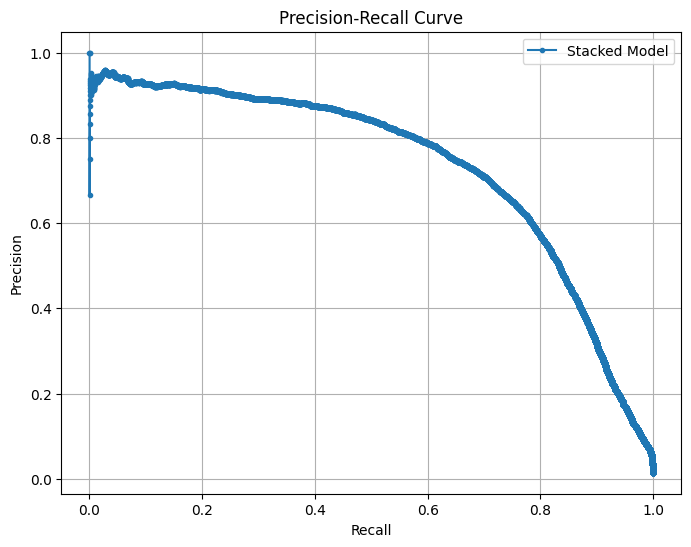

In [ ]:
# ==== PREDICT ====
print("Predicting on test set...")
S_test = predict_stacking(X_test, base_models, CHECKPOINT_DIR)
meta_model = joblib.load(f"{CHECKPOINT_DIR}meta_model.pkl")
y_test_probs = meta_model.predict_proba(S_test)[:, 1]

# ==== TUNE THRESHOLD ====
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal Threshold: {best_threshold:.4f}")

y_pred_final = (y_test_probs >= best_threshold).astype(int)

# ==== EVALUATION ====
print("\nüìä Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_pred_final))

print("\nüìÑ Classification Report on Test:")
print(classification_report(y_test, y_pred_final, digits=4))

# ==== PLOT PRECISION-RECALL CURVE ====
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Stacked Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pickle

# L∆∞u best_threshold v√†o file .pkl
with open("/content/drive/MyDrive/Graduation4/checkpoints_stacking/best_threshold.pkl", "wb") as f:
    pickle.dump(best_threshold, f)

print(f"Best threshold saved: {best_threshold:.4f}")


Best threshold saved: 0.9547


In [ ]:
# ==== PREDICT ====
print("Predicting on validation set for threshold tuning...")
S_val = predict_stacking(X_val, base_models, CHECKPOINT_DIR)
meta_model = joblib.load(f"{CHECKPOINT_DIR}meta_model.pkl")
y_val_probs = meta_model.predict_proba(S_val)[:, 1]

# ==== TUNE THRESHOLD ====
precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)  # Tuning tr√™n validation set
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal Threshold: {best_threshold:.4f}")

# ==== PREDICT FINAL ====
print("Predicting on test set with the optimal threshold...")
S_test = predict_stacking(X_test, base_models, CHECKPOINT_DIR)
y_test_probs = meta_model.predict_proba(S_test)[:, 1]
y_pred_final = (y_test_probs >= best_threshold).astype(int)


Predicting on validation set for threshold tuning...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

Optimal Threshold: 0.3568
Predicting on test set with the optimal threshold...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW


üìä Confusion Matrix on Test:
[[554160  20897]
 [   707   7576]]

üìÑ Classification Report on Test:
              precision    recall  f1-score   support

           0     0.9987    0.9637    0.9809    575057
           1     0.2661    0.9146    0.4122      8283

    accuracy                         0.9630    583340
   macro avg     0.6324    0.9392    0.6966    583340
weighted avg     0.9883    0.9630    0.9728    583340



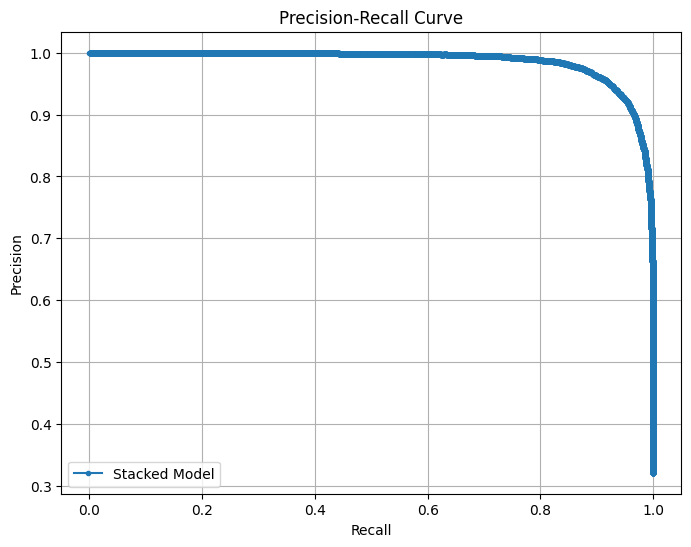

In [ ]:
# ==== EVALUATION ====
print("\nüìä Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_pred_final))

print("\nüìÑ Classification Report on Test:")
print(classification_report(y_test, y_pred_final, digits=4))

# ==== PLOT PRECISION-RECALL CURVE ====
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Stacked Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pickle

# L∆∞u best_threshold v√†o file .pkl
with open("/content/drive/MyDrive/Graduation4/checkpoints_stacking/best_threshold1.pkl", "wb") as f:
    pickle.dump(best_threshold, f)

print(f"Best threshold saved: {best_threshold:.4f}")


Best threshold saved: 0.3568


In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/Graduation4/X_test_fe.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Graduation4/y_test.csv')

# Ensemble 1

In [ ]:
!pip install optuna



   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 386.6/386.6 kB 9.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.9/231.9 kB 25.5 MB/s eta 0:00:00


In [ ]:
# C√†i b·∫£n CatBoost c√≥ h·ªó tr·ª£ GPU
!pip install --upgrade catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 24.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import optuna
import joblib
import os

from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

# 1. Split X_resampled into train + val
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 2. Define base models
base_models = {
    "catboost": CatBoostClassifier(iterations=500, depth=8, learning_rate=0.05, verbose=0, random_state=42),
    "lgbm": LGBMClassifier(n_estimators=500, max_depth=8, learning_rate=0.05, random_state=42, n_jobs=-1),
    "rf": RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42, n_jobs=-1),
    "xgb": XGBClassifier(n_estimators=500, max_depth=8, learning_rate=0.05, random_state=42, tree_method="hist")
}

# 3. Train base models on X_train
for name, model in base_models.items():
    print(f"Training base model: {name}")
    model.fit(X_train, y_train)

# 4. Get predictions for meta-features
meta_train = []
meta_val = []
meta_test = []

for name, model in base_models.items():
    meta_train.append(model.predict_proba(X_train)[:, 1])  # probability for class 1
    meta_val.append(model.predict_proba(X_val)[:, 1])
    meta_test.append(model.predict_proba(X_test)[:, 1])

meta_train = np.vstack(meta_train).T
meta_val = np.vstack(meta_val).T
meta_test = np.vstack(meta_test).T

# 5. Meta-learner
meta_model = CatBoostClassifier(
    iterations=500,
    depth=4,
    learning_rate=0.03,
    random_state=42,
    verbose=0,
    task_type="GPU" if os.path.exists("/usr/bin/nvidia-smi") else "CPU" # auto GPU
)

# 6. Train meta-learner
print("Training meta-learner...")
meta_model.fit(meta_train, y_train)

# 7. Save models
joblib.dump(base_models, "/content/drive/MyDrive/Graduation4/base_models.pkl")
meta_model.save_model("/content/drive/MyDrive/Graduation4/meta_model.cbm")



Training base model: catboost
Training base model: lgbm
[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training base model: rf


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training base model: xgb
Training meta-learner...


‚úÖ Best threshold from validation tuning: 0.1932

üìä Confusion Matrix on Test:
[[544776  30281]
 [   838   7445]]

üìÑ Classification Report on Test:
              precision    recall  f1-score   support

           0     0.9985    0.9473    0.9722    575057
           1     0.1973    0.8988    0.3236      8283

    accuracy                         0.9467    583340
   macro avg     0.5979    0.9231    0.6479    583340
weighted avg     0.9871    0.9467    0.9630    583340



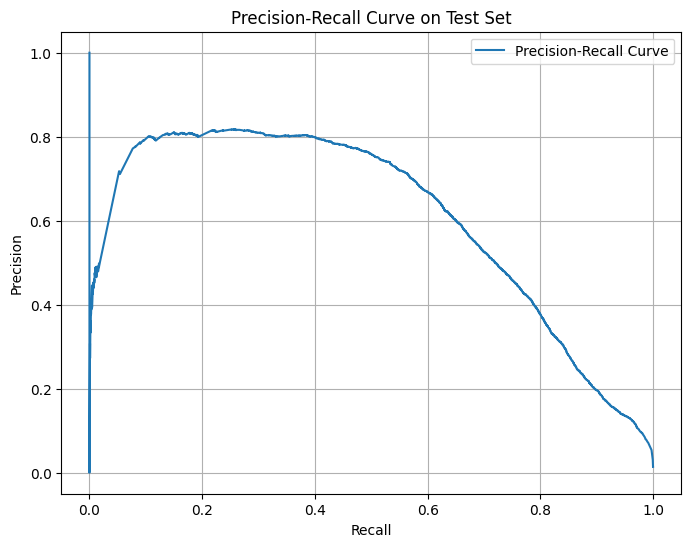

In [ ]:
# 8. Predict on validation set to find best threshold
val_probs = meta_model.predict_proba(meta_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, val_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"‚úÖ Best threshold from validation tuning: {best_threshold:.4f}")

# 9. Evaluate on test set
test_probs = meta_model.predict_proba(meta_test)[:, 1]
y_pred_test = (test_probs >= best_threshold).astype(int)

# 10. Report
print("\nüìä Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_pred_test))

print("\nüìÑ Classification Report on Test:")
print(classification_report(y_test, y_pred_test, digits=4))

# 11. Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
precision_test, recall_test, _ = precision_recall_curve(y_test, test_probs)
plt.plot(recall_test, precision_test, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test Set')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import fbeta_score

# 1. Th·ª≠ v·ªõi beta=0.5 ƒë·ªÉ favor precision
beta = 0.5

precision, recall, thresholds = precision_recall_curve(y_val, val_probs)
fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

best_threshold = thresholds[np.argmax(fbeta_scores)]
print(f"‚úÖ Best threshold with F{beta}-score: {best_threshold:.4f}")

# Predict l·∫°i tr√™n test set
test_probs = meta_model.predict_proba(meta_test)[:, 1]
y_pred_test = (test_probs >= best_threshold).astype(int)

# ƒê√°nh gi√° l·∫°i
print("\nüìä Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_pred_test))

print("\nüìÑ Classification Report on Test:")
print(classification_report(y_test, y_pred_test, digits=4))


‚úÖ Best threshold with F0.5-score: 0.9084

üìä Confusion Matrix on Test:
[[565958   9099]
 [  1822   6461]]

üìÑ Classification Report on Test:
              precision    recall  f1-score   support

           0     0.9968    0.9842    0.9904    575057
           1     0.4152    0.7800    0.5420      8283

    accuracy                         0.9813    583340
   macro avg     0.7060    0.8821    0.7662    583340
weighted avg     0.9885    0.9813    0.9841    583340



In [ ]:
import numpy as np
import pandas as pd
import joblib
import json
import time
from sklearn.metrics import (
    precision_recall_curve, roc_auc_score, average_precision_score,
    precision_score, recall_score, fbeta_score
)
from catboost import CatBoostClassifier

# Load models
base_models = joblib.load("/content/drive/MyDrive/Graduation4/base_models.pkl")
meta_model = CatBoostClassifier()
meta_model.load_model("/content/drive/MyDrive/Graduation4/meta_model.cbm")

# 1Ô∏è‚É£ Predict base models + meta model + ƒëo inference time t·ªïng th·ªÉ
start_time = time.time()

# Base model predictions
meta_X_valid1 = []
for name, model in base_models.items():
    preds = model.predict_proba(X_valid1)[:, 1]
    meta_X_valid1.append(preds)

meta_X_valid1 = np.vstack(meta_X_valid1).T

# Meta model prediction
probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.time() - start_time

# 2Ô∏è‚É£ Tuning threshold theo F2
precision, recall, thresholds = precision_recall_curve(y_valid1, probs)
f2_scores = (5 * precision * recall) / (4 * precision + recall + 1e-10)  # tr√°nh chia 0
best_idx = np.argmax(f2_scores)
best_threshold = thresholds[best_idx]
best_f2 = f2_scores[best_idx]

# 3Ô∏è‚É£ C√°c ch·ªâ s·ªë kh√°c
pr_auc = average_precision_score(y_valid1, probs)
roc_auc = roc_auc_score(y_valid1, probs)

binary_preds = (probs >= best_threshold).astype(int)
precision_val = precision_score(y_valid1, binary_preds)
recall_val = recall_score(y_valid1, binary_preds)
f1_val = fbeta_score(y_valid1, binary_preds, beta=1)

# 4Ô∏è‚É£ L∆∞u k·∫øt qu·∫£ ƒë√°nh gi√°
results = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision_val,
    "Recall": recall_val,
    "F1_score": f1_val,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/ensemble1_valid1_recall.json", "w") as f:
    json.dump(results, f, indent=4)

# Save threshold m·ªõi ri√™ng file
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_f2)}
with open(f"/content/drive/MyDrive/Graduation4/ensemble1_threshold_f2.json", 'w') as f:
    json.dump(threshold_info, f)
print(f"Best threshold with F2-score: {best_threshold:.4f}, F2-score: {best_f2:.4f}")

print("ƒê√£ t√≠nh xong v√† l∆∞u k·∫øt qu·∫£.")


Best threshold with F2-score: 0.9468, F2-score: 0.6642
ƒê√£ t√≠nh xong v√† l∆∞u k·∫øt qu·∫£.


# Ensemble 2

In [ ]:
X_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_test1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_test1.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, fbeta_score, classification_report, confusion_matrix
import joblib
import os


# --------- B∆∞·ªõc 1: Chu·∫©n b·ªã d·ªØ li·ªáu ----------
# Gi·∫£ s·ª≠ b·∫°n ƒë√£ c√≥ s·∫µn X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

n_folds = 5
SEED = 42

# Base learners
base_models = {
    "catboost": CatBoostClassifier(iterations=300, learning_rate=0.05, depth=8, l2_leaf_reg=5,
                                   random_state=SEED, verbose=0, task_type="CPU"),
    "lightgbm": LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=8,
                               random_state=SEED, n_jobs=-1),
    "xgboost": XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8,
                             random_state=SEED, n_jobs=-1, verbosity=0),
    "random_forest": RandomForestClassifier(n_estimators=300, max_depth=12,
                                             random_state=SEED, n_jobs=-1)
}

meta_model = LogisticRegression(random_state=SEED, max_iter=1000)

# --------- B∆∞·ªõc 2: Training base models + t·∫°o meta-features ----------
def train_base_models(X_train, y_train, X_val, X_test):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=SEED)

    meta_train = np.zeros((X_train.shape[0], len(base_models)))
    meta_val = np.zeros((X_val.shape[0], len(base_models)))
    meta_test = np.zeros((X_test.shape[0], len(base_models)))

    for idx, (name, model) in enumerate(base_models.items()):
        print(f"Training base model: {name}")
        val_preds = np.zeros(X_val.shape[0])
        test_preds = np.zeros(X_test.shape[0])
        oof_preds = np.zeros(X_train.shape[0])

        for fold_idx, (train_idx, valid_idx) in enumerate(skf.split(X_train, y_train)):
            X_tr, X_fold_val = X_train.iloc[train_idx], X_train.iloc[valid_idx]
            y_tr, y_fold_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

            # Train
            model.fit(X_tr, y_tr)
            oof_preds[valid_idx] = model.predict_proba(X_fold_val)[:, 1]

        # Sau khi train xong 5 fold, fit l·∫°i tr√™n full training
        model.fit(X_train, y_train)
        val_preds = model.predict_proba(X_val)[:, 1]
        test_preds = model.predict_proba(X_test)[:, 1]

        # G√°n v√†o meta features
        meta_train[:, idx] = oof_preds
        meta_val[:, idx] = val_preds
        meta_test[:, idx] = test_preds

        # Save model
        joblib.dump(model, f"/content/drive/MyDrive/Graduation4/ModelStackL2/{name}.pkl")

    return meta_train, meta_val, meta_test

# Train level-1 models
meta_X_train, meta_X_val, meta_X_test = train_base_models(X_train, y_train, X_val, X_test)

# --------- B∆∞·ªõc 3: Training meta-model ----------
print("Training meta-model...")

meta_model.fit(meta_X_train, y_train)

# Save meta model
joblib.dump(meta_model, "/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl")



Training base model: catboost
Training base model: lightgbm
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 21204, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 66004, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321253 -> initscore=-0.748018
[LightGBM] [Info] Start training from score -0.748018


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056
Training base model: xgboost
Training base model: random_forest


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Training meta-model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl']

‚úÖ Best threshold with F0.5-score: 0.8417, F0.5-score: 0.9340

üìä Confusion Matrix on Test:
[[567869   7188]
 [  1450   6833]]

üìÑ Classification Report on Test:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    575057
           1       0.49      0.82      0.61      8283

    accuracy                           0.99    583340
   macro avg       0.74      0.91      0.80    583340
weighted avg       0.99      0.99      0.99    583340



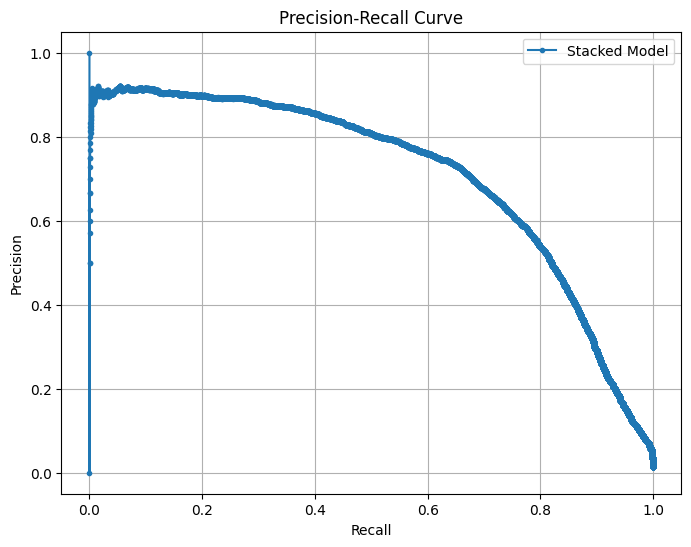

In [ ]:
# --------- B∆∞·ªõc 4: Predict tr√™n t·∫≠p Validation v√† Test ----------
val_probs = meta_model.predict_proba(meta_X_val)[:, 1]
test_probs = meta_model.predict_proba(meta_X_test)[:, 1]

# --------- B∆∞·ªõc 5: Tune Threshold v·ªõi F0.5 tr√™n Validation ----------
def find_best_threshold(y_true, probs, beta=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=0.5)

print(f"‚úÖ Best threshold with F0.5-score: {best_threshold:.4f}, F0.5-score: {best_fbeta:.4f}")

# --------- B∆∞·ªõc 6: Final Evaluation ----------
y_test_pred = (test_probs >= best_threshold).astype(int)

print("\nüìä Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_test_pred))

print("\nüìÑ Classification Report on Test:")
print(classification_report(y_test, y_test_pred))

# --------- B∆∞·ªõc 7: V·∫Ω Precision-Recall Curve ----------
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, test_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Stacked Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score, roc_auc_score)
import joblib
import time
import json

# C√°c base model ƒë√£ l∆∞u
base_learner_names = ['catboost', 'lightgbm', 'xgboost', 'random_forest']
base_models = {name: joblib.load(f"/content/drive/MyDrive/Graduation4/ModelStackL2/{name}.pkl") for name in base_learner_names}

# Load meta model
meta_model = joblib.load("/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl")

# T√≠nh meta_X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    meta_X_valid1[:, idx] = model.predict_proba(X_valid1)[:, 1]

# Predict tr√™n X_val ƒë·ªÉ tune l·∫°i threshold v·ªõi F2
meta_X_val = np.zeros((X_val.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    meta_X_val[:, idx] = model.predict_proba(X_val)[:, 1]

val_probs = meta_model.predict_proba(meta_X_val)[:, 1]

# T√¨m best threshold theo F2
def find_best_threshold(y_true, probs, beta=2.0):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=2.0)

# Save threshold m·ªõi ri√™ng file
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"/content/drive/MyDrive/Graduation4/ModelStackL2/threshold_f2.json", 'w') as f:
    json.dump(threshold_info, f)
print(f"Best threshold with F2-score: {best_threshold:.4f}, F2-score: {best_fbeta:.4f}")

# Predict tr√™n X_valid1 v·ªõi threshold m·ªõi
start_time = time.time()
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]
inference_time = time.time() - start_time

valid1_preds = (valid1_probs >= best_threshold).astype(int)

# T√≠nh c√°c metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# L∆∞u v√†o JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/ensemble2_metrics_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In k·∫øt qu·∫£ preview
print(json.dumps(metrics, indent=4))


Best threshold with F2-score: 0.1320, F2-score: 0.9345
{
    "PR_AUC": 0.7119889557034487,
    "ROC_AUC": 0.987052714777025,
    "Precision": 0.16345354827987368,
    "Recall": 0.9497827136648962,
    "F1_score": 0.27890818858560795,
    "Inference_time_sec": 0.009344339370727539
}


In [ ]:
from sklearn.model_selection import train_test_split

# --------- B∆∞·ªõc 1: Chu·∫©n b·ªã d·ªØ li·ªáu ----------
# Gi·∫£ s·ª≠ b·∫°n ƒë√£ c√≥ s·∫µn X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

In [ ]:
X_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_valid1.csv')
y_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_valid1.csv')

In [ ]:
pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 26.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score, roc_auc_score)
import joblib
import time
import json

# C√°c base model ƒë√£ l∆∞u
base_learner_names = ['catboost', 'lightgbm', 'xgboost', 'random_forest']
base_models = {name: joblib.load(f"/content/drive/MyDrive/Graduation4/ModelStackL2/{name}.pkl") for name in base_learner_names}

# Load meta model
meta_model = joblib.load("/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl")

# T√≠nh meta_X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    meta_X_valid1[:, idx] = model.predict_proba(X_valid1)[:, 1]

# Predict tr√™n X_val ƒë·ªÉ tune l·∫°i threshold v·ªõi F2
meta_X_val = np.zeros((X_val.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    meta_X_val[:, idx] = model.predict_proba(X_val)[:, 1]

val_probs = meta_model.predict_proba(meta_X_val)[:, 1]

# T√¨m best threshold theo F2
def find_best_threshold(y_true, probs, beta=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=0.5)

# Save threshold m·ªõi ri√™ng file
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"/content/drive/MyDrive/Graduation4/ModelStackL2/threshold_f2.json", 'w') as f:
    json.dump(threshold_info, f)
print(f"Best threshold with F2-score: {best_threshold:.4f}, F2-score: {best_fbeta:.4f}")

# B·∫ÆT ƒê·∫¶U ƒêO TO√ÄN B·ªò INFERENCE TIME (base + meta)
start_time = time.time()

# Predict base models cho X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    meta_X_valid1[:, idx] = model.predict_proba(X_valid1)[:, 1]

# Predict meta model
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.time() - start_time

# Predict label v·ªõi threshold ƒë√£ tune
valid1_preds = (valid1_probs >= best_threshold).astype(int)

# T√≠nh c√°c metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# L∆∞u v√†o JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/ensemble2_valid1_precision.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In k·∫øt qu·∫£ preview
print(json.dumps(metrics, indent=4))


Best threshold with F2-score: 0.8417, F2-score: 0.9340
{
    "PR_AUC": 0.7119889557034487,
    "ROC_AUC": 0.987052714777025,
    "Precision": 0.482840733996358,
    "Recall": 0.8322066634476099,
    "F1_score": 0.611116035812428,
    "Inference_time_sec": 3.256910562515259
}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score, roc_auc_score)
import joblib
import time
import json

# C√°c base model ƒë√£ l∆∞u
base_learner_names = ['catboost', 'lightgbm', 'xgboost', 'random_forest']
base_models = {name: joblib.load(f"/content/drive/MyDrive/Graduation4/ModelStackL2/{name}.pkl") for name in base_learner_names}

# Load meta model
meta_model = joblib.load("/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl")

# Load threshold ƒë√£ tune s·∫µn t·ª´ tr∆∞·ªõc (kh√¥ng t√≠nh th·ªùi gian)
with open(f"/content/drive/MyDrive/Graduation4/ModelStackL2/threshold_f2.json", 'r') as f:
    threshold_info = json.load(f)
best_threshold = threshold_info['best_threshold']

# B·∫ÆT ƒê·∫¶U ƒêO INFERENCE TIME TR√äN X_valid1
start_time = time.perf_counter()

# Predict base models cho X_valid1
meta_X_valid1 = np.column_stack([
    base_models[name].predict_proba(X_valid1)[:, 1] for name in base_learner_names
])

# Predict meta model
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.perf_counter() - start_time  # ch·ªâ th·ªùi gian predict X_valid1

# Predict label v·ªõi threshold
valid1_preds = (valid1_probs >= best_threshold).astype(int)

# T√≠nh c√°c metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# L∆∞u metrics v√†o JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/ensemble2_valid1_precision.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In k·∫øt qu·∫£
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.7119889557034487,
    "ROC_AUC": 0.987052714777025,
    "Precision": 0.482840733996358,
    "Recall": 0.8322066634476099,
    "F1_score": 0.611116035812428,
    "Inference_time_sec": 3.1055024130000675
}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (confusion_matrix, classification_report)
import joblib
import json

# C√°c base model ƒë√£ l∆∞u
base_learner_names = ['catboost', 'lightgbm', 'xgboost', 'random_forest']
base_models = {name: joblib.load(f"/content/drive/MyDrive/Graduation4/ModelStackL2/{name}.pkl") for name in base_learner_names}

# Load meta model
meta_model = joblib.load("/content/drive/MyDrive/Graduation4/ModelStackL2/meta_model.pkl")

# Load threshold ƒë√£ tune
with open(f"/content/drive/MyDrive/Graduation4/ModelStackL2/threshold_f2.json", 'r') as f:
    threshold_info = json.load(f)
best_threshold = threshold_info['best_threshold']

# Predict base models cho X_test1
meta_X_test1 = np.column_stack([
    base_models[name].predict_proba(X_test1)[:, 1] for name in base_learner_names
])

# Predict meta model
test1_probs = meta_model.predict_proba(meta_X_test1)[:, 1]

# Predict labels v·ªõi threshold
test1_preds = (test1_probs >= best_threshold).astype(int)

# T√≠nh confusion matrix v√† classification report
cm = confusion_matrix(y_test1, test1_preds)
report = classification_report(y_test1, test1_preds, output_dict=True)

# In k·∫øt qu·∫£
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(json.dumps(report, indent=4))

# Optionally: l∆∞u v√†o JSON n·∫øu mu·ªën
results = {
    "Confusion_Matrix": cm.tolist(),  # convert numpy array sang list ƒë·ªÉ l∆∞u JSON
    "Classification_Report": report
}

with open("/content/drive/MyDrive/Graduation5/results/ensemble2_test1_report.json", 'w') as f:
    json.dump(results, f, indent=4)


Confusion Matrix:
[[284033   3496]
 [   755   3386]]

Classification Report:
{
    "0": {
        "precision": 0.9973489051504979,
        "recall": 0.9878412264502016,
        "f1-score": 0.9925722982193435,
        "support": 287529.0
    },
    "1": {
        "precision": 0.4920081371694275,
        "recall": 0.8176768896401835,
        "f1-score": 0.6143518098521273,
        "support": 4141.0
    },
    "accuracy": 0.9854253094250351,
    "macro avg": {
        "precision": 0.7446785211599627,
        "recall": 0.9027590580451925,
        "f1-score": 0.8034620540357353,
        "support": 291670.0
    },
    "weighted avg": {
        "precision": 0.9901743033052289,
        "recall": 0.9854253094250351,
        "f1-score": 0.9872024931577031,
        "support": 291670.0
    }
}


# Ensemble 3

In [ ]:
!pip install --upgrade scikit-learn joblib

In [ ]:
!pip show joblib

Name: joblib
Version: 1.4.2
Summary: Lightweight pipelining with Python functions
Home-page: https://joblib.readthedocs.io
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: cuml-cu12, hdbscan, imbalanced-learn, librosa, mlxtend, music21, nltk, osqp, pynndescent, scikit-learn


In [ ]:
import os
import numpy as np
import json
import joblib
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix


# T√°ch t·∫≠p train v√† validation t·ª´ X_resampled v√† y_resampled
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# ---------------------- B∆∞·ªõc 0: Setup ----------------------
SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline'
os.makedirs(SAVE_DIR, exist_ok=True)

scaler_lr = StandardScaler()

base_learners = {
    'catboost': CatBoostClassifier(iterations=300, depth=8, learning_rate=0.1, random_state=42, verbose=0),
    'lgbm': LGBMClassifier(n_estimators=300, max_depth=8, learning_rate=0.1, random_state=42),
    'rf': RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1),
    'et': ExtraTreesClassifier(n_estimators=300, max_depth=12, random_state=42, n_jobs=-1),
    'mlp': MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42),
    'lr': LogisticRegression(max_iter=300, random_state=42)
}

meta_model = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.05, random_state=42, verbose=0)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# meta_X ƒë·ªÉ l∆∞u out-of-fold predictions
meta_X_train = np.zeros((X_train.shape[0], len(base_learners)))
meta_X_val = np.zeros((X_val.shape[0], len(base_learners)))
meta_X_test = np.zeros((X_test.shape[0], len(base_learners)))

base_models_fitted = {}

# ---------------------- B∆∞·ªõc 1: Level 1 - Base Models Training ----------------------
for idx, (name, model) in enumerate(base_learners.items()):
    print(f"üöÄ Training base learner: {name}")

    oof_train = np.zeros(X_train.shape[0])
    oof_val = np.zeros(X_val.shape[0])
    oof_test = np.zeros(X_test.shape[0])

    for train_idx, valid_idx in kfold.split(X_train, y_train):
        # D√πng iloc ƒë·ªÉ l·∫•y c√°c ch·ªâ s·ªë ƒë√∫ng t·ª´ DataFrame ho·∫∑c numpy array
        # If X_train is a DataFrame, use .iloc[] to select rows by index
        # Otherwise, assume it's a NumPy array and use [] directly
       # Resetting index of X_train and y_train to be numerical range 0 to n-1 before the split:
        X_tr, X_va = X_train.iloc[train_idx].reset_index(drop=True), X_train.iloc[valid_idx].reset_index(drop=True)
        y_tr, y_va = y_train.iloc[train_idx].reset_index(drop=True), y_train.iloc[valid_idx].reset_index(drop=True)

        # Ravel y_tr and y_va to 1D arrays
        y_tr = y_tr.values.ravel()
        y_va = y_va.values.ravel()

        model_clone = clone(model)

        if name in ['lr', 'mlp']:
            X_tr = scaler_lr.fit_transform(X_tr)
            X_va = scaler_lr.transform(X_va)

        model_clone.fit(X_tr, y_tr)

        if name in ['lr', 'mlp']:
            oof_train[valid_idx] = model_clone.predict_proba(X_va)[:, 1]
            oof_val += model_clone.predict_proba(scaler_lr.transform(X_val))[:, 1] / kfold.n_splits
            oof_test += model_clone.predict_proba(scaler_lr.transform(X_test))[:, 1] / kfold.n_splits
        else:
            oof_train[valid_idx] = model_clone.predict_proba(X_va)[:, 1]
            oof_val += model_clone.predict_proba(X_val)[:, 1] / kfold.n_splits
            oof_test += model_clone.predict_proba(X_test)[:, 1] / kfold.n_splits

    meta_X_train[:, idx] = oof_train
    meta_X_val[:, idx] = oof_val
    meta_X_test[:, idx] = oof_test

    # Save m·ªói base model
    joblib.dump(model_clone, f"{SAVE_DIR}/{name}_base_model.pkl")

# Save scaler
joblib.dump(scaler_lr, f"{SAVE_DIR}/scaler_lr.pkl")

print("‚úÖ Base models and scaler saved!")

# ---------------------- B∆∞·ªõc 2: Level 2 - Meta Model Training ----------------------
print("üöÄ Training Meta Model (CatBoost)")
train_pool = Pool(meta_X_train, y_train)
val_pool = Pool(meta_X_val, y_val)

meta_model.fit(train_pool, eval_set=val_pool)

# Save meta model
meta_model.save_model(f"{SAVE_DIR}/meta_model.cbm")

print("‚úÖ Meta model saved!")

üöÄ Training base learner: catboost
üöÄ Training base learner: lgbm
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


üöÄ Training base learner: lr
‚úÖ Base models and scaler saved!
üöÄ Training Meta Model (CatBoost)
‚úÖ Meta model saved!


‚úÖ Best threshold selected: 0.7928 with F0.5: 0.9386

üìä Confusion Matrix on Test:
[[568423   6634]
 [  1457   6826]]

üìÑ Classification Report on Test:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    575057
           1       0.51      0.82      0.63      8283

    accuracy                           0.99    583340
   macro avg       0.75      0.91      0.81    583340
weighted avg       0.99      0.99      0.99    583340



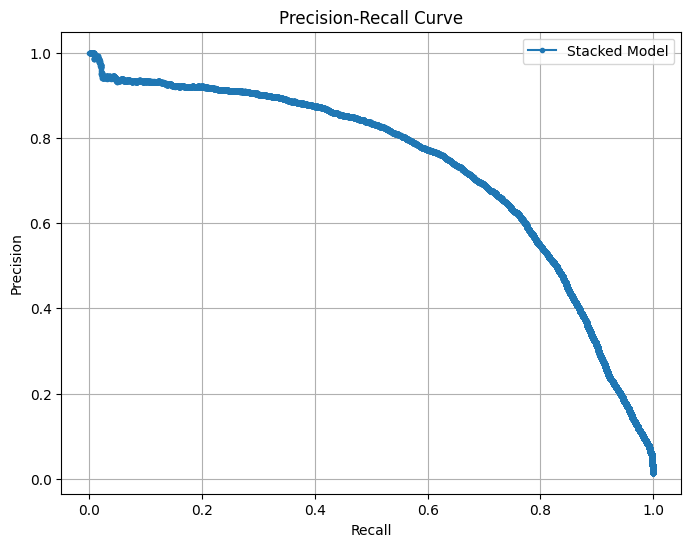

In [ ]:
# ---------------------- B∆∞·ªõc 3: Threshold Tuning ----------------------
def find_best_threshold(y_true, probs, beta=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

val_probs = meta_model.predict_proba(meta_X_val)[:, 1]
test_probs = meta_model.predict_proba(meta_X_test)[:, 1]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=0.5)

# Save threshold
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"{SAVE_DIR}/threshold.json", 'w') as f:
    json.dump(threshold_info, f)

print(f"‚úÖ Best threshold selected: {best_threshold:.4f} with F0.5: {best_fbeta:.4f}")

# ---------------------- B∆∞·ªõc 4: Evaluation ----------------------
y_test_pred = (test_probs >= best_threshold).astype(int)

print("\nüìä Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_test_pred))

print("\nüìÑ Classification Report on Test:")
print(classification_report(y_test, y_test_pred))

# V·∫Ω Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, test_probs)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Stacked Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()


üéØ AUC-ROC on Test Set: 0.9883


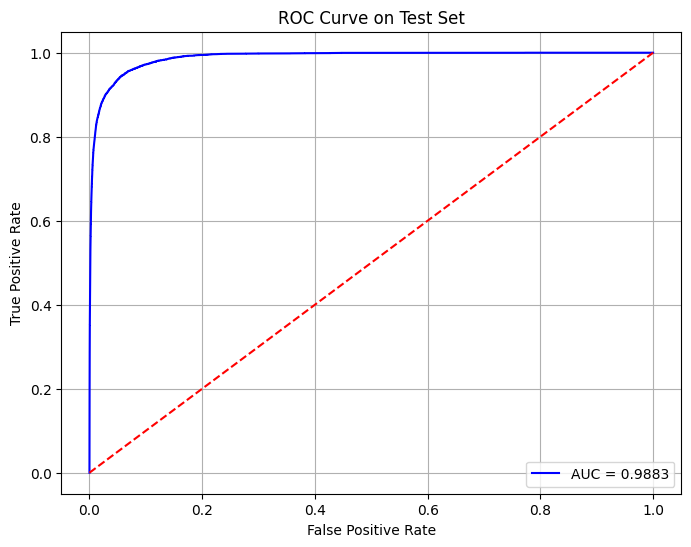

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ---------------------------------------
# T√≠nh AUC-ROC score tr√™n t·∫≠p Test
auc_score = roc_auc_score(y_test, test_probs)
print(f"üéØ AUC-ROC on Test Set: {auc_score:.4f}")

# ---------------------------------------
# V·∫Ω ƒë∆∞·ªùng ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # ƒê∆∞·ªùng ng·∫´u nhi√™n
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
X_resampled.shape

(103130, 9)

In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')

In [ ]:
pip install catboost


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 25.7 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import json
import joblib
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix


# T√°ch t·∫≠p train v√† validation t·ª´ X_resampled v√† y_resampled
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

In [ ]:
import joblib
import numpy as np

# Directory ch·ª©a c√°c model v√† scaler ƒë√£ l∆∞u
SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline'

# Load scaler cho lr v√† mlp
scaler_lr = joblib.load(f"{SAVE_DIR}/scaler_lr.pkl")

# Danh s√°ch base learner names ƒë√∫ng th·ª© t·ª± nh∆∞ khi train
base_learner_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp', 'lr']

# Kh·ªüi t·∫°o meta_X_val m·ªõi
meta_X_val = np.zeros((X_val.shape[0], len(base_learner_names)))

# Duy·ªát qua t·ª´ng base model v√† t√≠nh predict_proba
for idx, name in enumerate(base_learner_names):
    print(f"Loading base model: {name}")
    model = joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl")

    # N·∫øu l√† lr ho·∫∑c mlp th√¨ scale X_val tr∆∞·ªõc khi predict
    if name in ['lr', 'mlp']:
        X_val_transformed = scaler_lr.transform(X_val)
    else:
        X_val_transformed = X_val

    # Predict proba cho class 1
    meta_X_val[:, idx] = model.predict_proba(X_val_transformed)[:, 1]

print("meta_X_val rebuilt!")


Loading base model: catboost
Loading base model: lgbm
Loading base model: rf
Loading base model: et
Loading base model: mlp
Loading base model: lr
meta_X_val rebuilt!


In [ ]:
# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Predict l·∫°i x√°c su·∫•t t·ª´ meta model
val_probs = meta_model.predict_proba(meta_X_val)[:, 1]

# H√†m t√¨m threshold t·ªëi ∆∞u theo f-beta
def find_best_threshold(y_true, probs, beta=2):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

# T√≠nh threshold m·ªõi v·ªõi beta=2
best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=2)

# Save threshold m·ªõi ri√™ng file
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"{SAVE_DIR}/threshold_f2.json", 'w') as f:
    json.dump(threshold_info, f)

print(f"‚úÖ Threshold v·ªõi F2-score: {best_threshold:.4f} (F2 = {best_fbeta:.4f})")


‚úÖ Threshold v·ªõi F2-score: 0.2142 (F2 = 0.9394)


In [ ]:
X_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_test1.csv')
X_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_valid1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_test1.csv')
y_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_valid1.csv')

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import numpy as np
import json

# Load scaler
scaler_lr = joblib.load(f"{SAVE_DIR}/scaler_lr.pkl")

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Load threshold (ho·∫∑c t√≠nh l·∫°i n·∫øu mu·ªën)
with open(f"{SAVE_DIR}/threshold.json", 'r') as f:
    threshold_info = json.load(f)
best_threshold = threshold_info['best_threshold']

# Load base models
base_learner_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp', 'lr']
base_models = {name: joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl") for name in base_learner_names}

# T√≠nh meta_X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    if name in ['lr', 'mlp']:
        X_valid1_transformed = scaler_lr.transform(X_valid1)
    else:
        X_valid1_transformed = X_valid1
    meta_X_valid1[:, idx] = model.predict_proba(X_valid1_transformed)[:, 1]

# Predict proba v·ªõi meta model
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

# N·∫øu mu·ªën tune l·∫°i threshold v·ªõi beta=2 tr√™n X_valid1:
best_threshold, best_fbeta = find_best_threshold(y_valid1, valid1_probs, beta=2)
print(f"Best threshold (beta=2): {best_threshold:.4f}, F2-score: {best_fbeta:.4f}")

# Ph√¢n lo·∫°i theo threshold m·ªõi
valid1_preds = (valid1_probs >= best_threshold).astype(int)

# T√≠nh confusion matrix v√† classification report
cm = confusion_matrix(y_valid1, valid1_preds)
report = classification_report(y_valid1, valid1_preds, digits=4)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Best threshold (beta=2): 0.8212, F2-score: 0.7338
Confusion Matrix:
[[284403   3125]
 [   755   3387]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9974    0.9891    0.9932    287528
           1     0.5201    0.8177    0.6358      4142

    accuracy                         0.9867    291670
   macro avg     0.7587    0.9034    0.8145    291670
weighted avg     0.9906    0.9867    0.9881    291670



In [ ]:
import numpy as np
import joblib
import json
import time
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report)
from catboost import CatBoostClassifier

# Directory ch·ª©a model v√† scaler ƒë√£ l∆∞u
SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline'

# Load scaler
scaler_lr = joblib.load(f"{SAVE_DIR}/scaler_lr.pkl")

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Load threshold
with open(f"{SAVE_DIR}/threshold.json", 'r') as f:
    best_threshold = json.load(f)['best_threshold']

# Load base models
base_learner_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp', 'lr']
base_models = {name: joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl") for name in base_learner_names}

# Kh·ªüi t·∫°o meta_X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))

# ƒêo inference time to√†n b·ªô pipeline
start_time = time.time()

for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    X_valid1_transformed = scaler_lr.transform(X_valid1) if name in ['lr', 'mlp'] else X_valid1
    meta_X_valid1[:, idx] = model.predict_proba(X_valid1_transformed)[:, 1]

# Predict proba v·ªõi meta model
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.time() - start_time  # T·ªïng th·ªùi gian

# Predict v·ªõi threshold ƒë√£ l∆∞u
valid1_preds = (valid1_probs >= best_threshold).astype(int)

# T√≠nh metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# L∆∞u k·∫øt qu·∫£ metrics v√†o file JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open(f"/content/drive/MyDrive/Graduation5/results/ensemble3_valid1_recall.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In k·∫øt qu·∫£
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.7186810651465947,
    "ROC_AUC": 0.9880788495936342,
    "Precision": 0.49430753710909353,
    "Recall": 0.82810236600676,
    "F1_score": 0.6190777005685407,
    "Inference_time_sec": 4.404948949813843
}


In [ ]:
import numpy as np
import joblib
import json
import time
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score, roc_auc_score)
from catboost import CatBoostClassifier
from joblib import Parallel, delayed

# Directory ch·ª©a model v√† scaler ƒë√£ l∆∞u
SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline'

# Load scaler
scaler_lr = joblib.load(f"{SAVE_DIR}/scaler_lr.pkl")

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Load threshold
with open(f"{SAVE_DIR}/threshold.json", 'r') as f:
    best_threshold = json.load(f)['best_threshold']

# Load base models
base_learner_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp', 'lr']
base_models = {name: joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl") for name in base_learner_names}

# Chu·∫©n b·ªã d·ªØ li·ªáu
X_valid1_scaled = scaler_lr.transform(X_valid1)  # Ch·ªâ c·∫ßn transform 1 l·∫ßn cho lr & mlp
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learner_names)))

# ƒêo inference time ch√≠nh x√°c b·∫±ng perf_counter
start_time = time.perf_counter()

# Predict base models
for idx, name in enumerate(base_learner_names):
    model = base_models[name]
    X_input = X_valid1_scaled if name in ['lr', 'mlp'] else X_valid1
    meta_X_valid1[:, idx] = model.predict_proba(X_input)[:, 1]

# Predict meta model
valid1_probs = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.perf_counter() - start_time  # T·ªïng th·ªùi gian ch√≠nh x√°c

# Predict v·ªõi threshold ƒë√£ l∆∞u
valid1_preds = (valid1_probs >= best_threshold).astype(int)

# T√≠nh metrics
metrics = {
    "PR_AUC": average_precision_score(y_valid1, valid1_probs),
    "ROC_AUC": roc_auc_score(y_valid1, valid1_probs),
    "Precision": precision_score(y_valid1, valid1_preds),
    "Recall": recall_score(y_valid1, valid1_preds),
    "F1_score": f1_score(y_valid1, valid1_preds),
    "Inference_time_sec": inference_time
}

# L∆∞u k·∫øt qu·∫£
with open(f"/content/drive/MyDrive/Graduation5/results/ensemble3_valid1_recall.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In k·∫øt qu·∫£
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.7186810651465947,
    "ROC_AUC": 0.9880788495936342,
    "Precision": 0.49430753710909353,
    "Recall": 0.82810236600676,
    "F1_score": 0.6190777005685407,
    "Inference_time_sec": 4.635112369999661
}


# Load l·∫°i m√¥ h√¨nh

RandomForest

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best F1-score (macro): 0.9266
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Cross-Validation Metrics:
f1_macro: 0.9266
precision_macro: 0.9248
recall_macro: 0.9285
accuracy: 0.9357


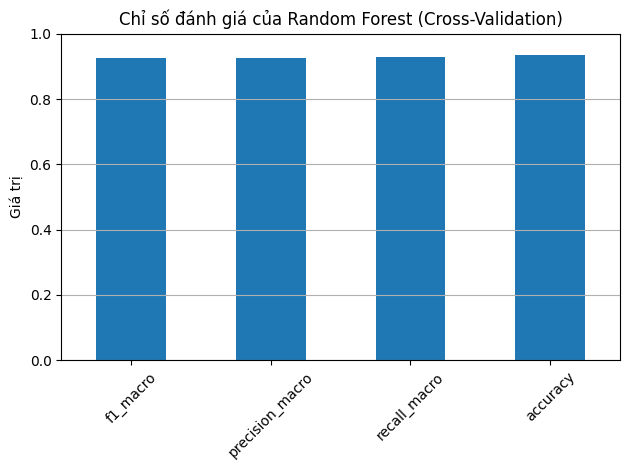

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, f1_score
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ƒê·ªãnh nghƒ©a m√¥ h√¨nh v√† si√™u tham s·ªë
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 2. Scorer F1 macro
f1_scorer = make_scorer(f1_score, average='macro')

# 3. Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring=f1_scorer, cv=cv, n_jobs=-1, verbose=2)

# 5. Train
grid_search.fit(X_resampled, y_resampled)

# 6. L∆∞u m√¥ h√¨nh t·ªët nh·∫•t v√† tham s·ªë t·ªët nh·∫•t
best_rf_model = grid_search.best_estimator_
joblib.dump(best_rf_model, '/content/drive/MyDrive/Graduation5/best_random_forest_model.pkl')
best_rf_params = grid_search.best_params_
import json

# L∆∞u tham s·ªë t·ªët nh·∫•t
with open('/content/drive/MyDrive/Graduation5/best_random_forest_params.json', 'w') as f:
    json.dump(best_rf_params, f)

print("Best F1-score (macro): {:.4f}".format(grid_search.best_score_))
print("Best params:", best_rf_params)

# 7. ƒê√°nh gi√° ƒëa ch·ªâ s·ªë b·∫±ng cross-validation v·ªõi m√¥ h√¨nh t·ªët nh·∫•t
scoring = {
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'accuracy': 'accuracy'
}

cv_results = cross_validate(best_rf_model, X_resampled, y_resampled,
                            cv=cv, scoring=scoring, n_jobs=-1)

# 8. Hi·ªÉn th·ªã k·∫øt qu·∫£ trung b√¨nh
metrics_summary = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring.keys()}
print("\nCross-Validation Metrics:")
for metric, score in metrics_summary.items():
    print(f"{metric}: {score:.4f}")

# 9. V·∫Ω bi·ªÉu ƒë·ªì c√°c ch·ªâ s·ªë
results_df = pd.DataFrame([metrics_summary])
results_df.index = ['Random Forest']

results_df.T.plot(kind='bar', legend=False)
plt.title('Ch·ªâ s·ªë ƒë√°nh gi√° c·ªßa Random Forest (Cross-Validation)')
plt.ylabel('Gi√° tr·ªã')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import json

# Copy y nguy√™n b·ªô tham s·ªë t·ª´ m√†n h√¨nh v√†o ƒë√¢y
best_xgb_params = {
    'colsample_bytree': 1.0,
    'gamma': 0,
    'learning_rate': 0.1,
    'max_depth': 8,
    'min_child_weight': 1,
    'n_estimators': 200,
    'scale_pos_weight': 1,
    'subsample': 0.9
}

# L∆∞u v√†o file JSON
with open('/content/drive/MyDrive/Graduation5/tuned_xgboost_params.json', 'w') as f:
    json.dump(best_xgb_params, f)

print("‚úÖ Tham s·ªë t·ªët nh·∫•t ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o '/content/drive/MyDrive/Graduation5/tuned_xgboost_params.json'")


‚úÖ Tham s·ªë t·ªët nh·∫•t ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o '/content/drive/MyDrive/Graduation5/tuned_xgboost_params.json'


In [ ]:
import joblib
import json

# ƒê∆∞·ªùng d·∫´n t·ªõi m√¥ h√¨nh ƒë√£ l∆∞u
model_path = '/content/drive/MyDrive/Graduation4/lightgbm_model.pkl'

# Load m√¥ h√¨nh ƒë√£ l∆∞u
model = joblib.load(model_path)

# L·∫•y c√°c tham s·ªë c·ªßa m√¥ h√¨nh
model_params = model.get_params()

# ƒê∆∞·ªùng d·∫´n l∆∞u file JSON
output_json_path = '/content/drive/MyDrive/Graduation5/lightgbm_params.json'

# L∆∞u c√°c tham s·ªë v√†o file JSON
with open(output_json_path, 'w') as json_file:
    json.dump(model_params, json_file, indent=4)

print(f"Tham s·ªë c·ªßa m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o: {output_json_path}")


Tham s·ªë c·ªßa m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o: /content/drive/MyDrive/Graduation5/lightgbm_params.json


In [ ]:
!pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 25.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
import json

# ƒê∆∞·ªùng d·∫´n t·ªõi m√¥ h√¨nh CatBoost ƒë√£ l∆∞u
model_path = '/content/drive/MyDrive/Graduation4/best_catboost_optuna_gpu.cbm'

# Load m√¥ h√¨nh CatBoost t·ª´ file
model = CatBoostClassifier()
model.load_model(model_path)

# L·∫•y c√°c tham s·ªë c·ªßa m√¥ h√¨nh
model_params = model.get_params()

# ƒê∆∞·ªùng d·∫´n l∆∞u file JSON
output_json_path = '/content/drive/MyDrive/Graduation5/optuna_catboost_params.json'

# L∆∞u c√°c tham s·ªë v√†o file JSON
with open(output_json_path, 'w') as json_file:
    json.dump(model_params, json_file, indent=4)

print(f"Tham s·ªë c·ªßa m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o: {output_json_path}")


Tham s·ªë c·ªßa m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o: /content/drive/MyDrive/Graduation5/optuna_catboost_params.json


In [ ]:
import joblib
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import json
import os

# ƒê∆∞·ªùng d·∫´n t·ªõi c√°c m√¥ h√¨nh ƒë√£ l∆∞u
base_models_path = "/content/drive/MyDrive/Graduation4/base_models.pkl"
meta_model_path = "/content/drive/MyDrive/Graduation4/meta_model.cbm"

# T·∫£i c√°c m√¥ h√¨nh base (ensemble models) t·ª´ file pkl
base_models = joblib.load(base_models_path)

# T·∫£i m√¥ h√¨nh meta (meta model) t·ª´ file cbm
meta_model = CatBoostClassifier()
meta_model.load_model(meta_model_path)

# L·∫•y c√°c tham s·ªë c·ªßa m√¥ h√¨nh base
base_models_params = {name: model.get_params() for name, model in base_models.items()}

# L·∫•y c√°c tham s·ªë c·ªßa m√¥ h√¨nh meta
meta_model_params = meta_model.get_params()

# T·∫°o m·ªôt dictionary ƒë·ªÉ l∆∞u c√°c tham s·ªë
models_params = {
    "base_models": base_models_params,
    "meta_model": meta_model_params
}

# ƒê∆∞·ªùng d·∫´n l∆∞u file JSON
output_json_path = "/content/drive/MyDrive/Graduation5/ensemble_models_params_1.json"

# L∆∞u c√°c tham s·ªë v√†o file JSON
with open(output_json_path, 'w') as json_file:
    json.dump(models_params, json_file, indent=4)

print(f"Tham s·ªë c·ªßa c√°c m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o: {output_json_path}")


Tham s·ªë c·ªßa c√°c m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o: /content/drive/MyDrive/Graduation5/ensemble_models_params_1.json


In [ ]:
import joblib
import json
import os

# Th∆∞ m·ª•c l∆∞u model
model_dir = "/content/drive/MyDrive/Graduation4/ModelStackL2/"

# Danh s√°ch c√°c model ƒë√£ l∆∞u
model_names = ["catboost", "lightgbm", "xgboost", "random_forest", "meta_model"]

# T·∫°o dict l∆∞u tham s·ªë c√°c model
model_params = {}

# Load t·ª´ng model v√† l·∫•y tham s·ªë
for name in model_names:
    model_path = os.path.join(model_dir, f"{name}.pkl")
    model = joblib.load(model_path)

    # CatBoost c√≥ get_all_params(), c√°c model scikit-learn d√πng get_params()
    if name == "catboost":
        params = model.get_all_params()
    else:
        params = model.get_params()

    model_params[name] = params

# L∆∞u tham s·ªë v√†o file JSON
output_path = "/content/drive/MyDrive/Graduation5/ensemble_model_params_2.json"
with open(output_path, "w") as json_file:
    json.dump(model_params, json_file, indent=4)

print(f"‚úÖ ƒê√£ l∆∞u tham s·ªë c√°c model v√†o {output_path}")


‚úÖ ƒê√£ l∆∞u tham s·ªë c√°c model v√†o /content/drive/MyDrive/Graduation5/ensemble_model_params_2.json


In [ ]:
import joblib
import json
import os
from catboost import CatBoostClassifier

# ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c l∆∞u model ƒë√£ train
SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline'
OUTPUT_DIR = '/content/drive/MyDrive/Graduation5'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Danh s√°ch t√™n base learners v√† meta model
base_model_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp', 'lr']

# T·∫°o dict l∆∞u tham s·ªë c√°c model
model_params = {}

# Load c√°c base model
for name in base_model_names:
    model_path = os.path.join(SAVE_DIR, f"{name}_base_model.pkl")
    model = joblib.load(model_path)
    params = model.get_params()
    model_params[f"{name}_base_model"] = params

# Load scaler
scaler_path = os.path.join(SAVE_DIR, "scaler_lr.pkl")
scaler = joblib.load(scaler_path)
scaler_params = scaler.get_params()
model_params["scaler_lr"] = scaler_params

# Load meta model (CatBoost)
meta_model_path = os.path.join(SAVE_DIR, "meta_model.cbm")
meta_model = CatBoostClassifier()
meta_model.load_model(meta_model_path)
meta_params = meta_model.get_all_params()
model_params["meta_model"] = meta_params

# L∆∞u v√†o file JSON
output_path = os.path.join(OUTPUT_DIR, "ensemble_fullpipeline_params.json")
with open(output_path, "w") as json_file:
    json.dump(model_params, json_file, indent=4)

print(f"‚úÖ ƒê√£ l∆∞u tham s·ªë t·∫•t c·∫£ models v√† scaler v√†o {output_path}")


‚úÖ ƒê√£ l∆∞u tham s·ªë t·∫•t c·∫£ models v√† scaler v√†o /content/drive/MyDrive/Graduation5/ensemble_fullpipeline_params.json


In [ ]:
# ƒê·ªçc v√† hi·ªÉn th·ªã v√†i d√≤ng ƒë·∫ßu ti√™n c·ªßa file JSON
with open(output_path, "r") as json_file:
    params_data = json.load(json_file)

# In th·ª≠ 3 model ƒë·∫ßu ti√™n v√† scaler
for key in list(params_data.keys())[:4]:  # l·∫•y 4 ph·∫ßn t·ª≠ ƒë·∫ßu (3 models + scaler)
    print(f"\nüî∏ {key}:")
    for param_name, param_value in list(params_data[key].items())[:5]:  # in 5 tham s·ªë ƒë·∫ßu ti√™n m·ªói model
        print(f"  - {param_name}: {param_value}")



üî∏ catboost_base_model:
  - iterations: 300
  - learning_rate: 0.1
  - depth: 8
  - verbose: 0
  - random_state: 42

üî∏ lgbm_base_model:
  - boosting_type: gbdt
  - class_weight: None
  - colsample_bytree: 1.0
  - importance_type: split
  - learning_rate: 0.1

üî∏ rf_base_model:
  - bootstrap: True
  - ccp_alpha: 0.0
  - class_weight: None
  - criterion: gini
  - max_depth: 10

üî∏ et_base_model:
  - bootstrap: False
  - ccp_alpha: 0.0
  - class_weight: None
  - criterion: gini
  - max_depth: 12


In [ ]:
print("\nüî∏ scaler_lr:")
for param_name, param_value in params_data["scaler_lr"].items():
    print(f"  - {param_name}: {param_value}")



üî∏ scaler_lr:
  - copy: True
  - with_mean: True
  - with_std: True


# ƒê√°nh gi√° m√¥ h√¨nh

In [ ]:
!pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 25.0 MB/s eta 0:00:00


In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def load_params(path):
    with open(path, 'r') as f:
        return json.load(f)


In [ ]:
dt_params = load_params('/content/drive/MyDrive/Graduation5/best_decision_tree_params.json')
dt_model = DecisionTreeClassifier(**dt_params, random_state=42)


In [ ]:
del dt_model

In [ ]:
rf_params = load_params('/content/drive/MyDrive/Graduation5/best_random_forest_params.json')
xgb_params = load_params('/content/drive/MyDrive/Graduation5/tuned_xgboost_params.json')
lgb_params = load_params('/content/drive/MyDrive/Graduation5/lightgbm_params.json')
cat_params = load_params('/content/drive/MyDrive/Graduation5/catboost_params.json')
optuna_cat_params = load_params('/content/drive/MyDrive/Graduation5/optuna_catboost_params.json')

In [ ]:
model_dt = DecisionTreeClassifier(**dt_params)
model_rf = RandomForestClassifier(**rf_params)
model_xgb = XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='mlogloss')
model_lgb = LGBMClassifier(**lgb_params)
model_cat = CatBoostClassifier(**cat_params)
model_optuna_cat = CatBoostClassifier(**optuna_cat_params)


In [ ]:
def build_ensemble1(param_path):
    import json
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier
    from lightgbm import LGBMClassifier
    from xgboost import XGBClassifier
    from catboost import CatBoostClassifier
    from catboost import Pool
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import StackingClassifier

    # ƒê·ªçc file JSON ƒë·ªÉ l·∫•y tham s·ªë
    with open(param_path, 'r') as f:
        params = json.load(f)

    # H√†m l√†m s·∫°ch tham s·ªë, lo·∫°i b·ªè c√°c gi√° tr·ªã None ho·∫∑c NaN
    def clean_params(p):
        return {k: v for k, v in p.items() if v is not None and not (isinstance(v, float) and np.isnan(v))}

    # Tham s·ªë cho c√°c base models
    base_models = [
        ('catboost', CatBoostClassifier(**clean_params(params['base_models']['catboost']))),
        ('lgbm', LGBMClassifier(**clean_params(params['base_models']['lgbm']))),
        ('rf', RandomForestClassifier(**clean_params(params['base_models']['rf']))),
        ('xgb', XGBClassifier(**clean_params(params['base_models']['xgb'])))
    ]

    # Tham s·ªë cho meta model
    meta_model = CatBoostClassifier(**clean_params(params['meta_model']))

    # T·∫°o StackingClassifier v·ªõi c√°c base models v√† meta model
    ensemble = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=False,
        cv=5,
        n_jobs=-1
    )

    return ensemble


In [ ]:
def build_ensemble2(param_path):
    import json
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier
    from lightgbm import LGBMClassifier
    from xgboost import XGBClassifier
    from catboost import CatBoostClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import StackingClassifier

    # ƒê·ªçc file JSON ƒë·ªÉ l·∫•y tham s·ªë
    with open(param_path, 'r') as f:
        params = json.load(f)

    # H√†m l√†m s·∫°ch tham s·ªë, lo·∫°i b·ªè c√°c gi√° tr·ªã None ho·∫∑c NaN v√† c√°c tham s·ªë kh√¥ng h·ª£p l·ªá
    def clean_params(p):
        p = {k: v for k, v in p.items() if v is not None and not (isinstance(v, float) and np.isnan(v))}
        # Lo·∫°i b·ªè c√°c tham s·ªë kh√¥ng h·ª£p l·ªá v·ªõi CatBoost
        invalid_params = [
            'bayesian_matrix_reg', 'force_unit_auto_pair_weights', 'pool_metainfo_options'
        ]
        for param in invalid_params:
            if param in p:
                del p[param]
        return p

    # Tham s·ªë cho c√°c base models
    base_models = [
        ('catboost', CatBoostClassifier(**clean_params(params['catboost']))),
        ('lgbm', LGBMClassifier(**clean_params(params['lightgbm']))),
        ('rf', RandomForestClassifier(**clean_params(params['random_forest']))),
        ('xgb', XGBClassifier(**clean_params(params['xgboost'])))
    ]

    # Tham s·ªë cho meta model
    meta_model = LogisticRegression(**clean_params(params['meta_model']))

    # T·∫°o StackingClassifier v·ªõi c√°c base models v√† meta model
    ensemble = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=False,
        cv=5,
        n_jobs=-1
    )

    return ensemble


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def build_ensemble3(param_path):
    import json
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from lightgbm import LGBMClassifier
    from catboost import CatBoostClassifier

    # === Load params ===
    with open(param_path, 'r') as f:
        params = json.load(f)

    # === Helpers ===
    def clean_params(p):
        return {k: v for k, v in p.items() if v is not None and not (isinstance(v, float) and np.isnan(v))}

    def clean_catboost_params(p):
        invalid_keys = {
            'bayesian_matrix_reg', 'pool_metainfo_options', 'class_names',
            'posterior_sampling', 'best_model_min_trees', 'model_size_reg',
            'model_shrink_rate', 'score_function', 'force_unit_auto_pair_weights',
            'classes_count', 'sparse_features_conflict_fraction', 'eval_fraction',
            'max_leaves', 'penalties_coefficient'
        }
        return {k: v for k, v in p.items() if k not in invalid_keys}

    # === Base models ===
    base_models = [
        ('cat', CatBoostClassifier(**clean_params(params['catboost_base_model']))),
        ('lgb', LGBMClassifier(**clean_params(params['lgbm_base_model']))),
        ('rf', RandomForestClassifier(**clean_params(params['rf_base_model']))),
        ('et', ExtraTreesClassifier(**clean_params(params['et_base_model']))),
        ('mlp', MLPClassifier(**clean_params(params['mlp_base_model']))),
        ('lr', Pipeline([
            ('scaler', StandardScaler(**params['scaler_lr'])),
            ('clf', LogisticRegression(**clean_params(params['lr_base_model'])))
        ]))
    ]

    # === Meta-model ===
    meta_model = CatBoostClassifier(**clean_catboost_params(params['meta_model']))

    # === Ensemble (StackingClassifier) ===
    ensemble = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=False,  # ho·∫∑c True n·∫øu b·∫°n mu·ªën ƒë∆∞a c·∫£ X g·ªëc v√†o meta
        cv=5,                # s·ªë fold trong qu√° tr√¨nh training meta-model
        n_jobs=-1
    )

    return ensemble


In [ ]:
model_dt = DecisionTreeClassifier(**dt_params)
model_rf = RandomForestClassifier(**rf_params)
model_xgb = XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='mlogloss')
model_lgb = LGBMClassifier(**lgb_params)
model_cat = CatBoostClassifier(**cat_params)
model_optuna_cat = CatBoostClassifier(**optuna_cat_params)

In [ ]:
models = {
    'DecisionTree': model_dt,
    'RandomForest': model_rf,
    'XGBoost': model_xgb,
    'LightGBM': model_lgb,
    'CatBoost': model_cat,
    'CatBoostOptuna':model_optuna_cat,
    'Ensemble1': build_ensemble1('/content/drive/MyDrive/Graduation5/ensemble_models_params_1.json'),
    'Ensemble2': build_ensemble2('/content/drive/MyDrive/Graduation5/ensemble_model_params_2.json'),
    'Ensemble3': build_ensemble3('/content/drive/MyDrive/Graduation5/ensemble_fullpipeline_params.json')
}


In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')

In [ ]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'neg_log_loss']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
import json

# V√≠ d·ª• cho m·ªôt model
def evaluate_model(name, model, X, y, cv, scoring):
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)
    result = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring}
    with open(f'/content/drive/MyDrive/Graduation5/results/{name}_cv_results.json', 'w') as f:
        json.dump(result, f)
    print(f"Done: {name}")

# G·ªçi t·ª´ng model m√† b·∫°n c·∫ßn (tu·ª≥ l√∫c n√†o r·∫£nh th√¨ ch·∫°y ti·∫øp)
evaluate_model('DecisionTree', model_dt, X_resampled, y_resampled, cv, scoring)


Done: DecisionTree


In [ ]:
evaluate_model('RandomForest', model_rf, X_resampled, y_resampled, cv, scoring)

Done: RandomForest


In [ ]:
evaluate_model('XGBoost', model_xgb, X_resampled, y_resampled, cv, scoring)

Done: XGBoost


In [ ]:
model_lgb = LGBMClassifier(
    boosting_type='gbdt',
    class_weight=None,
    colsample_bytree=0.8,
    importance_type='split',
    learning_rate=0.05,  # gi·ªØ nguy√™n ho·∫∑c th·ª≠ 0.1
    max_depth=7,
    min_child_samples=20,
    min_child_weight=0.001,
    min_split_gain=0.0,
    n_estimators=2000,  # th·ª≠ gi·∫£m s·ªë c√¢y
    n_jobs=1,  # th·ª≠ gi·∫£m n_jobs ƒë·ªÉ tr√°nh treo
    num_leaves=31,  # gi·∫£m s·ªë l√° ƒë·ªÉ tƒÉng t·ªëc
    objective='binary',
    random_state=42,
    reg_alpha=0.0,
    reg_lambda=0.0,
    subsample=0.8,
    subsample_for_bin=200000,
    subsample_freq=0
)


In [ ]:
evaluate_model('LightGBM', model_lgb, X_resampled, y_resampled, cv, scoring)

Done: LightGBM


In [ ]:
print(model_optuna_cat.get_params())


{'iterations': 300, 'learning_rate': 0.1625586596, 'depth': 9, 'l2_leaf_reg': 9.937420808, 'loss_function': 'Logloss', 'od_wait': 20, 'thread_count': 4, 'random_seed': 42, 'use_best_model': True, 'verbose': 0, 'class_weights': [1, 10], 'task_type': 'GPU', 'devices': '0'}


In [ ]:
!pip install --upgrade catboost
!pip install --upgrade scikit-learn


In [ ]:
model_cat.set_params(task_type='CPU')


In [ ]:
evaluate_model('CatBoost', model_cat, X_resampled, y_resampled, cv, scoring)

Done: CatBoost


V·ªõi cross-validation v·ªõi catboost b√™n tr√™n, ph·∫£i ƒë·ªïi task type v·ªÅ cpu; v√¨ d√πng gpu c√≥ v·∫ª b·ªã xung ƒë·ªôt t√†i nguy√™n, kh√¥ng ch·∫°y ƒë∆∞·ª£c

In [ ]:
def evaluate_model(name, model, X, y, cv, scoring):
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)
    result = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring}
    with open(f'/content/drive/MyDrive/Graduation5/results/{name}_cv_results.json', 'w') as f:
        json.dump(result, f)
    print(f"Done: {name}")

In [ ]:
# Inside your evaluate_model function
def evaluate_model1(name, model, X, y, cv, scoring):
    # ... other code ...

    # üéØ Modified cross_validate call:
    scores = cross_validate(
        model, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False,
        fit_params={'eval_set': [(X, y)]}  # üëà Add this to pass eval_set to CatBoost
    )

    result = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring}
    with open(f'/content/drive/MyDrive/Graduation5/results/{name}_cv_results.json', 'w') as f:
        json.dump(result, f)
    print(f"Done: {name}")

In [ ]:
model_optuna_cat.set_params(task_type='CPU')

In [ ]:
model_optuna_cat.set_params(use_best_model=False)


In [ ]:
evaluate_model('CatBoostOptuna', model_optuna_cat, X_resampled, y_resampled, cv, scoring)

Done: CatBoostOptuna


In [ ]:
def evaluate_model1(name, model, X, y, cv, scoring):
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=1, return_train_score=False)
    result = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring}
    with open(f'/content/drive/MyDrive/Graduation5/results/{name}_cv_results.json', 'w') as f:
        json.dump(result, f)
    print(f"Done: {name}")

In [ ]:
evaluate_model1('Ensemble1', build_ensemble1('/content/drive/MyDrive/Graduation5/ensemble_models_params_1.json'), X_resampled, y_resampled, cv, scoring)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Done: Ensemble1


n_jobs=-1 d√πng ƒëa lu·ªìng, nh∆∞ng b·∫£n th√¢n CatBoost, XGBoost, LightGBM c≈©ng d√πng ƒëa lu·ªìng ‚Üí oversubscription CPU (qu√° t·∫£i CPU). V√¨ v·∫≠y ph·∫£i vi·∫øt h√†m evaluate v·ªõi n_job = 1

In [ ]:
evaluate_model1('Ensemble2', build_ensemble2('/content/drive/MyDrive/Graduation5/ensemble_model_params_2.json'), X_resampled, y_resampled, cv, scoring)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Done: Ensemble2


In [ ]:
def evaluate_model2(name, model, X, y, cv, scoring):
    """
    Evaluates a model using cross-validation and saves the results.

    Modified to handle CatBoost's eval_set requirement.
    """

    # Modified cross_validate to accommodate CatBoost eval_set:
    scores = []
    for train_idx, val_idx in cv.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]  # Assuming X is a pandas DataFrame
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]  # Assuming y is a pandas Series

        # For CatBoost models, provide eval_set explicitly
        if isinstance(model, CatBoostClassifier):
            model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=0)
        else:
            model.fit(X_train, y_train)  # For other models

        fold_scores = {metric: scoring_func(model, X_val, y_val)
                       for metric, scoring_func in scoring.items()}
        scores.append(fold_scores)

    # Calculate average scores
    result = {metric: np.mean([fold_scores[metric] for fold_scores in scores])
              for metric in scoring}

    # Save results
    with open(f'/content/drive/MyDrive/Graduation5/results/{name}_cv_results.json', 'w') as f:
        json.dump(result, f)

    print(f"Done: {name}")

In [ ]:
model_optuna_cat.set_params(use_best_model=False)


In [ ]:
ensemble3 = build_ensemble3('/content/drive/MyDrive/Graduation5/ensemble_fullpipeline_params.json')

In [ ]:
print(ensemble3.get_params())


{'cv': 5, 'estimators': [('cat', <catboost.core.CatBoostClassifier object at 0x7c9c544f4d10>), ('lgb', LGBMClassifier(max_depth=8, n_estimators=300, random_state=42)), ('rf', RandomForestClassifier(max_depth=10, n_estimators=300, n_jobs=-1,
                       random_state=42)), ('et', ExtraTreesClassifier(max_depth=12, n_estimators=300, n_jobs=-1, random_state=42)), ('mlp', MLPClassifier(hidden_layer_sizes=[128, 64], max_iter=300, random_state=42)), ('lr', Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=300, random_state=42))]))], 'final_estimator__iterations': 500, 'final_estimator__learning_rate': 0.05000000075, 'final_estimator__depth': 8, 'final_estimator__l2_leaf_reg': 3, 'final_estimator__rsm': 1, 'final_estimator__loss_function': 'Logloss', 'final_estimator__border_count': 254, 'final_estimator__feature_border_type': 'GreedyLogSum', 'final_estimator__nan_mode': 'Min', 'final_estimator__leaf_estimation_iterations': 10, 'final_

In [ ]:
ensemble3.final_estimator.set_params(use_best_model=False) # Access final_estimator_ instead

G·∫∑p l·ªói 'list' object has no attribute 'items' L·ªói n√†y x·∫£y ra v√¨ bi·∫øn scoring b·∫°n truy·ªÅn v√†o h√†m evaluate_model2() l√† m·ªôt danh s√°ch (list) c√°c t√™n metric. C·∫ßn chuy·ªÉn scoring th√†nh 1 dictionary c√°c h√†m th·ªß c√¥ng

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

scoring = {
    'accuracy': lambda model, X, y: accuracy_score(y, model.predict(X)),
    'precision': lambda model, X, y: precision_score(y, model.predict(X), average='binary'),
    'recall': lambda model, X, y: recall_score(y, model.predict(X), average='binary'),
    'f1': lambda model, X, y: f1_score(y, model.predict(X), average='binary'),
    'roc_auc': lambda model, X, y: roc_auc_score(y, model.predict_proba(X)[:, 1]),
    'neg_log_loss': lambda model, X, y: -log_loss(y, model.predict_proba(X))
}


In [ ]:
evaluate_model2('Ensemble3',ensemble3, X_resampled, y_resampled, cv, scoring)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0:	learn: 0.6055530	total: 12ms	remaining: 5.99s
1:	learn: 0.5248910	total: 22.9ms	remaining: 5.7s
2:	learn: 0.4508020	total: 32.2ms	remaining: 5.33s
3:	learn: 0.3949837	total: 42ms	remaining: 5.21s
4:	learn: 0.3468702	total: 51.3ms	remaining: 5.08s
5:	learn: 0.3069767	total: 60.5ms	remaining: 4.98s
6:	learn: 0.2755555	total: 69.8ms	remaining: 4.92s
7:	learn: 0.2514073	total: 79.4ms	remaining: 4.88s
8:	learn: 0.2323768	total: 89ms	remaining: 4.85s
9:	learn: 0.2176768	total: 98.1ms	remaining: 4.8s
10:	learn: 0.2063857	total: 109ms	remaining: 4.84s
11:	learn: 0.1968326	total: 116ms	remaining: 4.72s
12:	learn: 0.1882199	total: 126ms	remaining: 4.74s
13:	learn: 0.1813967	total: 136ms	remaining: 4.71s
14:	learn: 0.1754775	total: 146ms	remaining: 4.72s
15:	learn: 0.1700423	total: 156ms	remaining: 4.72s
16:	learn: 0.1651338	total: 164ms	remaining: 4.66s
17:	learn: 0.1613368	total: 173ms	remaining: 4.63s
18:	learn: 0.1583594	total: 184ms	remaining: 4.66s
19:	learn: 0.1555600	total: 196ms	remai

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0:	learn: 0.6062808	total: 11.8ms	remaining: 5.88s
1:	learn: 0.5274572	total: 21.7ms	remaining: 5.41s
2:	learn: 0.4537616	total: 31.2ms	remaining: 5.18s
3:	learn: 0.4002785	total: 40.8ms	remaining: 5.06s
4:	learn: 0.3522554	total: 50ms	remaining: 4.95s
5:	learn: 0.3131337	total: 59.4ms	remaining: 4.89s
6:	learn: 0.2834026	total: 68.8ms	remaining: 4.84s
7:	learn: 0.2585984	total: 78.2ms	remaining: 4.81s
8:	learn: 0.2387575	total: 87.5ms	remaining: 4.77s
9:	learn: 0.2238280	total: 96.7ms	remaining: 4.74s
10:	learn: 0.2109030	total: 106ms	remaining: 4.72s
11:	learn: 0.2009388	total: 116ms	remaining: 4.72s
12:	learn: 0.1920182	total: 125ms	remaining: 4.7s
13:	learn: 0.1841535	total: 135ms	remaining: 4.69s
14:	learn: 0.1787514	total: 145ms	remaining: 4.68s
15:	learn: 0.1735525	total: 154ms	remaining: 4.67s
16:	learn: 0.1689827	total: 164ms	remaining: 4.65s
17:	learn: 0.1648914	total: 173ms	remaining: 4.64s
18:	learn: 0.1611747	total: 183ms	remaining: 4.63s
19:	learn: 0.1584134	total: 193ms	

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0:	learn: 0.5852995	total: 11.5ms	remaining: 5.75s
1:	learn: 0.5076793	total: 20.7ms	remaining: 5.16s
2:	learn: 0.4369955	total: 29.3ms	remaining: 4.85s
3:	learn: 0.3861004	total: 37.8ms	remaining: 4.69s
4:	learn: 0.3405295	total: 46.5ms	remaining: 4.6s
5:	learn: 0.3061824	total: 54.9ms	remaining: 4.52s
6:	learn: 0.2792657	total: 63.2ms	remaining: 4.45s
7:	learn: 0.2562734	total: 72ms	remaining: 4.43s
8:	learn: 0.2371847	total: 80.8ms	remaining: 4.41s
9:	learn: 0.2227452	total: 89.4ms	remaining: 4.38s
10:	learn: 0.2121133	total: 98.1ms	remaining: 4.36s
11:	learn: 0.2013114	total: 107ms	remaining: 4.35s
12:	learn: 0.1914352	total: 116ms	remaining: 4.33s
13:	learn: 0.1830524	total: 124ms	remaining: 4.31s
14:	learn: 0.1771416	total: 133ms	remaining: 4.29s
15:	learn: 0.1720924	total: 142ms	remaining: 4.3s
16:	learn: 0.1678383	total: 151ms	remaining: 4.29s
17:	learn: 0.1637132	total: 161ms	remaining: 4.31s
18:	learn: 0.1598882	total: 170ms	remaining: 4.29s
19:	learn: 0.1571367	total: 179ms	

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0:	learn: 0.5860953	total: 12.4ms	remaining: 6.21s
1:	learn: 0.5138604	total: 22.7ms	remaining: 5.66s
2:	learn: 0.4430452	total: 31.9ms	remaining: 5.28s
3:	learn: 0.3890511	total: 41.1ms	remaining: 5.1s
4:	learn: 0.3441289	total: 50.4ms	remaining: 4.99s
5:	learn: 0.3079009	total: 60.8ms	remaining: 5s
6:	learn: 0.2789195	total: 69.8ms	remaining: 4.92s
7:	learn: 0.2550220	total: 79.2ms	remaining: 4.87s
8:	learn: 0.2360356	total: 88.6ms	remaining: 4.83s
9:	learn: 0.2210990	total: 97.7ms	remaining: 4.79s
10:	learn: 0.2085552	total: 107ms	remaining: 4.76s
11:	learn: 0.1983273	total: 117ms	remaining: 4.77s
12:	learn: 0.1895232	total: 126ms	remaining: 4.74s
13:	learn: 0.1817477	total: 136ms	remaining: 4.71s
14:	learn: 0.1763974	total: 145ms	remaining: 4.68s
15:	learn: 0.1711324	total: 154ms	remaining: 4.67s
16:	learn: 0.1668595	total: 164ms	remaining: 4.65s
17:	learn: 0.1627188	total: 173ms	remaining: 4.64s
18:	learn: 0.1589969	total: 183ms	remaining: 4.62s
19:	learn: 0.1562282	total: 192ms	r

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0:	learn: 0.5849716	total: 12ms	remaining: 5.99s
1:	learn: 0.5072502	total: 22.1ms	remaining: 5.51s
2:	learn: 0.4383015	total: 31.4ms	remaining: 5.2s
3:	learn: 0.3839475	total: 40.4ms	remaining: 5.01s
4:	learn: 0.3389002	total: 49.7ms	remaining: 4.92s
5:	learn: 0.3036776	total: 58.9ms	remaining: 4.85s
6:	learn: 0.2762054	total: 68.2ms	remaining: 4.81s
7:	learn: 0.2533806	total: 77.5ms	remaining: 4.77s
8:	learn: 0.2344441	total: 86.8ms	remaining: 4.74s
9:	learn: 0.2208192	total: 96ms	remaining: 4.71s
10:	learn: 0.2075933	total: 105ms	remaining: 4.68s
11:	learn: 0.1977927	total: 115ms	remaining: 4.67s
12:	learn: 0.1892350	total: 126ms	remaining: 4.7s
13:	learn: 0.1814200	total: 135ms	remaining: 4.69s
14:	learn: 0.1759378	total: 145ms	remaining: 4.67s
15:	learn: 0.1710984	total: 155ms	remaining: 4.68s
16:	learn: 0.1666991	total: 164ms	remaining: 4.66s
17:	learn: 0.1627341	total: 174ms	remaining: 4.66s
18:	learn: 0.1594122	total: 183ms	remaining: 4.63s
19:	learn: 0.1567717	total: 194ms	rem

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


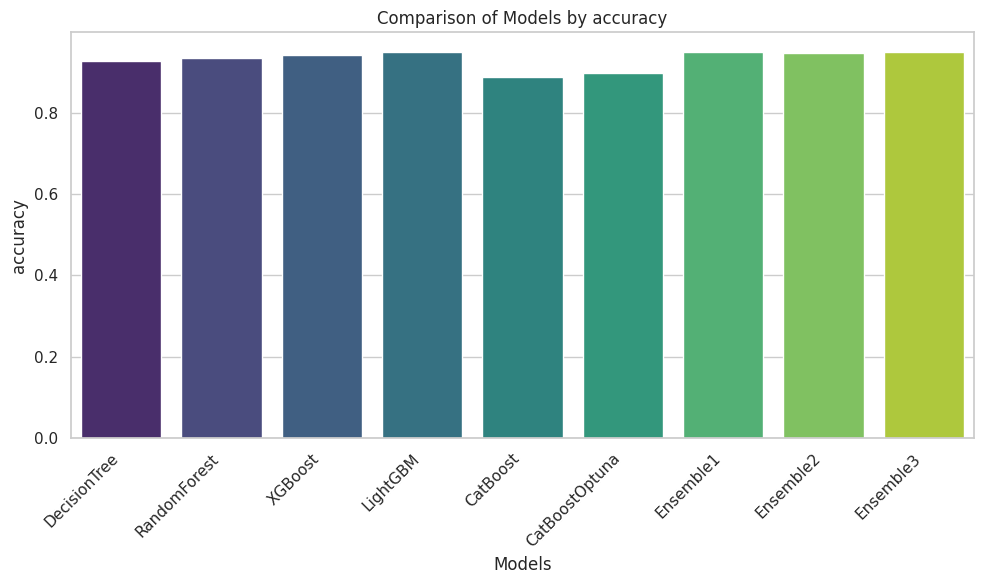

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


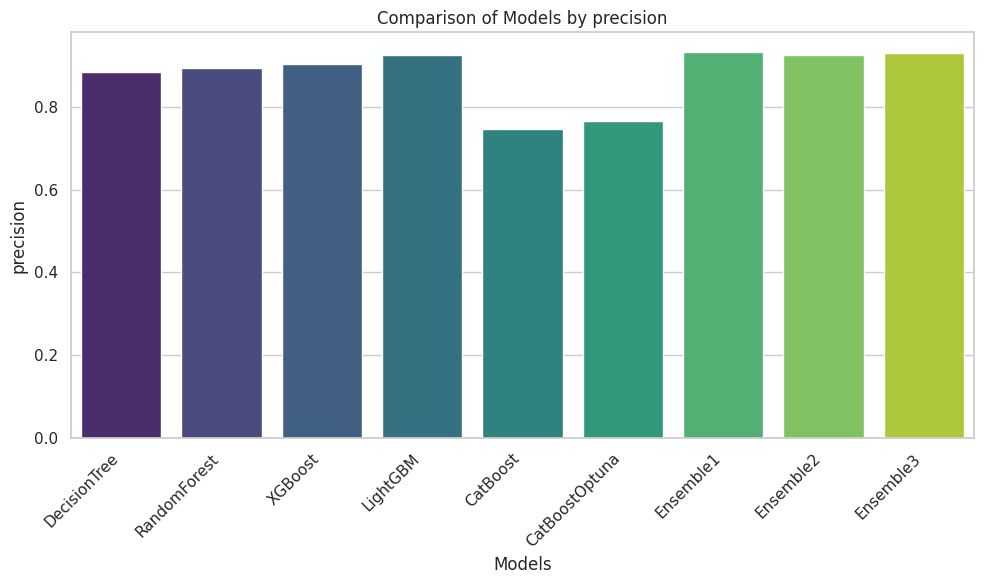

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


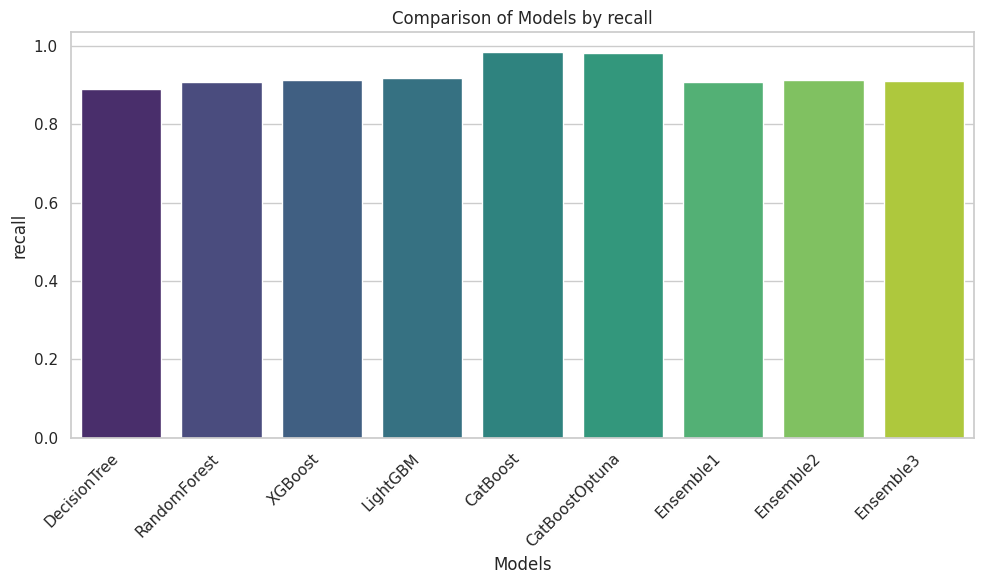

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


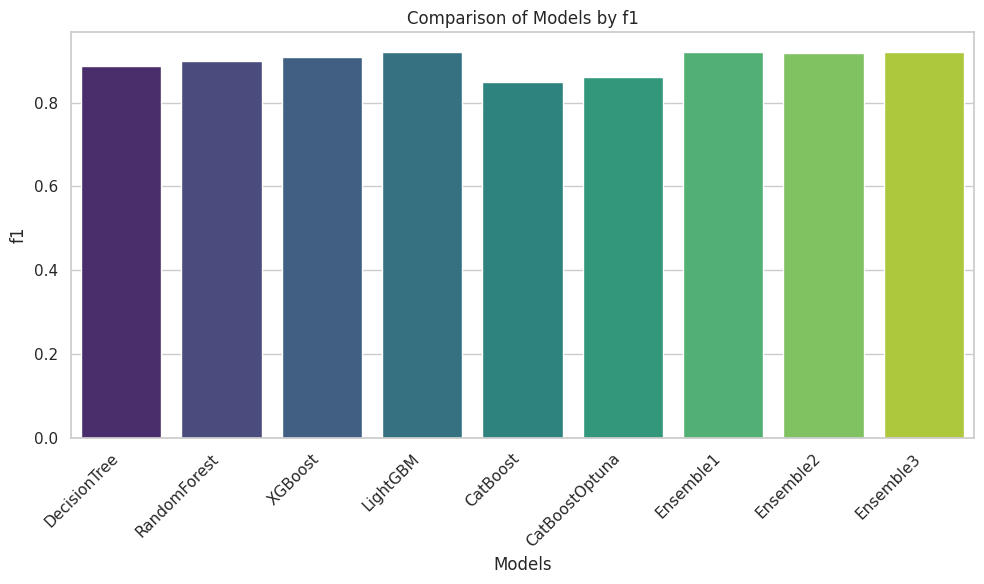

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


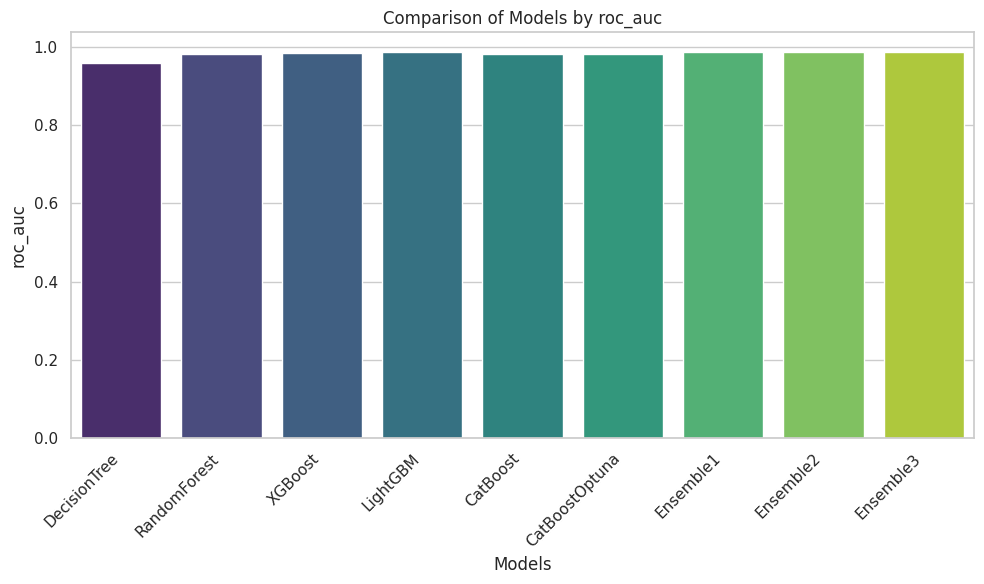

<ipython-input-79-cf01b8d1ea35>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results[metric], palette="viridis")


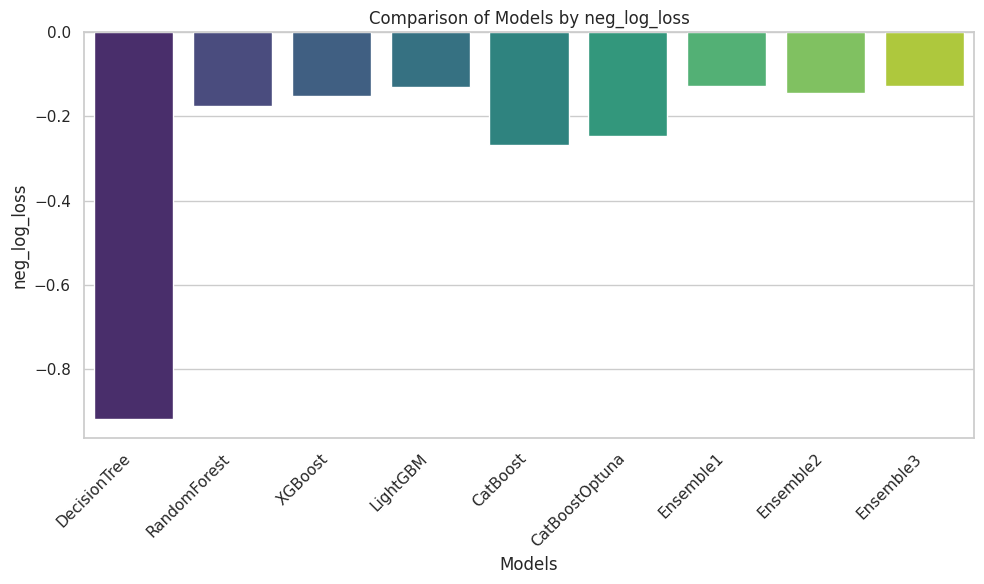

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c ch·ª©a c√°c file JSON
results_dir = '/content/drive/MyDrive/Graduation5/results'

# Danh s√°ch m√¥ h√¨nh
model_names = [
    'DecisionTree', 'RandomForest', 'XGBoost', 'LightGBM', 'CatBoost',
    'CatBoostOptuna', 'Ensemble1', 'Ensemble2', 'Ensemble3'
]

# Danh s√°ch ch·ªâ s·ªë ƒë√°nh gi√°
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'neg_log_loss']

# T·∫°o DataFrame ƒë·ªÉ l∆∞u k·∫øt qu·∫£
results = pd.DataFrame(columns=metrics, index=model_names)

# ƒê·ªçc t·ª´ng file JSON v√† c·∫≠p nh·∫≠t v√†o DataFrame
for model in model_names:
    file_path = os.path.join(results_dir, f'{model}_cv_results.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
        results.loc[model] = data

# ƒê·ªïi ki·ªÉu d·ªØ li·ªáu t·ª´ object ‚Üí float
results = results.astype(float)

# Thi·∫øt l·∫≠p ki·ªÉu bi·ªÉu ƒë·ªì ƒë·∫πp h∆°n
sns.set(style="whitegrid")

# V·∫Ω bi·ªÉu ƒë·ªì cho t·ª´ng metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=results.index, y=results[metric], palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Comparison of Models by {metric}")
    plt.ylabel(metric)
    plt.xlabel("Models")
    plt.tight_layout()
    plt.show()


In [ ]:
model_lgb.fit(X_resampled, y_resampled)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 33130, number of negative: 70000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 103130, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=7,
               n_estimators=2000, n_jobs=1, objective='binary', random_state=42,
               subsample=0.8)

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/Graduation4/X_test_fe.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Graduation4/y_test.csv')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

y_pred = model_lgb.predict(X_test)
y_proba = model_lgb.predict_proba(X_test)

results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, average='weighted'),
    "recall": recall_score(y_test, y_pred, average='weighted'),
    "f1": f1_score(y_test, y_pred, average='weighted'),
    "roc_auc": roc_auc_score(y_test['binary_label'], y_proba[:, 1], multi_class='ovr', average='weighted'), # Select the probabilities for the positive class (index 1)
    "neg_log_loss": -log_loss(y_test, y_proba)
}

# In k·∫øt qu·∫£
for k, v in results.items():
    print(f"{k}: {v:.4f}")

accuracy: 0.9687
precision: 0.9886
recall: 0.9687
f1: 0.9763
roc_auc: 0.9879
neg_log_loss: -0.0844


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

y_pred = model_lgb.predict(X_test)
y_proba = model_lgb.predict_proba(X_test)

results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, average='weighted'),
    "recall": recall_score(y_test, y_pred, average='weighted'),
    "f1": f1_score(y_test, y_pred, average='weighted'),
    "roc_auc": roc_auc_score(y_test, y_proba[:, 1]),
    "neg_log_loss": -log_loss(y_test, y_proba)
}

for k, v in results.items():
    print(f"{k}: {v:.4f}")


accuracy: 0.9687
precision: 0.9886
recall: 0.9687
f1: 0.9763
roc_auc: 0.9879
neg_log_loss: -0.0844


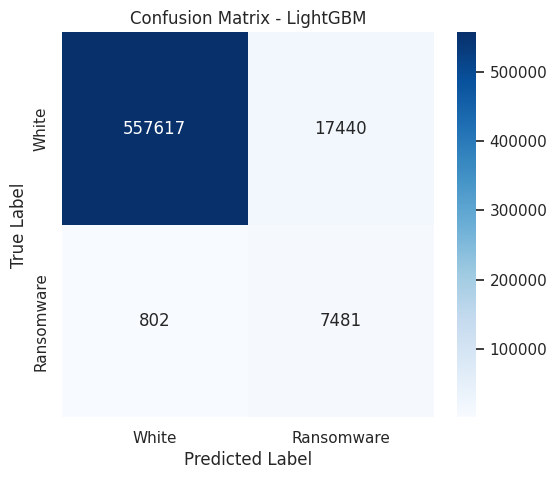

Classification Report:
              precision    recall  f1-score   support

       White       1.00      0.97      0.98    575057
  Ransomware       0.30      0.90      0.45      8283

    accuracy                           0.97    583340
   macro avg       0.65      0.94      0.72    583340
weighted avg       0.99      0.97      0.98    583340



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# D·ª± ƒëo√°n nh√£n
y_pred = model_lgb.predict(X_test)

# T√≠nh confusion matrix
cm = confusion_matrix(y_test, y_pred)

# V·∫Ω confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['White', 'Ransomware'], yticklabels=['White', 'Ransomware'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# In classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['White', 'Ransomware']))


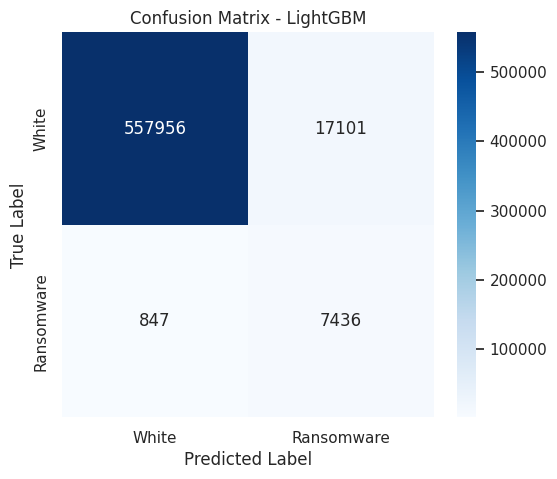

Classification Report:
              precision    recall  f1-score   support

       White       1.00      0.97      0.98    575057
  Ransomware       0.30      0.90      0.45      8283

    accuracy                           0.97    583340
   macro avg       0.65      0.93      0.72    583340
weighted avg       0.99      0.97      0.98    583340



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# D·ª± ƒëo√°n nh√£n
y_pred1 = ensemble3.predict(X_test)

# T√≠nh confusion matrix
cm = confusion_matrix(y_test, y_pred1)

# V·∫Ω confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['White', 'Ransomware'], yticklabels=['White', 'Ransomware'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# In classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['White', 'Ransomware']))


In [ ]:
from sklearn.model_selection import train_test_split

# Gi·∫£ s·ª≠ b·∫°n ƒëang c√≥ X_train, y_train ƒë√£ x·ª≠ l√Ω (resampled, chu·∫©n h√≥a,...)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
model_lgb.fit(X_train_split, y_train_split)
from sklearn.metrics import f1_score
import numpy as np

# D·ª± ƒëo√°n x√°c su·∫•t tr√™n validation set
y_val_proba = model_lgb.predict_proba(X_val_split)[:, 1]

# Th·ª≠ nhi·ªÅu ng∆∞·ª°ng kh√°c nhau
thresholds = np.arange(0.1, 0.91, 0.01)
best_thresh = 0.5
best_f1 = 0

for thresh in thresholds:
    preds = (y_val_proba >= thresh).astype(int)
    score = f1_score(y_val_split, preds, pos_label=1)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

print(f"Best threshold: {best_thresh:.2f}, F1-score: {best_f1:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26504, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 82504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321245 -> initscore=-0.748056
[LightGBM] [Info] Start training from score -0.748056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best threshold: 0.48, F1-score: 0.9208


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# D·ª± ƒëo√°n x√°c su·∫•t v√† ph√¢n lo·∫°i tr√™n t·∫≠p test
y_test_proba = ensemble3.predict_proba(X_test)[:, 1]
y_test_pred_thresh = (y_test_proba >= best_thresh).astype(int)

# Confusion matrix v√† classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred_thresh, target_names=["White", "Ransomware"]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_thresh))


Classification Report:
               precision    recall  f1-score   support

       White       1.00      0.97      0.98    575057
  Ransomware       0.29      0.90      0.44      8283

    accuracy                           0.97    583340
   macro avg       0.64      0.93      0.71    583340
weighted avg       0.99      0.97      0.98    583340


Confusion Matrix:
 [[556890  18167]
 [   816   7467]]


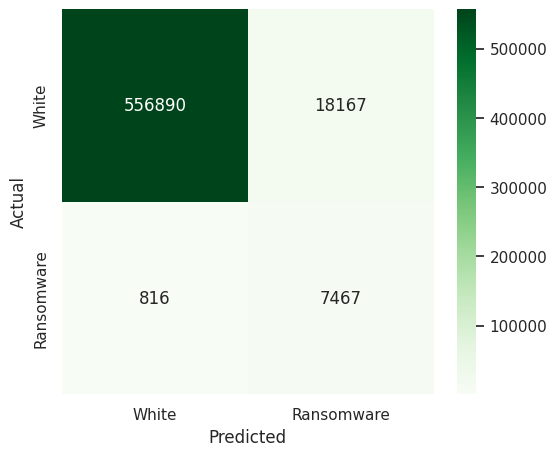

In [ ]:
# 6. Confusion Matrix
cm_e3 = confusion_matrix(y_test, y_test_pred_thresh)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_e3, annot=True, fmt='d', cmap='Greens', xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

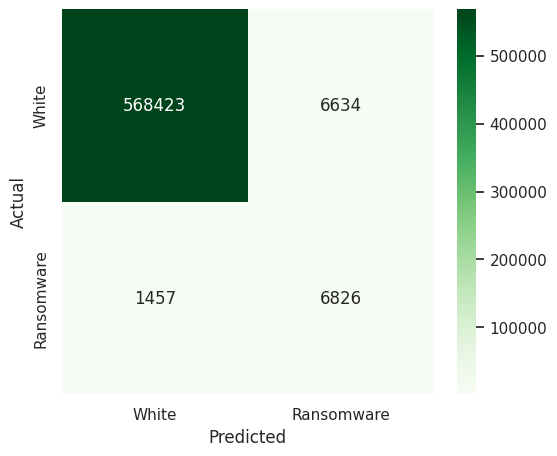

In [ ]:
cm_e31 = [[568423,   6634],
          [ 1457 ,  6826]]
plt.figure(figsize=(6, 5))
sns.heatmap(cm_e31, annot=True, fmt='d', cmap='Greens', xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

‚úÖ Best threshold with F0.5-score: 1.0000, F0.5-score: 0.3420

üìä Confusion Matrix on Test:
[[278706   8823]
 [   415   3726]]

üìÑ Classification Report on Test:
              precision    recall  f1-score   support

           0     0.9985    0.9693    0.9837    287529
           1     0.2969    0.8998    0.4465      4141

    accuracy                         0.9683    291670
   macro avg     0.6477    0.9345    0.7151    291670
weighted avg     0.9886    0.9683    0.9761    291670



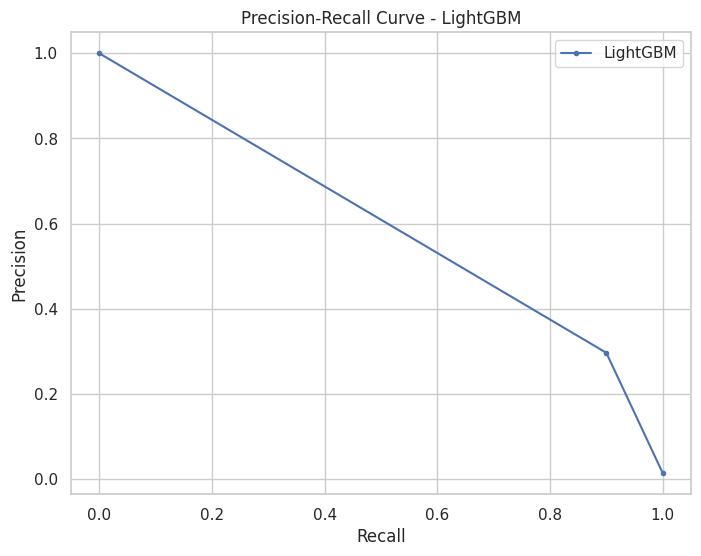

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_recall_curve, fbeta_score
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -------------------- B∆∞·ªõc 1: Load l·∫°i d·ªØ li·ªáu v√† m√¥ h√¨nh --------------------

import lightgbm as lgb
import joblib
import json


# Gi·∫£ s·ª≠ b·∫°n ƒë√£ c√≥ X v√† y (n·∫øu ch∆∞a, h√£y load l·∫°i)
# Chia l·∫°i t·∫≠p validation v√† test t·ª´ t·∫≠p test g·ªëc ban ƒë·∫ßu
X_val, X_test_final, y_val, y_test_final = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)

# -------------------- B∆∞·ªõc 2: Predict Probabilities --------------------

val_probs = model_lgb.predict(X_val)
test_probs = model_lgb.predict(X_test_final)

# -------------------- B∆∞·ªõc 3: Tuning Threshold --------------------

def find_best_threshold(y_true, probs, beta=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=0.5)

print(f"‚úÖ Best threshold with F0.5-score: {best_threshold:.4f}, F0.5-score: {best_fbeta:.4f}")

# -------------------- B∆∞·ªõc 4: Final Evaluation on Test Set --------------------

y_test_pred = (test_probs >= best_threshold).astype(int)

print("\nüìä Confusion Matrix on Test:")
print(confusion_matrix(y_test_final, y_test_pred))

print("\nüìÑ Classification Report on Test:")
print(classification_report(y_test_final, y_test_pred, digits=4))

# -------------------- B∆∞·ªõc 5: V·∫Ω Precision-Recall Curve --------------------

precision, recall, _ = precision_recall_curve(y_test_final, test_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='LightGBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - LightGBM')
plt.grid(True)
plt.legend()
plt.show()


# Ensemble 4

In [ ]:
X_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/X_resampled_tree.csv')
y_resampled = pd.read_csv('/content/drive/MyDrive/Graduation4/y_resampled_tree.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Graduation4/X_test_fe.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Graduation4/y_test.csv')

In [ ]:
pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 25.2 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import json
import joblib
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

# T√°ch t·∫≠p train v√† validation
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'
os.makedirs(SAVE_DIR, exist_ok=True)

# C·ªôt d√†nh cho MLP scaling
mlp_features = ['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']
scaler_mlp = RobustScaler()

# Tune hyperparameters cho MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(128, 64), (256, 128)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [300]
}

mlp_grid = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid=mlp_param_grid,
    cv=3,
    scoring='average_precision',
    n_jobs=-1
)
mlp_grid.fit(scaler_mlp.fit_transform(X_train[mlp_features]), y_train)

best_mlp = mlp_grid.best_estimator_

base_learners = {
    'catboost': CatBoostClassifier(iterations=300, depth=8, learning_rate=0.1, random_state=42, verbose=0),
    'lgbm': LGBMClassifier(n_estimators=300, max_depth=8, learning_rate=0.1, random_state=42),
    'rf': RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1),
    'et': ExtraTreesClassifier(n_estimators=300, max_depth=12, random_state=42, n_jobs=-1),
    'mlp': best_mlp
}

meta_model = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.05, random_state=42, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

meta_X_train = np.zeros((X_train.shape[0], len(base_learners)))
meta_X_val = np.zeros((X_val.shape[0], len(base_learners)))
meta_X_test = np.zeros((X_test.shape[0], len(base_learners)))

base_models_fitted = {}

# ---------------------- Base Models Training ----------------------
for idx, (name, model) in enumerate(base_learners.items()):
    print(f"Training base learner: {name}")

    oof_train = np.zeros(X_train.shape[0])
    oof_val = np.zeros(X_val.shape[0])
    oof_test = np.zeros(X_test.shape[0])

    for train_idx, valid_idx in kfold.split(X_train, y_train):
        X_tr, X_va = X_train.iloc[train_idx].reset_index(drop=True), X_train.iloc[valid_idx].reset_index(drop=True)
        y_tr, y_va = y_train.iloc[train_idx].reset_index(drop=True), y_train.iloc[valid_idx].reset_index(drop=True)

        y_tr = y_tr.values.ravel()
        y_va = y_va.values.ravel()

        model_clone = clone(model)

        if name == 'mlp':
            scaler_mlp_fold = RobustScaler()
            X_tr_scaled = scaler_mlp_fold.fit_transform(X_tr[mlp_features])
            X_va_scaled = scaler_mlp_fold.transform(X_va[mlp_features])
            model_clone.fit(X_tr_scaled, y_tr)

            oof_train[valid_idx] = model_clone.predict_proba(X_va_scaled)[:, 1]
            oof_val += model_clone.predict_proba(scaler_mlp.transform(X_val[mlp_features]))[:, 1] / kfold.n_splits
            oof_test += model_clone.predict_proba(scaler_mlp.transform(X_test[mlp_features]))[:, 1] / kfold.n_splits
        else:
            model_clone.fit(X_tr, y_tr)
            oof_train[valid_idx] = model_clone.predict_proba(X_va)[:, 1]
            oof_val += model_clone.predict_proba(X_val)[:, 1] / kfold.n_splits
            oof_test += model_clone.predict_proba(X_test)[:, 1] / kfold.n_splits

    meta_X_train[:, idx] = oof_train
    meta_X_val[:, idx] = oof_val
    meta_X_test[:, idx] = oof_test

    joblib.dump(model_clone, f"{SAVE_DIR}/{name}_base_model.pkl")

# L∆∞u scaler c·ªßa MLP
joblib.dump(scaler_mlp, f"{SAVE_DIR}/scaler_mlp.pkl")

print("Base models and MLP scaler saved!")

# ---------------------- Meta Model Training ----------------------
print("Training Meta Model (CatBoost)")
train_pool = Pool(meta_X_train, y_train)
val_pool = Pool(meta_X_val, y_val)

meta_model.fit(train_pool, eval_set=val_pool)
meta_model.save_model(f"{SAVE_DIR}/meta_model.cbm")

print("Meta model saved!")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training base learner: catboost
Training base learner: lgbm
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 66003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321243 -> initscore=-0.748065
[LightGBM] [Info] Start training from score -0.748065
[LightGBM] [Info] Number of positive: 21203, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train

In [ ]:
# T√°ch t·∫≠p train v√† validation
X_valid1, X_test1, y_valid1, y_test1 = train_test_split(
    X_test, y_test, test_size=0.5, stratify=y_test, random_state=42
)

In [ ]:
X_valid1.to_csv('/content/drive/MyDrive/Graduation4/dataset/X_valid1.csv', index=False)
X_test1.to_csv('/content/drive/MyDrive/Graduation4/dataset/X_test1.csv', index=False)
y_valid1.to_csv('/content/drive/MyDrive/Graduation4/dataset/y_valid1.csv', index=False)
y_test1.to_csv('/content/drive/MyDrive/Graduation4/dataset/y_test1.csv', index=False)


In [ ]:
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learners)))

In [ ]:
for idx, model in enumerate(base_learners):
    meta_X_valid1[:, idx] = meta_model.predict_proba(X_valid1)[:, 1]

In [ ]:
del meta_X_valid1

‚úÖ Best threshold selected: 0.8027 with F0.5: 0.9387

üìä Confusion Matrix on Test:
[[568548   6509]
 [  1498   6785]]

üìÑ Classification Report on Test:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    575057
           1       0.51      0.82      0.63      8283

    accuracy                           0.99    583340
   macro avg       0.75      0.90      0.81    583340
weighted avg       0.99      0.99      0.99    583340



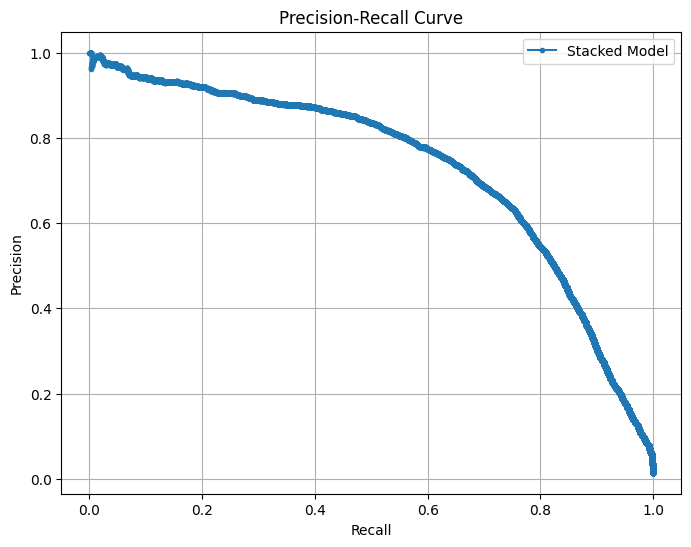

In [ ]:
# ---------------------- B∆∞·ªõc 3: Threshold Tuning ----------------------
def find_best_threshold(y_true, probs, beta=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)
    best_idx = np.argmax(fbeta_scores)
    return thresholds[best_idx], fbeta_scores[best_idx]

val_probs = meta_model.predict_proba(meta_X_val)[:, 1]
test_probs = meta_model.predict_proba(meta_X_test)[:, 1]

best_threshold, best_fbeta = find_best_threshold(y_val, val_probs, beta=0.5)

# Save threshold
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"{SAVE_DIR}/threshold.json", 'w') as f:
    json.dump(threshold_info, f)

print(f"‚úÖ Best threshold selected: {best_threshold:.4f} with F0.5: {best_fbeta:.4f}")

# ---------------------- B∆∞·ªõc 4: Evaluation ----------------------
y_test_pred = (test_probs >= best_threshold).astype(int)

print("\nüìä Confusion Matrix on Test:")
print(confusion_matrix(y_test, y_test_pred))

print("\nüìÑ Classification Report on Test:")
print(classification_report(y_test, y_test_pred))

# V·∫Ω Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, test_probs)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Stacked Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import fbeta_score, precision_recall_curve, classification_report, confusion_matrix

# Kh·ªüi t·∫°o meta_X_valid1
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learners)))

# Load l·∫°i t·ª´ng base model v√† predict cho X_valid1
for idx, name in enumerate(base_learners):
    model_path = f"{SAVE_DIR}/{name}_base_model.pkl"
    model_loaded = joblib.load(model_path)

    if name == 'mlp':
        # Load l·∫°i scaler cho MLP
        scaler_mlp = joblib.load(f"{SAVE_DIR}/scaler_mlp.pkl")
        X_valid1_scaled = scaler_mlp.transform(X_valid1[mlp_features])
        meta_X_valid1[:, idx] = model_loaded.predict_proba(X_valid1_scaled)[:, 1]
    else:
        meta_X_valid1[:, idx] = model_loaded.predict_proba(X_valid1)[:, 1]

print("meta_X_valid1 shape:", meta_X_valid1.shape)

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Predict x√°c su·∫•t b·∫±ng meta model
y_valid1_proba = meta_model.predict_proba(meta_X_valid1)[:, 1]

# Tune threshold v·ªõi beta = 0.5
precision, recall, thresholds = precision_recall_curve(y_valid1, y_valid1_proba)
beta = 0.5
fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-10)

# T√¨m threshold t·ªët nh·∫•t theo F-beta
best_idx = np.argmax(fbeta_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold for F-{beta}: {best_threshold:.4f}")
print(f"Best F-{beta} score: {fbeta_scores[best_idx]:.4f}")

# Predict nh√£n cu·ªëi c√πng theo threshold
y_valid1_pred = (y_valid1_proba >= best_threshold).astype(int)

# ƒê√°nh gi√° k·∫øt qu·∫£
print("Classification Report:")
print(classification_report(y_valid1, y_valid1_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_valid1, y_valid1_pred))


meta_X_valid1 shape: (291670, 5)
Best threshold for F-0.5: 0.9746
Best F-0.5 score: 0.7274
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    287528
           1       0.79      0.56      0.65      4142

    accuracy                           0.99    291670
   macro avg       0.89      0.78      0.82    291670
weighted avg       0.99      0.99      0.99    291670

Confusion Matrix:
[[286899    629]
 [  1825   2317]]


In [ ]:
# Tune threshold v·ªõi beta = 2
precision, recall, thresholds = precision_recall_curve(y_valid1, y_valid1_proba)
beta = 2
fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-10)

# T√¨m threshold t·ªët nh·∫•t theo F-beta
best_idx = np.argmax(fbeta_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold for F-{beta}: {best_threshold:.4f}")
print(f"Best F-{beta} score: {fbeta_scores[best_idx]:.4f}")

# Predict nh√£n cu·ªëi c√πng theo threshold
y_valid1_pred = (y_valid1_proba >= best_threshold).astype(int)

# ƒê√°nh gi√° k·∫øt qu·∫£
print("Classification Report:")
print(classification_report(y_valid1, y_valid1_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_valid1, y_valid1_pred))


Best threshold for F-2: 0.8259
Best F-2 score: 0.7290
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    287528
           1       0.52      0.81      0.63      4142

    accuracy                           0.99    291670
   macro avg       0.76      0.90      0.81    291670
weighted avg       0.99      0.99      0.99    291670

Confusion Matrix:
[[284394   3134]
 [   779   3363]]


In [ ]:
# Tune threshold v·ªõi beta = 1
precision, recall, thresholds = precision_recall_curve(y_valid1, y_valid1_proba)
beta = 1
fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-10)

# T√¨m threshold t·ªët nh·∫•t theo F-beta
best_idx = np.argmax(fbeta_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold for F-{beta}: {best_threshold:.4f}")
print(f"Best F-{beta} score: {fbeta_scores[best_idx]:.4f}")

# Predict nh√£n cu·ªëi c√πng theo threshold
y_valid1_pred = (y_valid1_proba >= best_threshold).astype(int)

# ƒê√°nh gi√° k·∫øt qu·∫£
print("Classification Report:")
print(classification_report(y_valid1, y_valid1_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_valid1, y_valid1_pred))


Best threshold for F-1: 0.9542
Best F-1 score: 0.6842
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    287528
           1       0.72      0.65      0.68      4142

    accuracy                           0.99    291670
   macro avg       0.86      0.82      0.84    291670
weighted avg       0.99      0.99      0.99    291670

Confusion Matrix:
[[286464   1064]
 [  1435   2707]]


In [ ]:
# ---------------- Predict meta_X_test1 ----------------
# Kh·ªüi t·∫°o meta_X_test1
meta_X_test1 = np.zeros((X_test1.shape[0], len(base_learners)))

# Load l·∫°i t·ª´ng base model v√† predict cho X_test1
for idx, name in enumerate(base_learners):
    model_path = f"{SAVE_DIR}/{name}_base_model.pkl"
    model_loaded = joblib.load(model_path)

    if name == 'mlp':
        scaler_mlp = joblib.load(f"{SAVE_DIR}/scaler_mlp.pkl")
        X_test1_scaled = scaler_mlp.transform(X_test1[mlp_features])
        meta_X_test1[:, idx] = model_loaded.predict_proba(X_test1_scaled)[:, 1]
    else:
        meta_X_test1[:, idx] = model_loaded.predict_proba(X_test1)[:, 1]

print("meta_X_test1 shape:", meta_X_test1.shape)

# Load l·∫°i meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Predict x√°c su·∫•t b·∫±ng meta model
y_test1_proba = meta_model.predict_proba(meta_X_test1)[:, 1]

# Predict nh√£n cu·ªëi c√πng theo threshold ƒë√£ t√¨m ƒë∆∞·ª£c ·ªü b∆∞·ªõc valid1
y_test1_pred = (y_test1_proba >= best_threshold).astype(int)

# ƒê√°nh gi√° k·∫øt qu·∫£
print("Classification Report on Test1:")
print(classification_report(y_test1, y_test1_pred))

print("Confusion Matrix on Test1:")
print(confusion_matrix(y_test1, y_test1_pred))

# T√≠nh F-beta score (beta=0.5)
fbeta_test1 = fbeta_score(y_test1, y_test1_pred, beta=0.5)
print(f"F-{beta} score on Test1: {fbeta_test1:.4f}")


meta_X_test1 shape: (291670, 5)
Classification Report on Test1:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    287529
           1       0.53      0.80      0.64      4141

    accuracy                           0.99    291670
   macro avg       0.76      0.90      0.82    291670
weighted avg       0.99      0.99      0.99    291670

Confusion Matrix on Test1:
[[284587   2942]
 [   821   3320]]
F-2 score on Test1: 0.5687


In [ ]:
import time
from sklearn.metrics import fbeta_score, precision_recall_curve, roc_auc_score, average_precision_score, precision_score, recall_score, f1_score
import joblib
import numpy as np
import json
from catboost import CatBoostClassifier, Pool

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'
os.makedirs(SAVE_DIR, exist_ok=True)

# Load models
base_model_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp']
base_models = {}
for name in base_model_names:
    base_models[name] = joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl")

# Load MLP scaler
scaler_mlp = joblib.load(f"{SAVE_DIR}/scaler_mlp.pkl")

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# ---------------------- Inference & Meta features ----------------------
start_time = time.time()

meta_X_val = np.zeros((X_val.shape[0], len(base_models)))

for idx, (name, model) in enumerate(base_models.items()):
    if name == 'mlp':
        X_val_scaled = scaler_mlp.transform(X_val[mlp_features])
        preds = model.predict_proba(X_val_scaled)[:, 1]
    else:
        preds = model.predict_proba(X_val)[:, 1]

    meta_X_val[:, idx] = preds

# Predict meta model
val_pool = Pool(meta_X_val)
meta_probs = meta_model.predict_proba(val_pool)[:, 1]

inference_time = time.time() - start_time

# ---------------------- Tune threshold with F-beta (Œ≤=2) ----------------------
precision, recall, thresholds = precision_recall_curve(y_val, meta_probs)
beta = 2
fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-9)

best_idx = np.argmax(fbeta_scores)
best_threshold = thresholds[best_idx]
best_fbeta = fbeta_scores[best_idx]

# Apply best threshold
meta_preds = (meta_probs >= best_threshold).astype(int)

# ---------------------- Calculate Metrics ----------------------
pr_auc = average_precision_score(y_val, meta_probs)
roc_auc = roc_auc_score(y_val, meta_probs)
precision_val = precision_score(y_val, meta_preds)
recall_val = recall_score(y_val, meta_preds)
f1 = f1_score(y_val, meta_preds)

# Save threshold
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"{SAVE_DIR}/threshold.json", 'w') as f:
    json.dump(threshold_info, f)

# ---------------------- Save Metrics ----------------------
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision_val,
    "Recall": recall_val,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open(f"{SAVE_DIR}/validation_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("Metrics saved successfully!")


In [ ]:
import os
import numpy as np
import pandas as pd
import joblib
import json
import time
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import (
    precision_recall_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    average_precision_score
)

# D·ªØ li·ªáu th·ª±c t·∫ø c·ªßa b·∫°n
# X_val, y_val, X_valid1, y_valid1 = ...

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'

# Load base models
base_models = {}
for name in ['catboost', 'lgbm', 'rf', 'et', 'mlp']:
    model_path = os.path.join(SAVE_DIR, f"{name}_base_model.pkl")
    if os.path.exists(model_path):
        base_models[name] = joblib.load(model_path)
    else:
        raise FileNotFoundError(f"Missing base model file: {model_path}")

# Load scaler MLP
scaler_mlp = joblib.load(os.path.join(SAVE_DIR, "scaler_mlp.pkl"))

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(os.path.join(SAVE_DIR, "meta_model.cbm"))

# T·∫°o meta feature cho X_val
meta_X_val = np.zeros((X_val.shape[0], len(base_models)))
for i, (name, model) in enumerate(base_models.items()):
    if name == 'mlp':
        X_scaled = scaler_mlp.transform(X_val[['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']])
        meta_X_val[:, i] = model.predict_proba(X_scaled)[:, 1]
    else:
        meta_X_val[:, i] = model.predict_proba(X_val)[:, 1]

# T√≠nh best threshold theo beta=2
beta = 2
prec, rec, thresh = precision_recall_curve(y_val, meta_model.predict_proba(meta_X_val)[:, 1])
f_beta = (1 + beta**2) * (prec * rec) / (beta**2 * prec + rec + 1e-8)
best_idx = np.argmax(f_beta)
best_threshold = thresh[best_idx]
best_fbeta = f_beta[best_idx]

# T·∫°o meta feature cho X_valid1 v√† ƒëo th·ªùi gian
start_time = time.time()
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_models)))
for i, (name, model) in enumerate(base_models.items()):
    if name == 'mlp':
        X_scaled = scaler_mlp.transform(X_valid1[['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']])
        meta_X_valid1[:, i] = model.predict_proba(X_scaled)[:, 1]
    else:
        meta_X_valid1[:, i] = model.predict_proba(X_valid1)[:, 1]

proba_preds = meta_model.predict_proba(meta_X_valid1)[:, 1]
inference_time = time.time() - start_time

# T√≠nh c√°c ch·ªâ s·ªë
results = {
    "PR_AUC": float(average_precision_score(y_valid1, proba_preds)),
    "ROC_AUC": float(roc_auc_score(y_valid1, proba_preds)),
    "Precision": float(precision_score(y_valid1, proba_preds >= best_threshold)),
    "Recall": float(recall_score(y_valid1, proba_preds >= best_threshold)),
    "F1_score": float(f1_score(y_valid1, proba_preds >= best_threshold)),
    "Inference_time_sec": inference_time
}

# Save threshold
threshold_info = {'best_threshold': float(best_threshold), 'best_fbeta': float(best_fbeta)}
with open(f"{SAVE_DIR}/threshold.json", 'w') as f:
    json.dump(threshold_info, f)


# L∆∞u v√†o file json
with open(os.path.join("/content/drive/MyDrive/Graduation5/results", "ensemble4_valid1_recall.json"), "w") as f:
    json.dump(results, f, indent=4)

print("ƒê√£ l∆∞u k·∫øt qu·∫£:")
print(json.dumps(results, indent=4))


ƒê√£ l∆∞u k·∫øt qu·∫£:
{
    "PR_AUC": 0.7181767694104713,
    "ROC_AUC": 0.987938095766721,
    "Precision": 0.14346371127343385,
    "Recall": 0.9625784645098986,
    "F1_score": 0.24971033100554285,
    "Inference_time_sec": 3.7812821865081787
}


In [ ]:
import os
import numpy as np
import pandas as pd
import joblib
import json
import time
import gc
import warnings
from catboost import CatBoostClassifier
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import (
    precision_recall_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    average_precision_score
)

# T·∫Øt warning v√† GC
warnings.filterwarnings("ignore")
gc.disable()

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'

# Load base models
base_models = {}
for name in ['catboost', 'lgbm', 'rf', 'et', 'mlp']:
    base_models[name] = joblib.load(os.path.join(SAVE_DIR, f"{name}_base_model.pkl"))

scaler_mlp = joblib.load(os.path.join(SAVE_DIR, "scaler_mlp.pkl"))

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(os.path.join(SAVE_DIR, "meta_model.cbm"))

# Warm-up predict
for model in base_models.values():
    try:
        _ = model.predict_proba(X_val.iloc[:5, :])  # Ch·ªâ l·∫•y 5 m·∫´u nh·ªè ƒë·ªÉ warm-up
    except:
        pass
_ = meta_model.predict_proba(np.zeros((5, len(base_models))))

# T√≠nh meta feature song song
def predict_model(name_model_tuple):
    name, model = name_model_tuple
    if name == 'mlp':
        X_scaled = scaler_mlp.transform(X_valid1[['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']])
        return model.predict_proba(X_scaled)[:, 1]
    else:
        return model.predict_proba(X_valid1)[:, 1]

# ƒêo th·ªùi gian b·∫±ng perf_counter
start_time = time.perf_counter()

with ThreadPoolExecutor() as executor:
    preds = list(executor.map(predict_model, base_models.items()))

meta_X_valid1 = np.column_stack(preds)
proba_preds = meta_model.predict_proba(meta_X_valid1)[:, 1]

inference_time = time.perf_counter() - start_time

# Load threshold
with open(f"{SAVE_DIR}/threshold_precision.json") as f:
    threshold_info = json.load(f)
best_threshold = threshold_info['best_threshold']

# T√≠nh c√°c ch·ªâ s·ªë
results = {
    "PR_AUC": float(average_precision_score(y_valid1, proba_preds)),
    "ROC_AUC": float(roc_auc_score(y_valid1, proba_preds)),
    "Precision": float(precision_score(y_valid1, proba_preds >= best_threshold)),
    "Recall": float(recall_score(y_valid1, proba_preds >= best_threshold)),
    "F1_score": float(f1_score(y_valid1, proba_preds >= best_threshold)),
    "Inference_time_sec": inference_time
}

# L∆∞u k·∫øt qu·∫£
with open(os.path.join("/content/drive/MyDrive/Graduation5/results", "ensemble4_valid1_precision.json"), "w") as f:
    json.dump(results, f, indent=4)

print("ƒê√£ l∆∞u k·∫øt qu·∫£:")
print(json.dumps(results, indent=4))


ƒê√£ l∆∞u k·∫øt qu·∫£:
{
    "PR_AUC": 0.7181767694104713,
    "ROC_AUC": 0.987938095766721,
    "Precision": 0.4932832587028745,
    "Recall": 0.8244809270883631,
    "F1_score": 0.6172616357885223,
    "Inference_time_sec": 3.6386798379999163
}


In [ ]:
print(best_threshold)

0.7987629668784247


In [ ]:
# Confusion matrix v√† classification report
cm = confusion_matrix(y_valid1, valid1_preds)
report = classification_report(y_valid1, valid1_preds, digits=4)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[284019   3509]
 [   712   3430]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9975    0.9878    0.9926    287528
           1     0.4943    0.8281    0.6191      4142

    accuracy                         0.9855    291670
   macro avg     0.7459    0.9079    0.8059    291670
weighted avg     0.9904    0.9855    0.9873    291670



# ƒê√°nh gi√° l·∫°i

In [ ]:
import pandas as pd

In [ ]:
X_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_valid1.csv')
y_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_valid1.csv')

In [ ]:
import time
from sklearn.metrics import (average_precision_score, roc_auc_score,
                             precision_score, recall_score, f1_score)
import json
import joblib

# Load model ƒë√£ fit
dt_model = joblib.load('/content/drive/MyDrive/Graduation4/best_decision_tree_model.pkl')

# B·∫Øt ƒë·∫ßu ƒëo th·ªùi gian predict
start_time = time.time()
valid1_probs = dt_model.predict_proba(X_valid1)[:, 1]
inference_time = time.time() - start_time

# Threshold m·∫∑c ƒë·ªãnh 0.5
valid1_preds = (valid1_probs >= 0.5).astype(int)

# T√≠nh metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# L∆∞u v√†o JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/decision_tree_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In preview k·∫øt qu·∫£
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.36707412744259116,
    "ROC_AUC": 0.9638008349122417,
    "Precision": 0.21625232342007436,
    "Recall": 0.898841139546113,
    "F1_score": 0.3486281487030621,
    "Inference_time_sec": 0.04524827003479004
}


In [ ]:
import time
from sklearn.metrics import (average_precision_score, roc_auc_score,
                             precision_score, recall_score, f1_score)
import json
import joblib

# Load model Random Forest ƒë√£ fit
rf_model = joblib.load('/content/drive/MyDrive/Graduation4/best_random_forest_model.pkl')

# B·∫Øt ƒë·∫ßu ƒëo th·ªùi gian predict
start_time = time.time()
valid1_probs = rf_model.predict_proba(X_valid1)[:, 1]
inference_time = time.time() - start_time

# Threshold m·∫∑c ƒë·ªãnh 0.5
valid1_preds = (valid1_probs >= 0.5).astype(int)

# T√≠nh metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# L∆∞u v√†o JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/random_forest_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In preview k·∫øt qu·∫£
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.5988345505708866,
    "ROC_AUC": 0.9836438669988294,
    "Precision": 0.24996642041638684,
    "Recall": 0.8985997102848865,
    "F1_score": 0.391130727196301,
    "Inference_time_sec": 1.6523103713989258
}


In [ ]:
import time
from sklearn.metrics import (average_precision_score, roc_auc_score,
                             precision_score, recall_score, f1_score)
import json
import joblib

# Load model XGBoost ƒë√£ fit
xgb_model = joblib.load('/content/drive/MyDrive/Graduation4/best_xgboost_model.pkl')

# B·∫Øt ƒë·∫ßu ƒëo th·ªùi gian predict
start_time = time.time()
valid1_probs = xgb_model.predict_proba(X_valid1)[:, 1]
inference_time = time.time() - start_time

# Threshold m·∫∑c ƒë·ªãnh 0.5
valid1_preds = (valid1_probs >= 0.5).astype(int)

# T√≠nh metrics
pr_auc = average_precision_score(y_valid1, valid1_probs)
roc_auc = roc_auc_score(y_valid1, valid1_probs)
precision = precision_score(y_valid1, valid1_preds)
recall = recall_score(y_valid1, valid1_preds)
f1 = f1_score(y_valid1, valid1_preds)

# L∆∞u v√†o JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/xgboost_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In preview k·∫øt qu·∫£
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.643917535337729,
    "ROC_AUC": 0.9860934254226216,
    "Precision": 0.2735350271699222,
    "Recall": 0.8993239980685659,
    "F1_score": 0.419481981981982,
    "Inference_time_sec": 0.48839473724365234
}


In [ ]:
import joblib
import time
import json
from sklearn.metrics import (average_precision_score, roc_auc_score,
                             precision_score, recall_score, f1_score)

# Load model LightGBM
lgb_model = joblib.load('/content/drive/MyDrive/Graduation4/lightgbm_model.pkl')

# ƒêo th·ªùi gian predict (ch·ªâ predict_proba tr√™n X_valid1)
start_time = time.time()
lgb_probs = lgb_model.predict_proba(X_valid1)[:, 1]
inference_time = time.time() - start_time

# Predict nh√£n v·ªõi ng∆∞·ª°ng 0.5
lgb_preds = (lgb_probs >= 0.5).astype(int)

# T√≠nh metrics
pr_auc = average_precision_score(y_valid1, lgb_probs)
roc_auc = roc_auc_score(y_valid1, lgb_probs)
precision = precision_score(y_valid1, lgb_preds)
recall = recall_score(y_valid1, lgb_preds)
f1 = f1_score(y_valid1, lgb_preds)

# L∆∞u k·∫øt qu·∫£ v√†o JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/lightgbm_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In preview k·∫øt qu·∫£
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.6916255937037044,
    "ROC_AUC": 0.9878247639537092,
    "Precision": 0.29360237760050056,
    "Recall": 0.9063254466441333,
    "F1_score": 0.44352551984877125,
    "Inference_time_sec": 28.80481457710266
}


In [ ]:
from catboost import CatBoostClassifier
import joblib
import time
import json
from sklearn.metrics import (average_precision_score, roc_auc_score,
                             precision_score, recall_score, f1_score)

# Load CatBoost model
cat_model = CatBoostClassifier()
cat_model.load_model("/content/drive/MyDrive/Graduation4/Catboost/catboost_model.cbm")

# Load optimal threshold
optimal_threshold = joblib.load("/content/drive/MyDrive/Graduation4/Catboost/optimal_threshold.pkl")

# ƒêo th·ªùi gian predict_proba tr√™n X_valid1
start_time = time.time()
cat_probs = cat_model.predict_proba(X_valid1)[:, 1]
inference_time = time.time() - start_time

# Predict nh√£n theo optimal threshold
cat_preds = (cat_probs >= optimal_threshold).astype(int)

# T√≠nh c√°c metrics
pr_auc = average_precision_score(y_valid1, cat_probs)
roc_auc = roc_auc_score(y_valid1, cat_probs)
precision = precision_score(y_valid1, cat_preds)
recall = recall_score(y_valid1, cat_preds)
f1 = f1_score(y_valid1, cat_preds)

# L∆∞u k·∫øt qu·∫£ v√†o JSON
metrics = {
    "PR_AUC": pr_auc,
    "ROC_AUC": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "F1_score": f1,
    "Inference_time_sec": inference_time
}

with open("/content/drive/MyDrive/Graduation5/results/catboost_valid1.json", 'w') as f:
    json.dump(metrics, f, indent=4)

# In preview k·∫øt qu·∫£
print(json.dumps(metrics, indent=4))


{
    "PR_AUC": 0.6555355363397609,
    "ROC_AUC": 0.98597170402507,
    "Precision": 0.2586899321423626,
    "Recall": 0.901979719942057,
    "F1_score": 0.4020662935858803,
    "Inference_time_sec": 0.11762499809265137
}


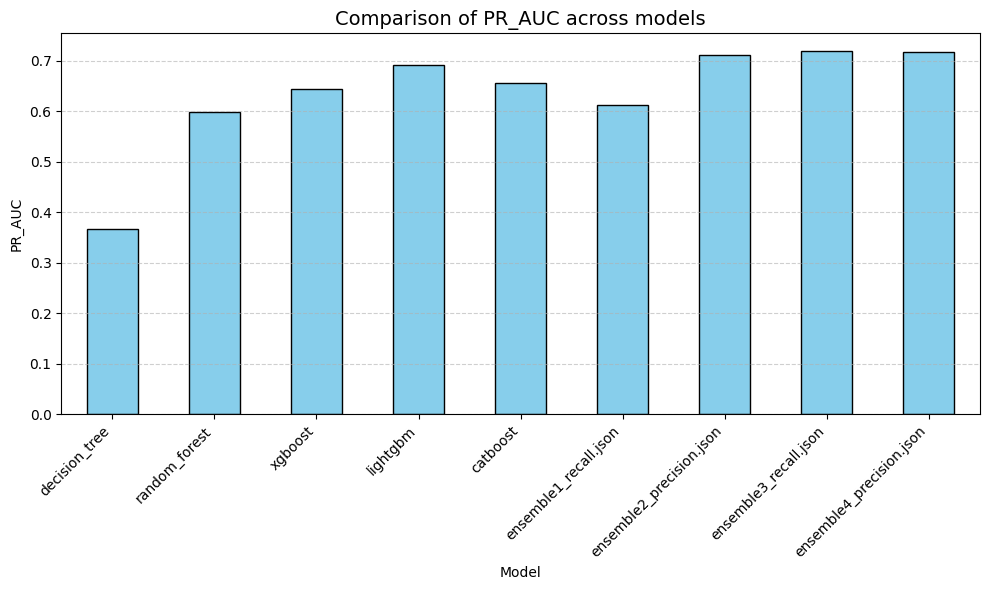

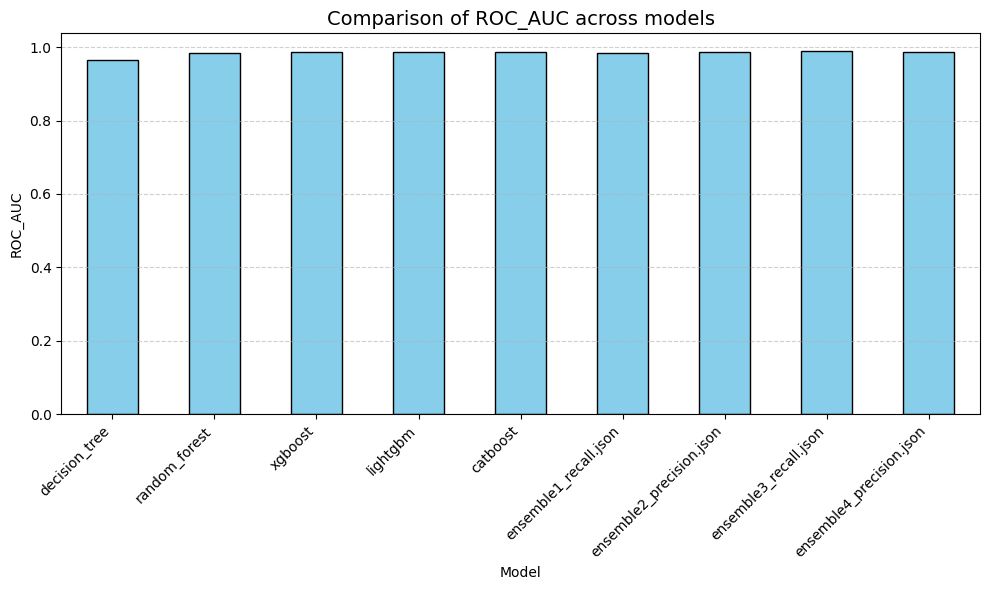

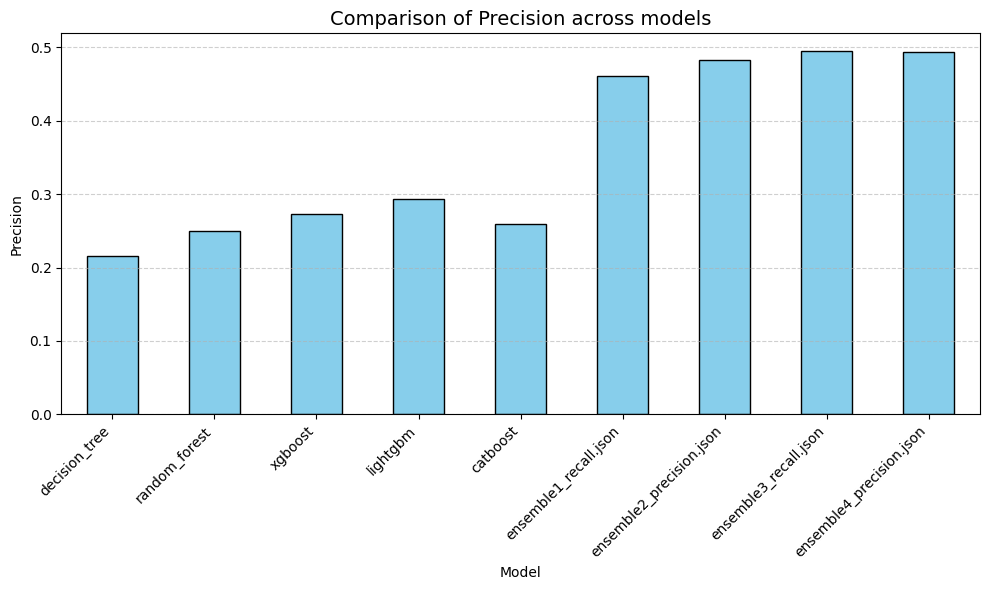

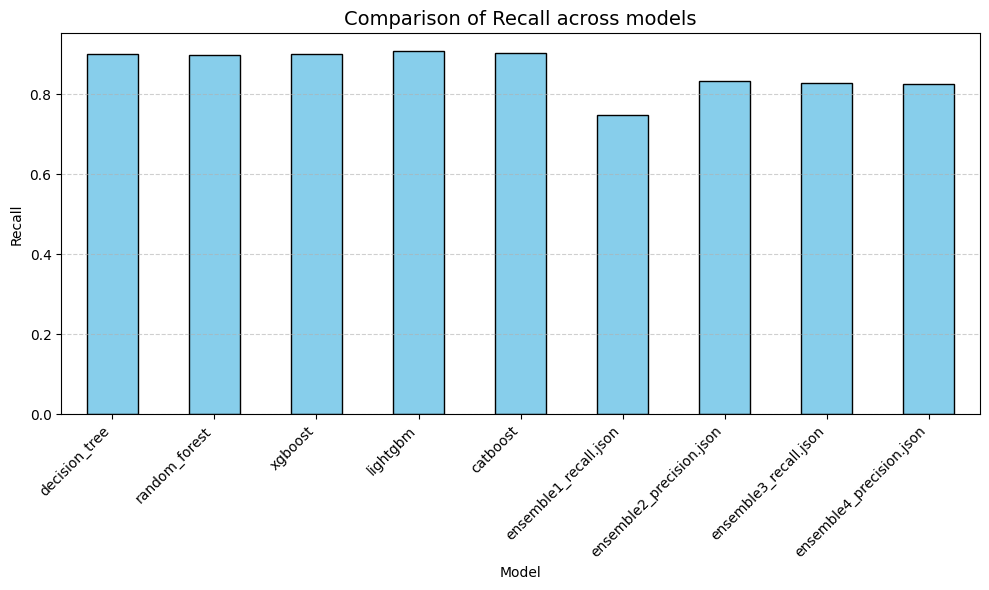

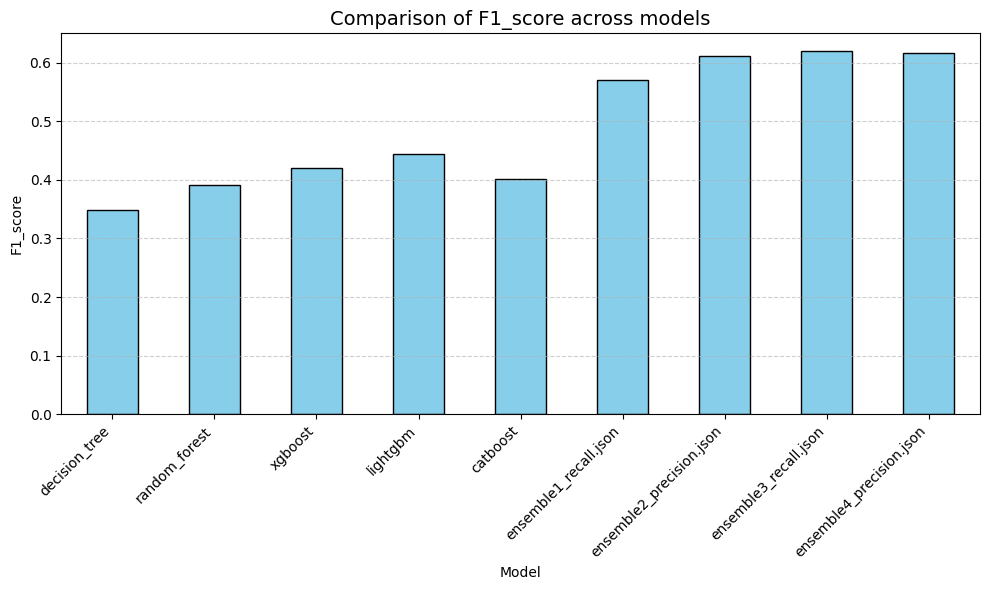

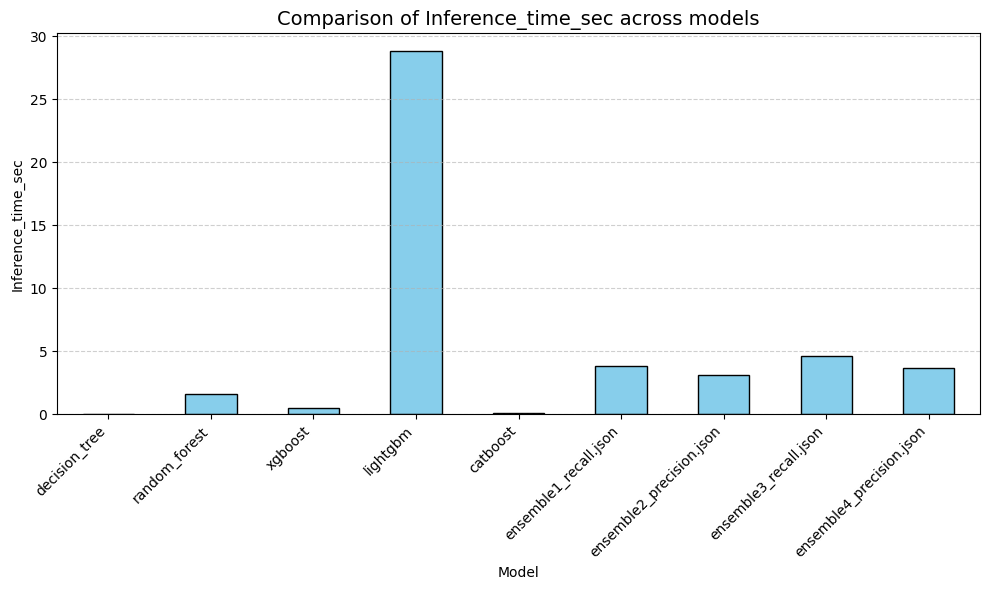

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c ch·ª©a c√°c file JSON
results_dir = '/content/drive/MyDrive/Graduation5/results'

# Danh s√°ch c√°c file JSON b·∫°n mu·ªën load
file_names = [
    'decision_tree_valid1.json',
    'random_forest_valid1.json',
    'xgboost_valid1.json',
    'lightgbm_valid1.json',
    'catboost_valid1.json',
    'ensemble1_valid1_recall.json',
    'ensemble2_valid1_precision.json',
    'ensemble3_valid1_recall.json',
    'ensemble4_valid1_precision.json'
]

# Load d·ªØ li·ªáu t·ª´ t·∫•t c·∫£ c√°c file JSON
data = {}
for file_name in file_names:
    model_name = file_name.replace('_valid1.json', '').replace('_valid1', '')  # g·ªçn t√™n
    with open(os.path.join(results_dir, file_name), 'r') as f:
        metrics = json.load(f)
        data[model_name] = metrics

# T·∫°o DataFrame t·ª´ dictionary
df = pd.DataFrame(data).T  # Transpose ƒë·ªÉ model l√† index

# V·∫Ω bi·ªÉu ƒë·ªì cho t·ª´ng lo·∫°i ch·ªâ s·ªë
metrics_to_plot = ['PR_AUC', 'ROC_AUC', 'Precision', 'Recall', 'F1_score', 'Inference_time_sec']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    df[metric].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Comparison of {metric} across models", fontsize=14)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


<ipython-input-17-e7d868dcd9c6>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=45, ha='right')
<ipython-input-17-e7d868dcd9c6>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=45, ha='right')
<ipython-input-17-e7d868dcd9c6>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=45, ha='right')
<ipython-input-17-e7d868dcd9c6>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=45, ha='right')
<ipython-input-17-e7d868dcd9c6>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

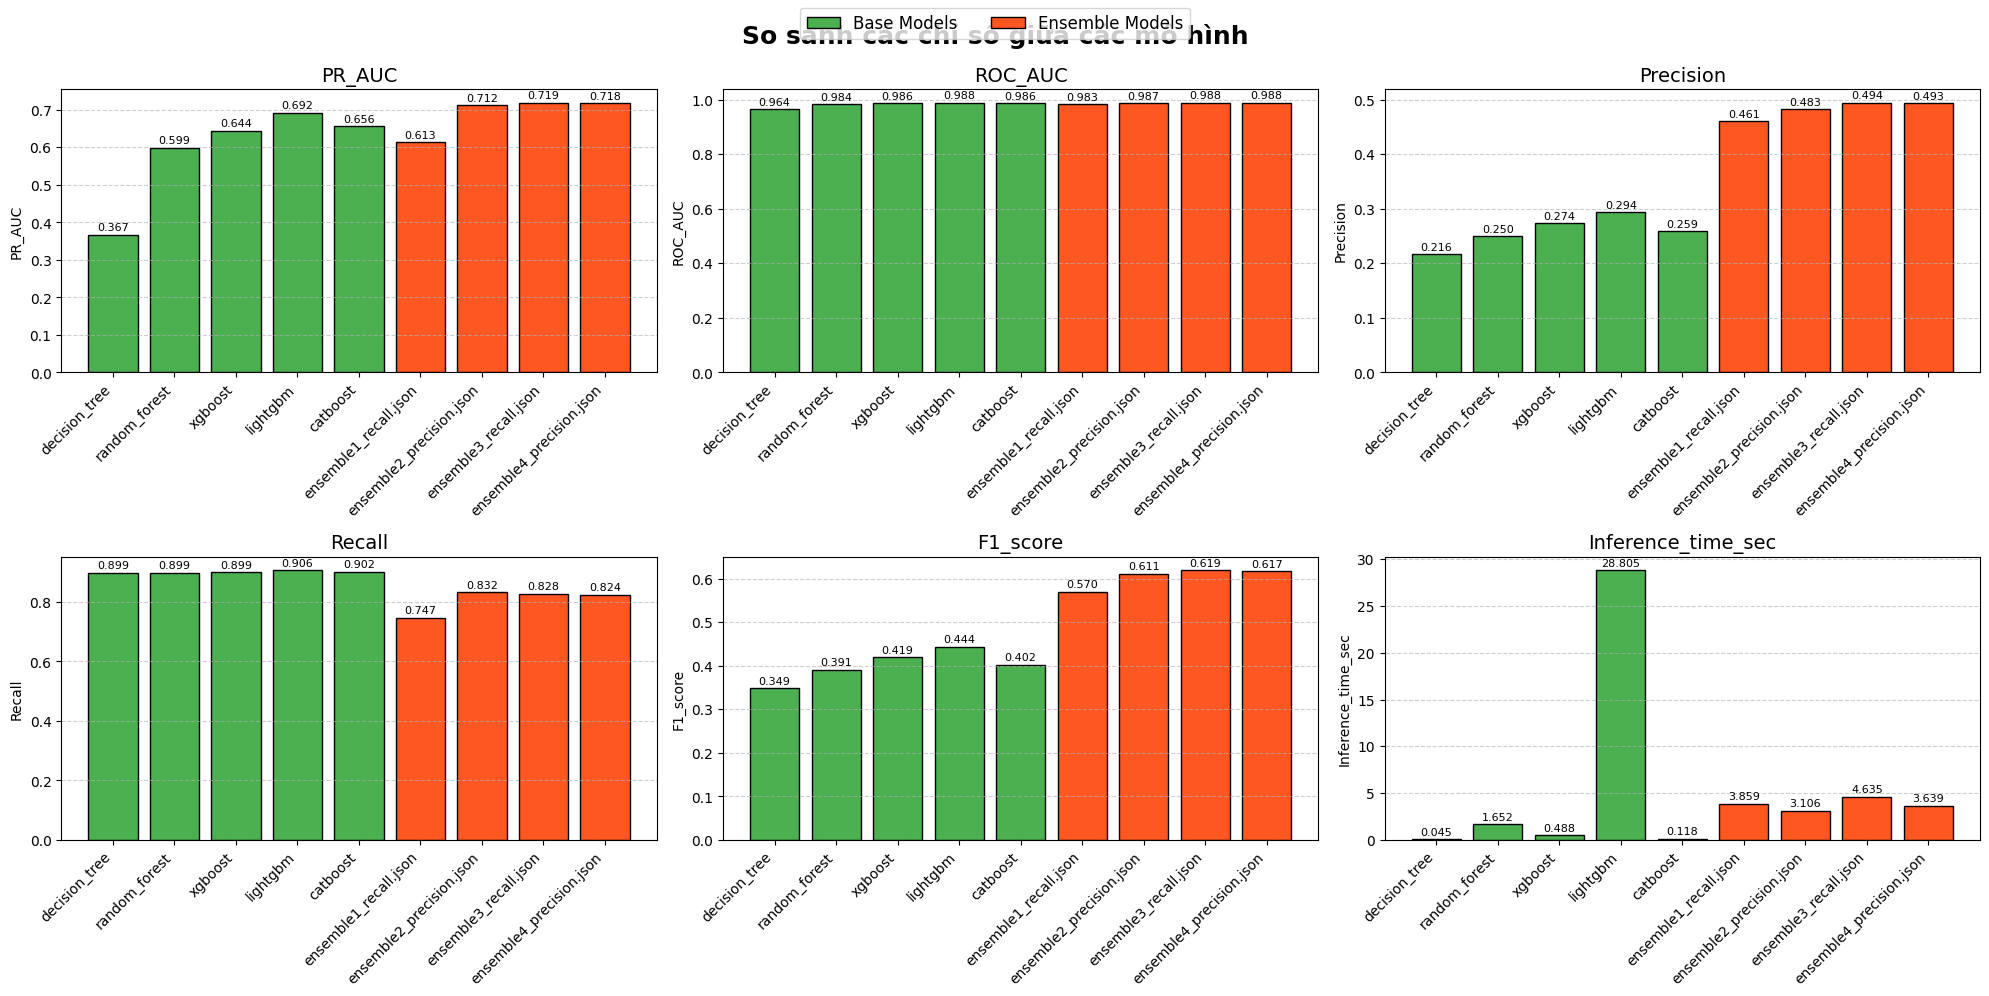

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c ch·ª©a c√°c file JSON
results_dir = '/content/drive/MyDrive/Graduation5/results'

# Danh s√°ch c√°c file JSON
file_names = [
    'decision_tree_valid1.json',
    'random_forest_valid1.json',
    'xgboost_valid1.json',
    'lightgbm_valid1.json',
    'catboost_valid1.json',
    'ensemble1_valid1_recall.json',
    'ensemble2_valid1_precision.json',
    'ensemble3_valid1_recall.json',
    'ensemble4_valid1_precision.json'
]

# Load d·ªØ li·ªáu t·ª´ c√°c file JSON
data = {}
for file_name in file_names:
    model_name = file_name.replace('_valid1.json', '').replace('_valid1', '')
    with open(os.path.join(results_dir, file_name), 'r') as f:
        metrics = json.load(f)
        data[model_name] = metrics

# T·∫°o DataFrame
df = pd.DataFrame(data).T

# X√°c ƒë·ªãnh lo·∫°i model ƒë·ªÉ t√¥ m√†u
base_models = ['decision_tree', 'random_forest', 'xgboost', 'lightgbm', 'catboost']
ensemble_models = [m for m in df.index if m not in base_models]

# M√†u s·∫Øc
base_color = '#4CAF50'       # Xanh l√°
ensemble_color = '#FF5722'   # Cam

colors = [base_color if model in base_models else ensemble_color for model in df.index]

# V·∫Ω bi·ªÉu ƒë·ªì grouped
metrics_to_plot = ['PR_AUC', 'ROC_AUC', 'Precision', 'Recall', 'F1_score', 'Inference_time_sec']

# Thi·∫øt l·∫≠p subplot grid
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    bars = ax.bar(df.index, df[metric], color=colors, edgecolor='black')
    ax.set_title(metric, fontsize=14)
    ax.set_ylabel(metric)
    ax.set_xticklabels(df.index, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Th√™m gi√° tr·ªã tr√™n ƒë·∫ßu c·ªôt
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=8)

# Ch√∫ th√≠ch m√†u
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=base_color, edgecolor='black', label='Base Models'),
    Patch(facecolor=ensemble_color, edgecolor='black', label='Ensemble Models')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("So s√°nh c√°c ch·ªâ s·ªë gi·ªØa c√°c m√¥ h√¨nh", fontsize=18, fontweight='bold')

# Hi·ªÉn th·ªã
plt.show()


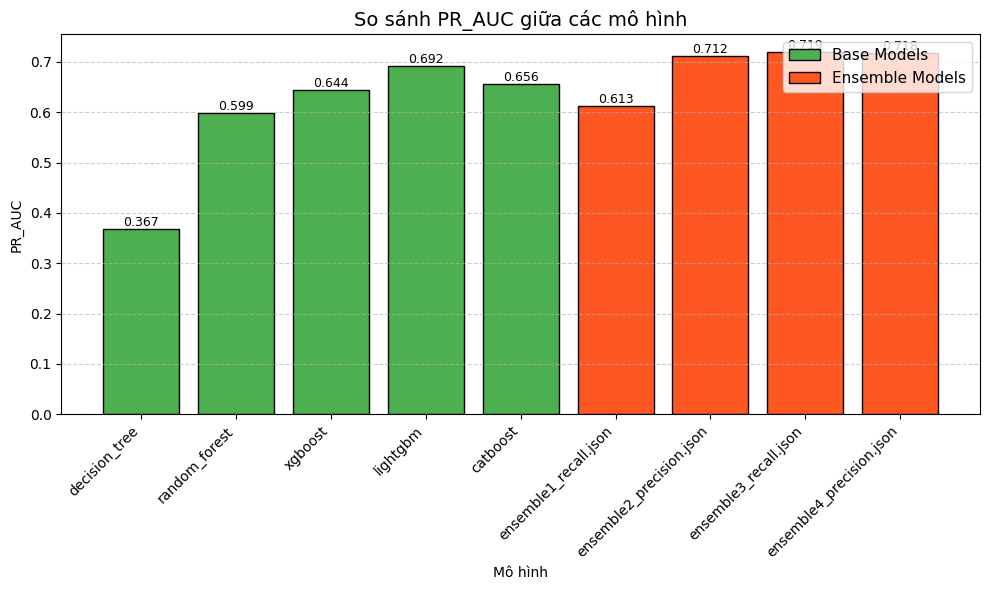

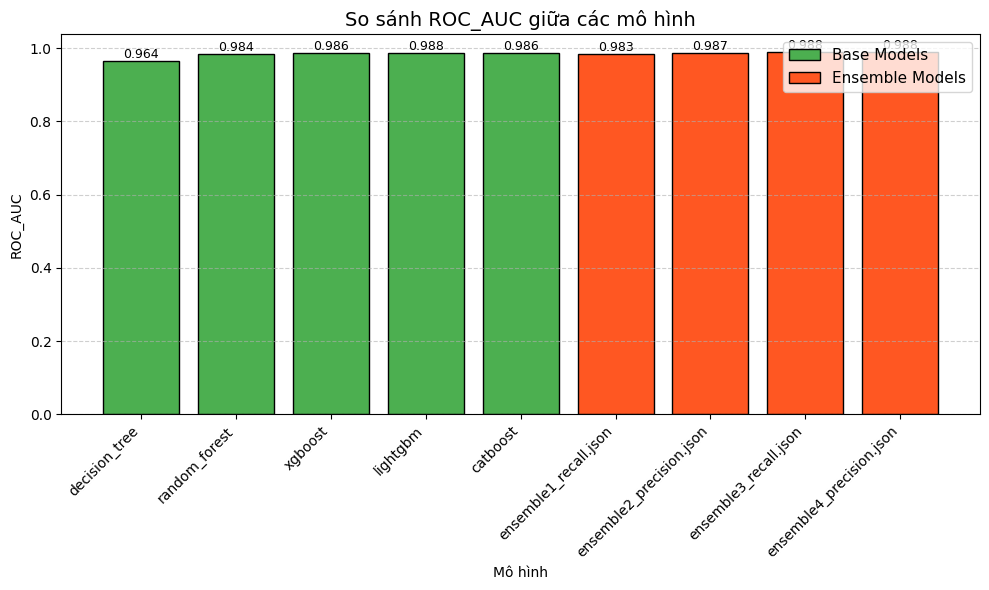

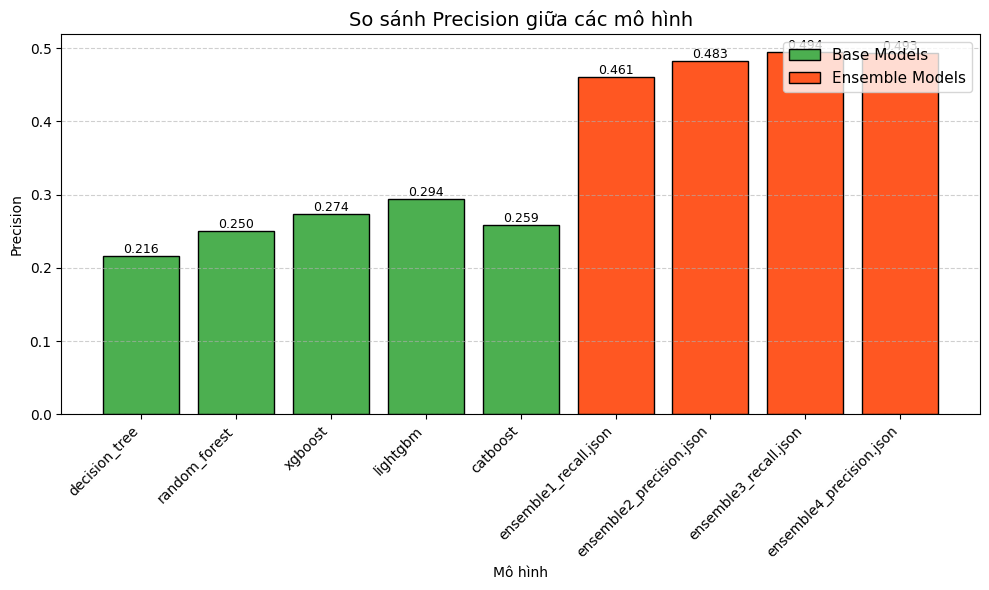

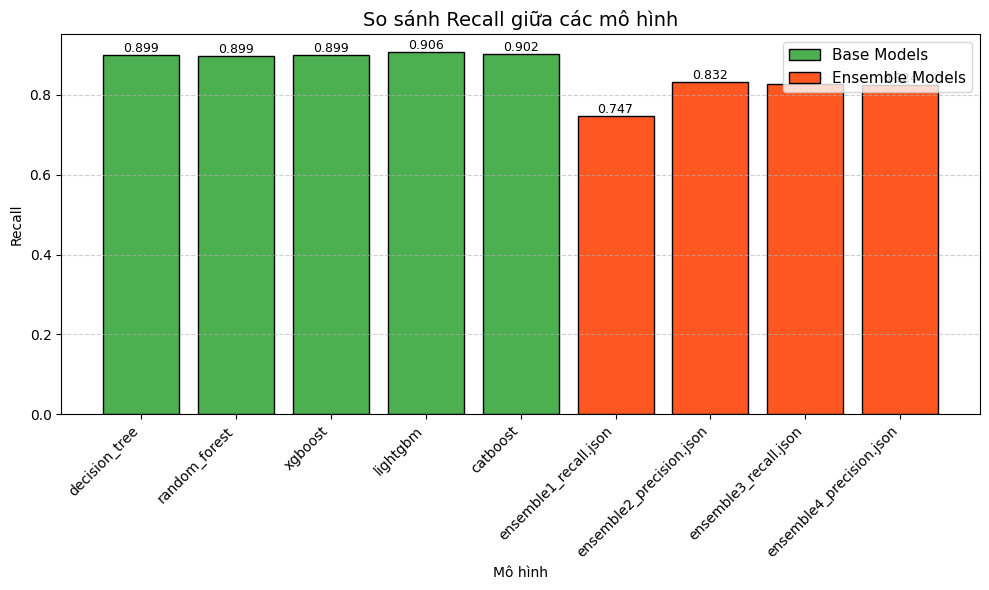

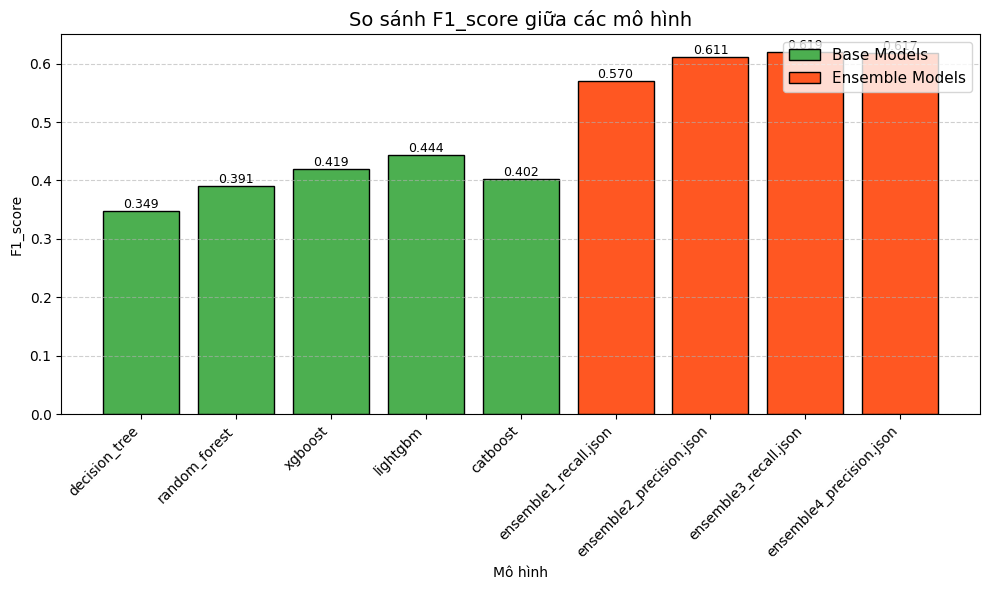

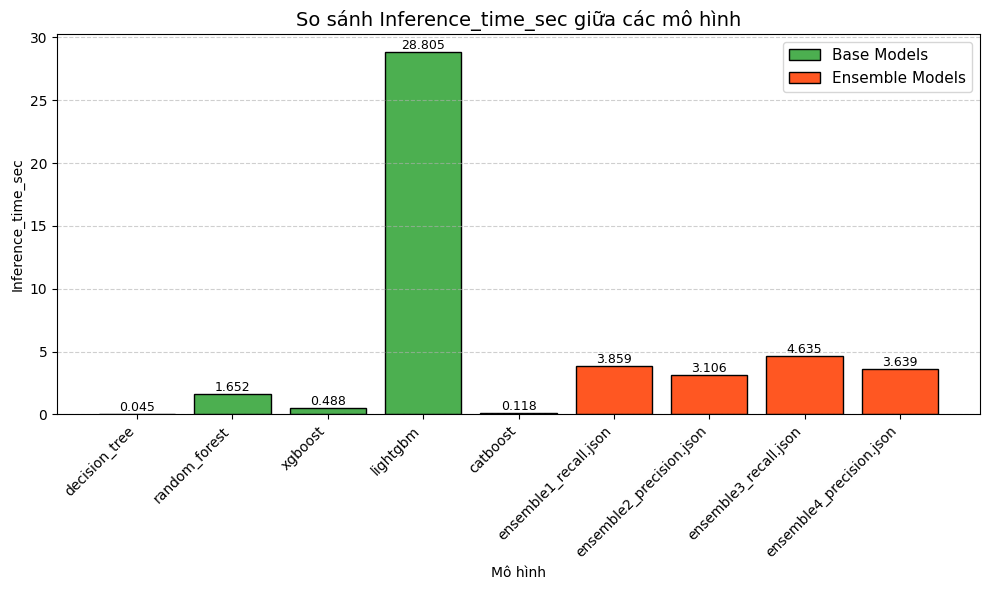

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c ch·ª©a c√°c file JSON
results_dir = '/content/drive/MyDrive/Graduation5/results'

# Danh s√°ch c√°c file JSON
file_names = [
    'decision_tree_valid1.json',
    'random_forest_valid1.json',
    'xgboost_valid1.json',
    'lightgbm_valid1.json',
    'catboost_valid1.json',
    'ensemble1_valid1_recall.json',
    'ensemble2_valid1_precision.json',
    'ensemble3_valid1_recall.json',
    'ensemble4_valid1_precision.json'
]

# Load d·ªØ li·ªáu t·ª´ c√°c file JSON
data = {}
for file_name in file_names:
    model_name = file_name.replace('_valid1.json', '').replace('_valid1', '')
    with open(os.path.join(results_dir, file_name), 'r') as f:
        metrics = json.load(f)
        data[model_name] = metrics

# T·∫°o DataFrame
df = pd.DataFrame(data).T

# X√°c ƒë·ªãnh lo·∫°i model ƒë·ªÉ ph√¢n m√†u
base_models = ['decision_tree', 'random_forest', 'xgboost', 'lightgbm', 'catboost']
ensemble_models = [m for m in df.index if m not in base_models]

# ƒê·ªãnh nghƒ©a m√†u s·∫Øc
base_color = '#4CAF50'       # Xanh l√°
ensemble_color = '#FF5722'   # Cam

# T·∫°o mapping m√†u cho t·ª´ng model
colors = [base_color if model in base_models else ensemble_color for model in df.index]

# V·∫Ω bi·ªÉu ƒë·ªì cho t·ª´ng ch·ªâ s·ªë
metrics_to_plot = ['PR_AUC', 'ROC_AUC', 'Precision', 'Recall', 'F1_score', 'Inference_time_sec']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df.index, df[metric], color=colors, edgecolor='black')

    plt.title(f"So s√°nh {metric} gi·ªØa c√°c m√¥ h√¨nh", fontsize=14)
    plt.ylabel(metric)
    plt.xlabel("M√¥ h√¨nh")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Th√™m gi√° tr·ªã tr√™n ƒë·∫ßu c·ªôt
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}',
                 ha='center', va='bottom', fontsize=9)

    # Th√™m legend
    legend_elements = [
        Patch(facecolor=base_color, edgecolor='black', label='Base Models'),
        Patch(facecolor=ensemble_color, edgecolor='black', label='Ensemble Models')
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=11)

    plt.tight_layout()
    plt.show()


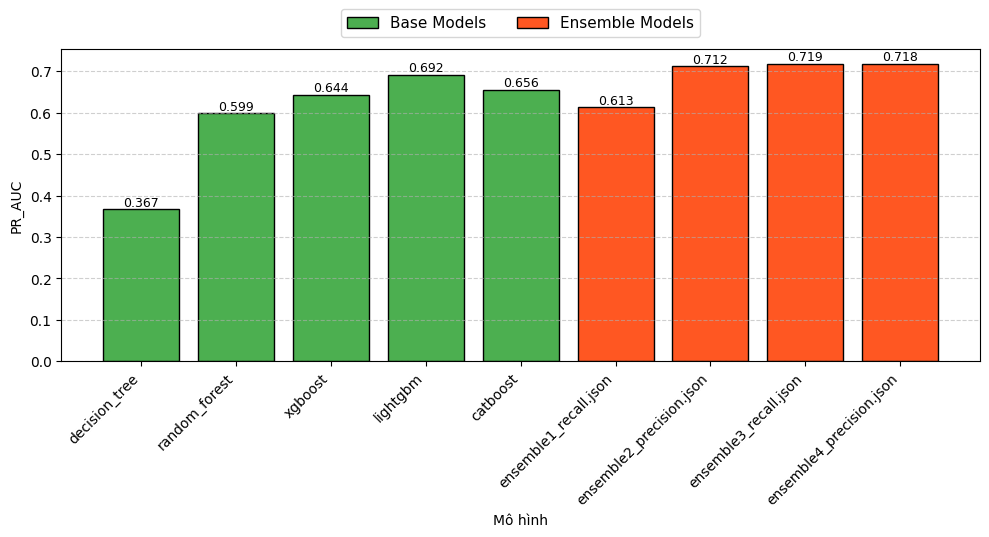

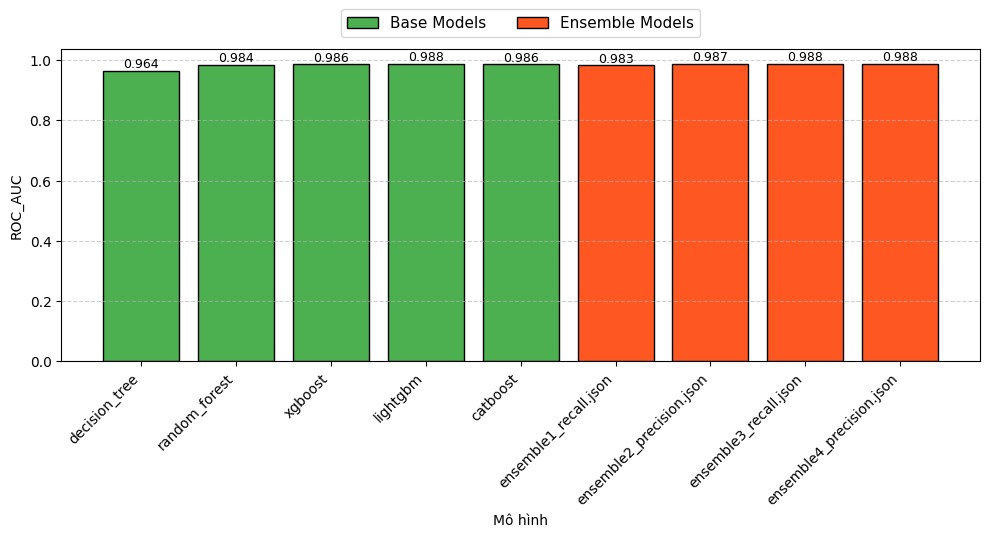

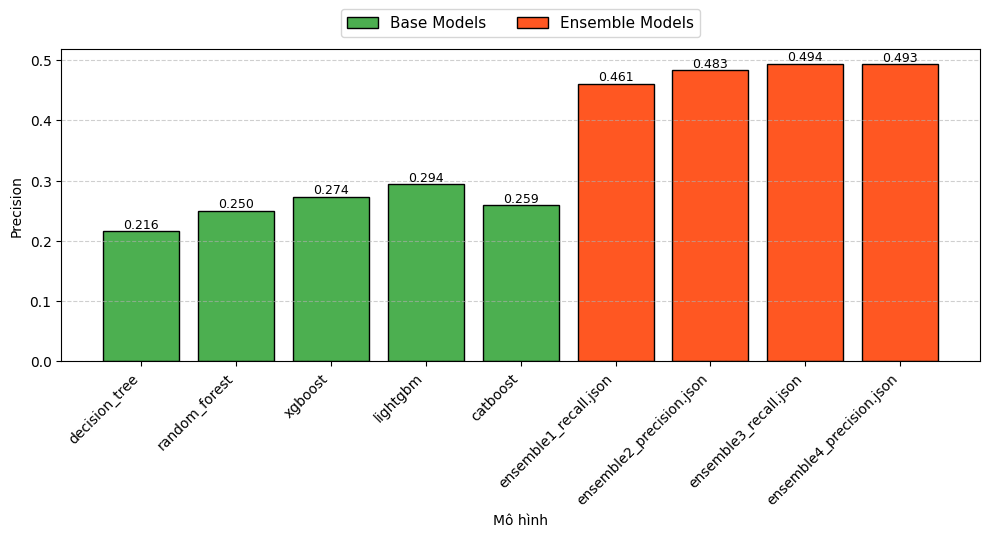

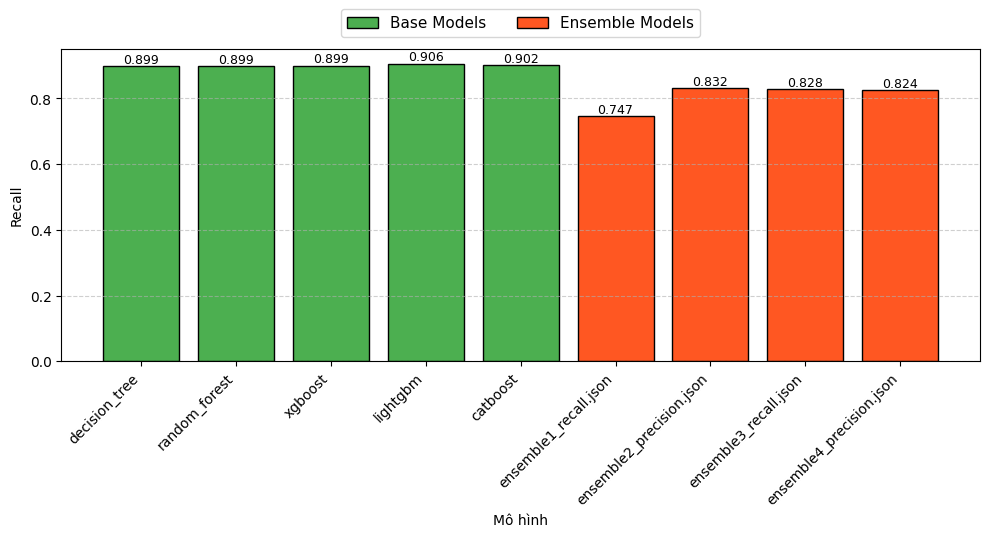

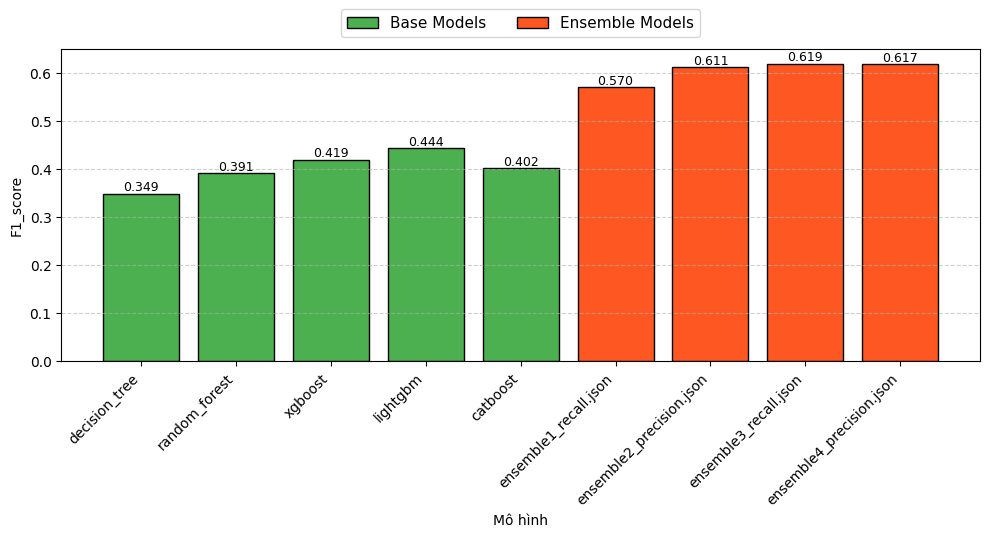

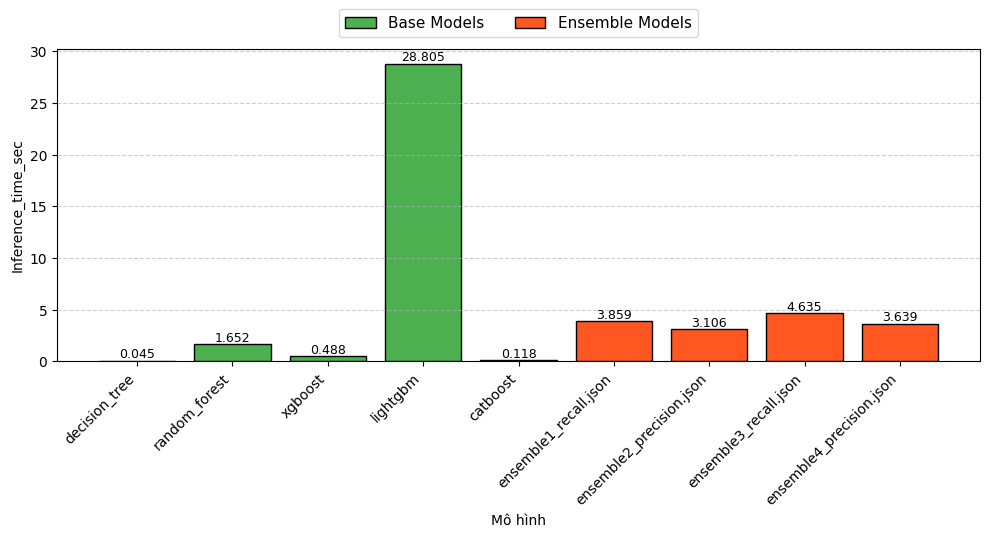

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c ch·ª©a c√°c file JSON
results_dir = '/content/drive/MyDrive/Graduation5/results'

# Danh s√°ch c√°c file JSON
file_names = [
    'decision_tree_valid1.json',
    'random_forest_valid1.json',
    'xgboost_valid1.json',
    'lightgbm_valid1.json',
    'catboost_valid1.json',
    'ensemble1_valid1_recall.json',
    'ensemble2_valid1_precision.json',
    'ensemble3_valid1_recall.json',
    'ensemble4_valid1_precision.json'
]

# Load d·ªØ li·ªáu t·ª´ c√°c file JSON
data = {}
for file_name in file_names:
    model_name = file_name.replace('_valid1.json', '').replace('_valid1', '')
    with open(os.path.join(results_dir, file_name), 'r') as f:
        metrics = json.load(f)
        data[model_name] = metrics

# T·∫°o DataFrame
df = pd.DataFrame(data).T

# X√°c ƒë·ªãnh lo·∫°i model ƒë·ªÉ ph√¢n m√†u
base_models = ['decision_tree', 'random_forest', 'xgboost', 'lightgbm', 'catboost']
ensemble_models = [m for m in df.index if m not in base_models]

# ƒê·ªãnh nghƒ©a m√†u s·∫Øc
base_color = '#4CAF50'       # Xanh l√°
ensemble_color = '#FF5722'   # Cam

# T·∫°o mapping m√†u cho t·ª´ng model
colors = [base_color if model in base_models else ensemble_color for model in df.index]

# V·∫Ω bi·ªÉu ƒë·ªì cho t·ª´ng ch·ªâ s·ªë
metrics_to_plot = ['PR_AUC', 'ROC_AUC', 'Precision', 'Recall', 'F1_score', 'Inference_time_sec']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df.index, df[metric], color=colors, edgecolor='black')

    # plt.title(f"So s√°nh {metric} gi·ªØa c√°c m√¥ h√¨nh", fontsize=14)
    plt.ylabel(metric)
    plt.xlabel("M√¥ h√¨nh")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Th√™m gi√° tr·ªã tr√™n ƒë·∫ßu c·ªôt
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}',
                 ha='center', va='bottom', fontsize=9)

    # Th√™m legend d√†n h√†ng ngang v√†o v·ªã tr√≠ c·ªßa title
    legend_elements = [
        Patch(facecolor=base_color, edgecolor='black', label='Base Models'),
        Patch(facecolor=ensemble_color, edgecolor='black', label='Ensemble Models')
    ]
    plt.legend(
        handles=legend_elements,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),   # ƒë·∫©y l√™n tr√™n m·ªôt ch√∫t
        fontsize=11,
        ncol=2                       # d√†n h√†ng ngang
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # ch·ª´a kho·∫£ng cho legend ph√≠a tr√™n
    plt.show()


In [ ]:
X_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_test1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_test1.csv')

In [ ]:
pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 20.4 MB/s eta 0:00:00


Best Threshold: 0.7987629668784247
Confusion Matrix:
 [[284171   3358]
 [   774   3367]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9973    0.9883    0.9928    287529
           1     0.5007    0.8131    0.6197      4141

    accuracy                         0.9858    291670
   macro avg     0.7490    0.9007    0.8063    291670
weighted avg     0.9902    0.9858    0.9875    291670



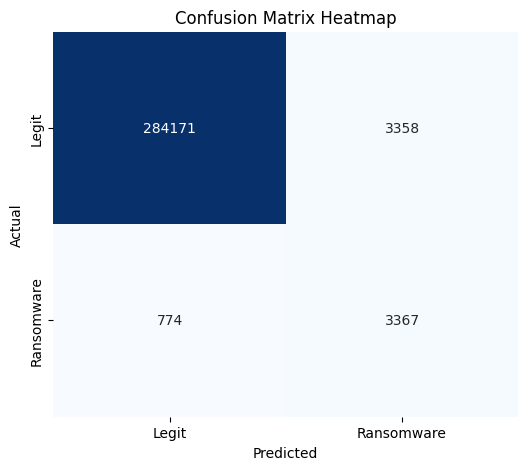

In [ ]:
import joblib
import json
import numpy as np
import pandas as pd
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'

# Load base models v√† scaler
base_learners_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp']
base_models = {}
for name in base_learners_names:
    base_models[name] = joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl")

scaler_mlp = joblib.load(f"{SAVE_DIR}/scaler_mlp.pkl")
mlp_features = ['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Load threshold
with open(f"{SAVE_DIR}/threshold_precision.json", 'r') as f:
    threshold_data = json.load(f)

best_threshold = threshold_data['best_threshold']
print(f"Best Threshold: {best_threshold}")

# T·∫°o meta features cho X_test1
meta_X_test1 = np.zeros((X_test1.shape[0], len(base_learners_names)))

for idx, name in enumerate(base_learners_names):
    model = base_models[name]

    if name == 'mlp':
        X_test1_scaled = scaler_mlp.transform(X_test1[mlp_features])
        meta_X_test1[:, idx] = model.predict_proba(X_test1_scaled)[:, 1]
    else:
        meta_X_test1[:, idx] = model.predict_proba(X_test1)[:, 1]

# D·ª± ƒëo√°n v·ªõi meta model
test1_pool = Pool(meta_X_test1)
y_proba = meta_model.predict_proba(test1_pool)[:, 1]

# √Åp ng∆∞·ª°ng threshold
y_pred = (y_proba >= best_threshold).astype(int)

# T√≠nh confusion matrix v√† classification report
cm = confusion_matrix(y_test1, y_pred)
report = classification_report(y_test1, y_pred, digits=4)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# V·∫Ω heatmap cho confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legit', 'Ransomware'], yticklabels=['Legit', 'Ransomware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


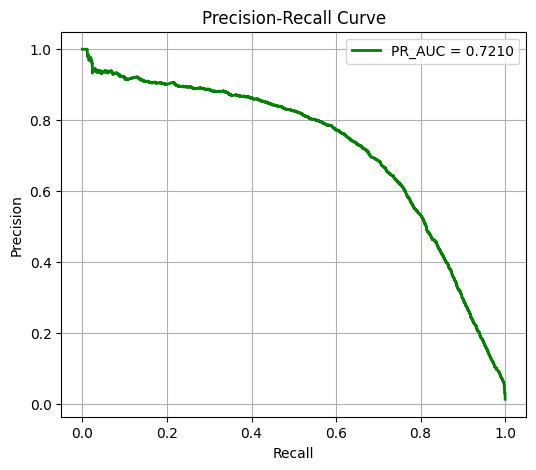

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test1, y_proba)
ap_score = average_precision_score(y_test1, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='green', lw=2, label=f'PR_AUC = {ap_score:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.grid()
plt.show()


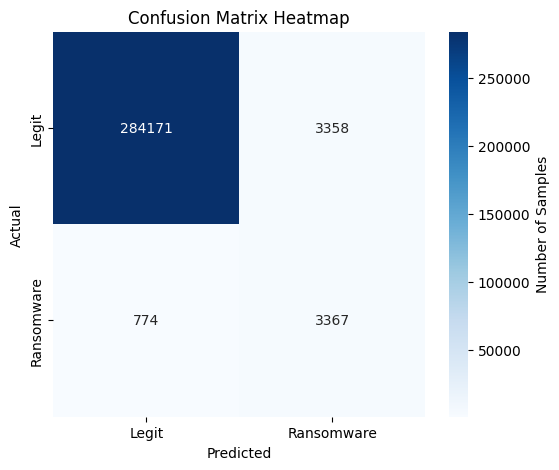

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,  # Hi·ªán color bar
    xticklabels=['Legit', 'Ransomware'],
    yticklabels=['Legit', 'Ransomware']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Th√™m colorbar label
colorbar = plt.gca().collections[0].colorbar
colorbar.set_label('Number of Samples')

plt.show()


In [ ]:
X_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/X_valid1.csv')
y_valid1 = pd.read_csv('/content/drive/MyDrive/Graduation4/dataset/y_valid1.csv')

Best Threshold: 0.7987629668784247
Confusion Matrix:
 [[284020   3508]
 [   727   3415]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9974    0.9878    0.9926    287528
           1     0.4933    0.8245    0.6173      4142

    accuracy                         0.9855    291670
   macro avg     0.7454    0.9061    0.8049    291670
weighted avg     0.9903    0.9855    0.9873    291670



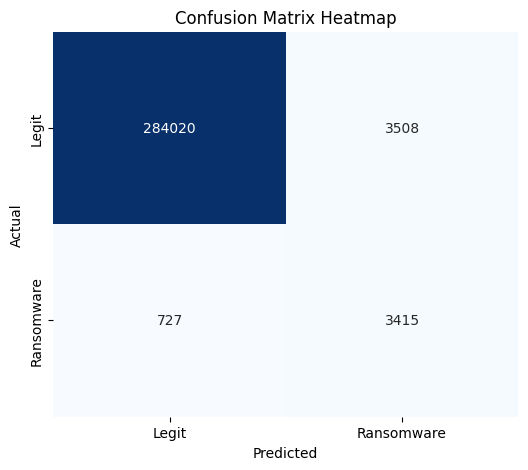

In [ ]:
import joblib
import json
import numpy as np
import pandas as pd
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

SAVE_DIR = '/content/drive/MyDrive/Graduation4/FullPipeline2'

# Load base models v√† scaler
base_learners_names = ['catboost', 'lgbm', 'rf', 'et', 'mlp']
base_models = {}
for name in base_learners_names:
    base_models[name] = joblib.load(f"{SAVE_DIR}/{name}_base_model.pkl")

scaler_mlp = joblib.load(f"{SAVE_DIR}/scaler_mlp.pkl")
mlp_features = ['weight', 'count', 'looped', 'neighbors', 'income', 'n_address', 'length']

# Load meta model
meta_model = CatBoostClassifier()
meta_model.load_model(f"{SAVE_DIR}/meta_model.cbm")

# Load threshold
with open(f"{SAVE_DIR}/threshold_precision.json", 'r') as f:
    threshold_data = json.load(f)

best_threshold = threshold_data['best_threshold']
print(f"Best Threshold: {best_threshold}")

# T·∫°o meta features cho X_test1 (n√™n d√πng X_valid1 ·ªü ƒë√¢y)
meta_X_valid1 = np.zeros((X_valid1.shape[0], len(base_learners_names)))

for idx, name in enumerate(base_learners_names):
    model = base_models[name]

    if name == 'mlp':
        X_valid1_scaled = scaler_mlp.transform(X_valid1[mlp_features])
        meta_X_valid1[:, idx] = model.predict_proba(X_valid1_scaled)[:, 1]
    else:
        meta_X_valid1[:, idx] = model.predict_proba(X_valid1)[:, 1]

# D·ª± ƒëo√°n v·ªõi meta model
valid1_pool = Pool(meta_X_valid1)
y_proba = meta_model.predict_proba(valid1_pool)[:, 1]

# √Åp ng∆∞·ª°ng threshold
y_pred = (y_proba >= best_threshold).astype(int)

# T√≠nh confusion matrix v√† classification report
cm = confusion_matrix(y_valid1, y_pred)
# FIX: Pass y_valid1 (true labels) instead of X_valid1 (features)
report = classification_report(y_valid1, y_pred, digits=4)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# V·∫Ω heatmap cho confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legit', 'Ransomware'], yticklabels=['Legit', 'Ransomware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()